<a href="https://colab.research.google.com/github/Vedha24/Gurgaon-Real-Estate/blob/main/G_286_250_268_310.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TASK-1 DATA PREPROCESSING**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder
from scipy.stats.mstats import winsorize
from scipy import stats
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
df = pd.read_csv("/content/mlp_ass.csv")

In [ ]:
df

property_type                              society      sector  price  \
0             flat              signature global park 4   sector 36   0.82   
1             flat                     smart world gems   sector 89   0.95   
2             flat                        pyramid elite   sector 86   0.46   
3             flat               breez global hill view  sohna road   0.32   
4             flat          bestech park view sanskruti   sector 92   1.60   
...            ...                                  ...         ...    ...   
3798          flat                       pivotal devaan   sector 84   0.37   
3799         house  international city by sobha phase 1  sector 109   6.00   
3800          flat           ansal api celebrity suites    sector 2   0.60   
3801         house                          independent   sector 43  15.50   
3802          flat                           m3m ikonic   sector 68   1.78   

      price_per_sqft     area  \
0             7585.0   1081.0   
1             8600.0   1105.0   
2               79.0  58228.0   
3             5470.0    585.0   
4             8020.0   1995.0   
...              ...      ...   
3798          6346.0    583.0   
3799          9634.0   6228.0   
3800          8163.0    735.0   
3801         28233.0   5490.0   
3802          9128.0   1950.0   

                                           areaWithType  bedRoom  bathroom  \
0     Super Built up area 1081(100.43 sq.m.)Carpet a...        3         2   
1                      Carpet area: 1103 (102.47 sq.m.)        2         2   
2                    Carpet area: 58141 (5401.48 sq.m.)        2         2   
3     Built Up area: 1000 (92.9 sq.m.)Carpet area: 5...        2         2   
4     Super Built up area 1995(185.34 sq.m.)Built Up...        3         4   
...                                                 ...      ...       ...   
3798  Super Built up area 583(54.16 sq.m.)Carpet are...        2         2   
3799                         Plot area 692(578.6 sq.m.)        5         5   
3800               Super Built up area 735(68.28 sq.m.)        1         1   
3801                        Plot area 610(510.04 sq.m.)        5         6   
3802  Super Built up area 1950(181.16 sq.m.)Built Up...        3         3   

     balcony  ...  super_built_up_area built_up_area carpet_area  study room  \
0          2  ...               1081.0           NaN       650.0           0   
1          2  ...                  NaN           NaN      1103.0           1   
2          1  ...                  NaN           NaN     58141.0           0   
3          1  ...                  NaN        1000.0       585.0           0   
4         3+  ...               1995.0        1615.0      1476.0           0   
...      ...  ...                  ...           ...         ...         ...   
3798       1  ...                583.0           NaN       483.0           0   
3799      3+  ...                  NaN        6228.0         NaN           1   
3800       1  ...                735.0           NaN         NaN           0   
3801       3  ...                  NaN        5490.0         NaN           1   
3802      3+  ...               1950.0        1845.0      1530.0           0   

      servant room  store room  pooja room  others  furnishing_type  \
0                0           0           0       0                0   
1                1           0           0       0                0   
2                0           0           0       0                0   
3                0           0           0       0                0   
4                1           0           0       1                1   
...            ...         ...         ...     ...              ...   
3798             0           0           0       0                0   
3799             1           1           1       0                0   
3800             0           0           0       0                1   
3801             1           1           1       0             

In [ ]:
df.columns

Index(['property_type', 'society', 'sector', 'price', 'price_per_sqft', 'area',
       'areaWithType', 'bedRoom', 'bathroom', 'balcony', 'floorNum', 'facing',
       'agePossession', 'super_built_up_area', 'built_up_area', 'carpet_area',
       'study room', 'servant room', 'store room', 'pooja room', 'others',
       'furnishing_type', 'luxury_score'],
      dtype='object')

In [ ]:
df.dtypes

property_type           object
society                 object
sector                  object
price                  float64
price_per_sqft         float64
area                   float64
areaWithType            object
bedRoom                  int64
bathroom                 int64
balcony                 object
floorNum               float64
facing                  object
agePossession           object
super_built_up_area    float64
built_up_area          float64
carpet_area            float64
study room               int64
servant room             int64
store room               int64
pooja room               int64
others                   int64
furnishing_type          int64
luxury_score             int64
dtype: object

**Observation:We identified duplicates and removed the duplicates**

In [ ]:
df.duplicated().sum()

126

In [ ]:
df.drop_duplicates()

property_type                              society      sector  price  \
0             flat              signature global park 4   sector 36   0.82   
1             flat                     smart world gems   sector 89   0.95   
2             flat                        pyramid elite   sector 86   0.46   
3             flat               breez global hill view  sohna road   0.32   
4             flat          bestech park view sanskruti   sector 92   1.60   
...            ...                                  ...         ...    ...   
3798          flat                       pivotal devaan   sector 84   0.37   
3799         house  international city by sobha phase 1  sector 109   6.00   
3800          flat           ansal api celebrity suites    sector 2   0.60   
3801         house                          independent   sector 43  15.50   
3802          flat                           m3m ikonic   sector 68   1.78   

      price_per_sqft     area  \
0             7585.0   1081.0   
1             8600.0   1105.0   
2               79.0  58228.0   
3             5470.0    585.0   
4             8020.0   1995.0   
...              ...      ...   
3798          6346.0    583.0   
3799          9634.0   6228.0   
3800          8163.0    735.0   
3801         28233.0   5490.0   
3802          9128.0   1950.0   

                                           areaWithType  bedRoom  bathroom  \
0     Super Built up area 1081(100.43 sq.m.)Carpet a...        3         2   
1                      Carpet area: 1103 (102.47 sq.m.)        2         2   
2                    Carpet area: 58141 (5401.48 sq.m.)        2         2   
3     Built Up area: 1000 (92.9 sq.m.)Carpet area: 5...        2         2   
4     Super Built up area 1995(185.34 sq.m.)Built Up...        3         4   
...                                                 ...      ...       ...   
3798  Super Built up area 583(54.16 sq.m.)Carpet are...        2         2   
3799                         Plot area 692(578.6 sq.m.)        5         5   
3800               Super Built up area 735(68.28 sq.m.)        1         1   
3801                        Plot area 610(510.04 sq.m.)        5         6   
3802  Super Built up area 1950(181.16 sq.m.)Built Up...        3         3   

     balcony  ...  super_built_up_area built_up_area carpet_area  study room  \
0          2  ...               1081.0           NaN       650.0           0   
1          2  ...                  NaN           NaN      1103.0           1   
2          1  ...                  NaN           NaN     58141.0           0   
3          1  ...                  NaN        1000.0       585.0           0   
4         3+  ...               1995.0        1615.0      1476.0           0   
...      ...  ...                  ...           ...         ...         ...   
3798       1  ...                583.0           NaN       483.0           0   
3799      3+  ...                  NaN        6228.0         NaN           1   
3800       1  ...                735.0           NaN         NaN           0   
3801       3  ...                  NaN        5490.0         NaN           1   
3802      3+  ...               1950.0        1845.0      1530.0           0   

      servant room  store room  pooja room  others  furnishing_type  \
0                0           0           0       0                0   
1                1           0           0       0                0   
2                0           0           0       0                0   
3                0           0           0       0                0   
4                1           0           0       1                1   
...            ...         ...         ...     ...              ...   
3798             0           0           0       0                0   
3799             1           1           1       0                0   
3800             0           0           0       0                1   
3801             1           1           1       0             

# **EXPLORATION OF DATA**

# **PROPERTY TYPE**

**Exploring property_type columns. It has two categories flats and houses**

In [ ]:
df['property_type'].head()

0    flat
1    flat
2    flat
3    flat
4    flat
Name: property_type, dtype: object

In [ ]:
df['property_type'].describe()

count     3803
unique       2
top       flat
freq      2943
Name: property_type, dtype: object

In [ ]:
df['property_type'].value_counts()

property_type
flat     2943
house     860
Name: count, dtype: int64

**We can observe that no of flats is greater than houses**

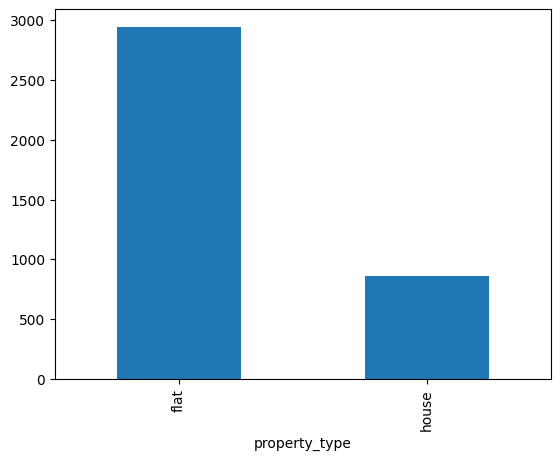

In [ ]:
df['property_type'].value_counts().plot(kind='bar')
plt.show()


**No missing values were present**

In [ ]:
df["property_type"].isna().sum()

0

# **SOCIETY**

In [ ]:
df['society'].head()

0        signature global park 4
1               smart world gems
2                  pyramid elite
3         breez global hill view
4    bestech park view sanskruti
Name: society, dtype: object

In [ ]:
df['society'].describe()

count            3802
unique            676
top       independent
freq              486
Name: society, dtype: object

In [ ]:
df['society'].value_counts()

society
independent                               486
tulip violet                               75
ss the leaf                                74
shapoorji pallonji joyville gurugram       45
dlf new town heights                       42
                                         ... 
samadhan shri kamal cghs                    1
private house                               1
elevate                                     1
dlf pink town house                         1
surendra homes dayaindependentd colony      1
Name: count, Length: 676, dtype: int64

**We used frequency binning to reduce the cardinality of society column. Here, the code defines the percentiles (50th, 75th, and 100th) and calculates the corresponding quantiles of the frequency counts. These quantiles are used as bin edges.bin no 2 has more societies compared to others**

                                  society  society_bin
0                 signature global park 4          2.0
1                        smart world gems          2.0
2                           pyramid elite          1.0
3                  breez global hill view          2.0
4             bestech park view sanskruti          2.0
...                                   ...          ...
3798                       pivotal devaan          2.0
3799  international city by sobha phase 1          2.0
3800           ansal api celebrity suites          1.0
3801                          independent          2.0
3802                           m3m ikonic          1.0

[3803 rows x 2 columns]


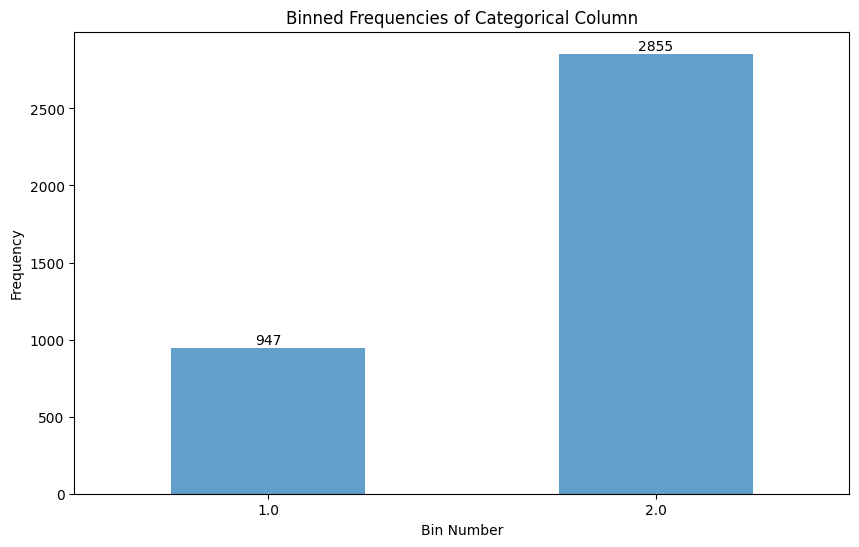

In [ ]:


# Calculating the frequency bins
category_counts_society = df['society'].value_counts()
percentiles = [50, 75, 100]
bin_edges = category_counts_society.quantile([p / 100 for p in percentiles])

def assign_bin(freq):
    for i, bin_edge in enumerate(bin_edges.iloc[1:], start=1):
        if freq <= bin_edge:
            return i
    return len(bin_edges)

category_to_bin_society = category_counts_society.apply(assign_bin)

df['society_bin'] = df['society'].map(category_to_bin_society)

print(df[['society', 'society_bin']])

# Plot the binned frequencies separately for each bin
category_counts_society = df['society_bin'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
category_counts_society.plot(kind='bar', alpha=0.7)

# Add text annotations for each bar
for i, freq in enumerate(category_counts_society):
    plt.text(i, freq, str(freq), ha='center', va='bottom')

# Add plot labels and legend
plt.title('Binned Frequencies of Categorical Column')
plt.xlabel('Bin Number')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

**top 10 societies**

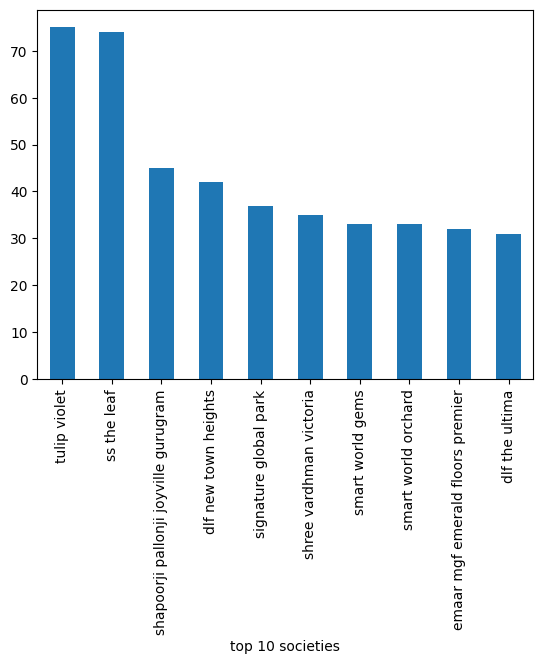

In [ ]:
#BARPLOT
df[df['society'] != 'independent']['society'].value_counts().head(10).plot(kind='bar')
plt.xlabel("top 10 societies")
plt.show()

In [ ]:
#missing values
df["society"].isna().sum()

1

# **SECTOR**

In [ ]:
df["sector"].head()

0     sector 36
1     sector 89
2     sector 86
3    sohna road
4     sector 92
Name: sector, dtype: object

In [ ]:
df["sector"].describe()

count           3803
unique           104
top       sohna road
freq             175
Name: sector, dtype: object

In [ ]:
df['sector'].value_counts()

sector
sohna road    175
sector 102    113
sector 85     110
sector 92     105
sector 69      94
             ... 
sector 30       5
sector 80       5
sector 73       3
sector 88       3
sector 27       3
Name: count, Length: 104, dtype: int64

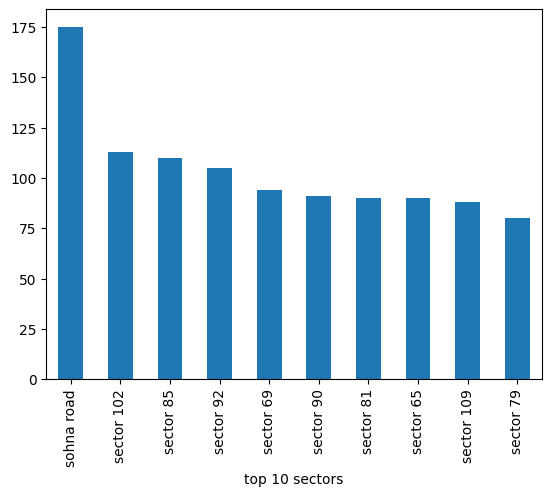

In [ ]:
#BARPLOT
df['sector'].value_counts().head(10).plot(kind='bar')
plt.xlabel("top 10 sectors")
plt.show()

**We used frequency binning for sector column as well to reduce the cardinality of the column. The no of sectors is the highest in the low category**

In [ ]:
# Frequency distribution for sectors
sector_counts = df['sector'].value_counts()

sector_frequency_bins = {

    "High (100-200)": ((sector_counts >= 100) & (sector_counts <= 200)).sum(),
    "Average (51-99)": ((sector_counts >= 51) & (sector_counts < 99)).sum(),
    "Low (1-50)": ((sector_counts >=1) & (sector_counts <= 50)).sum()
}

sector_frequency_bins
sector_to_bin = sector_counts.apply(assign_bin)

# Map categories to bin numbers in the DataFrame
df['sector_bin'] = df['sector'].map(sector_to_bin)

# Display the DataFrame with the new bin column
print(df[['sector', 'sector_bin']])

          sector  sector_bin
0      sector 36           2
1      sector 89           2
2      sector 86           2
3     sohna road           2
4      sector 92           2
...          ...         ...
3798   sector 84           2
3799  sector 109           2
3800    sector 2           2
3801   sector 43           2
3802   sector 68           2

[3803 rows x 2 columns]


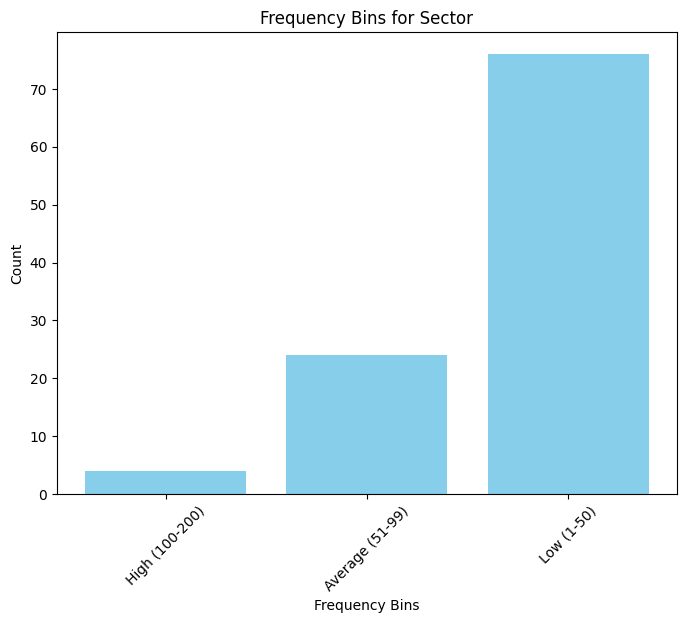

In [ ]:
# Plot the frequency bins
plt.figure(figsize=(8, 6))
plt.bar(sector_frequency_bins.keys(), sector_frequency_bins.values(), color='skyblue')
plt.xlabel('Frequency Bins')
plt.ylabel('Count')
plt.title('Frequency Bins for Sector')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


In [ ]:
#MISSING VALUES
df["sector"].isna().sum()

0

# **PRICE**

In [ ]:
df["price"].head()

0    0.82
1    0.95
2    0.46
3    0.32
4    1.60
Name: price, dtype: float64

In [ ]:
df["price"].isna().sum()

18

In [ ]:
df["price"].describe()

count    3785.000000
mean        2.505804
std         2.950121
min         0.070000
25%         0.940000
50%         1.500000
75%         2.700000
max        31.500000
Name: price, dtype: float64

In [ ]:
df["price"].value_counts()

price
1.25    83
0.90    68
1.50    66
1.20    66
1.10    66
        ..
2.07     1
6.09     1
4.79     1
5.46     1
0.57     1
Name: count, Length: 473, dtype: int64

**We did price binning to make price discrete data as price was continous data. So we put the discretized price data into categorical bins based on their frequency**

In [ ]:
category_counts = df['price'].value_counts()
print(category_counts)
# Calculate percentiles or quantiles to divide the categories into bins
percentiles = [0, 25, 50, 75, 100]  # You can adjust these percentiles as needed

# Determine the bin size based on percentiles
bin_edges = category_counts.quantile([p / 100 for p in percentiles])

# Assign categories to bins based on frequency
def assign_bin(freq):
    for i, bin_edge in enumerate(bin_edges.iloc[1:], start=1):
        if freq <= bin_edge:
            return i
    return len(bin_edges)

# Map categories to bin numbers
category_to_bin = category_counts.apply(assign_bin)

# Map categories to bin numbers in the DataFrame
df['category_bin'] = df['price'].map(category_to_bin)

# Display the DataFrame with the new bin column
print(df[['price', 'category_bin']])

price
1.25    83
0.90    68
1.50    66
1.20    66
1.10    66
        ..
2.07     1
6.09     1
4.79     1
5.46     1
0.57     1
Name: count, Length: 473, dtype: int64
      price  category_bin
0      0.82           4.0
1      0.95           4.0
2      0.46           3.0
3      0.32           4.0
4      1.60           4.0
...     ...           ...
3798   0.37           4.0
3799   6.00           4.0
3800   0.60           4.0
3801  15.50           2.0
3802   1.78           4.0

[3803 rows x 2 columns]


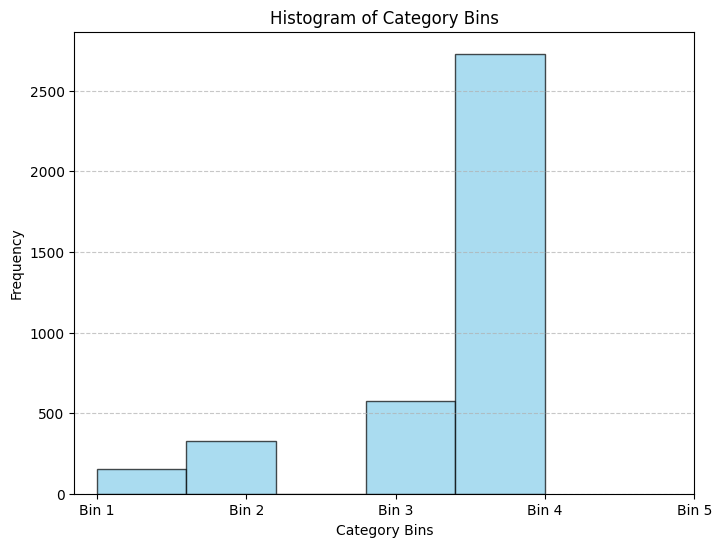

In [ ]:
# Plot the histogram of category bins
plt.figure(figsize=(8, 6))
plt.hist(df['category_bin'], bins=len(bin_edges), color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Category Bins')
plt.ylabel('Frequency')
plt.title('Histogram of Category Bins')
plt.xticks(range(1, len(bin_edges) + 1), [f'Bin {i}' for i in range(1, len(bin_edges) + 1)])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


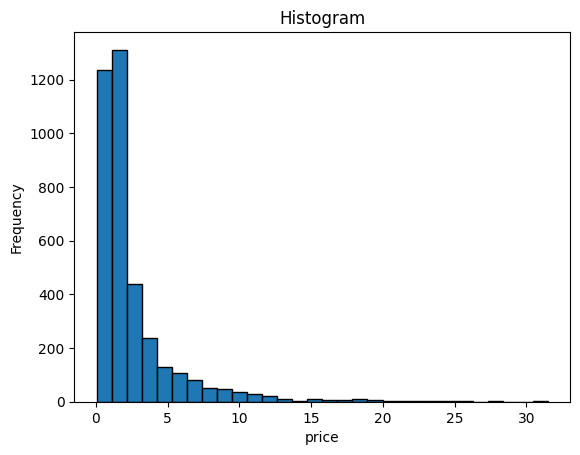

In [ ]:
#Histogram
plt.hist(df["price"], bins=30, edgecolor="black")
plt.title("Histogram")
plt.xlabel("price")
plt.ylabel('Frequency')
plt.show()

**In the box plot you can observe the outliers after about 5 on the price column. These will be handled later on**

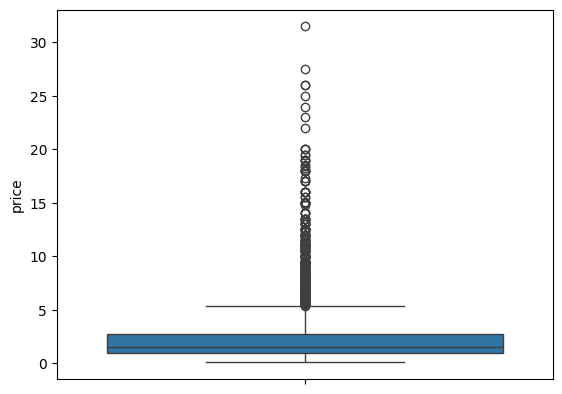

In [ ]:
#Boxplot
sns.boxplot(df['price'])
plt.show()

In [ ]:
# Skewness and kurtosis
skewness = df['price'].skew()
kurtosis = df['price'].kurt()
print(skewness, kurtosis)

3.3113346542178137 15.257818585808831


# **PRICE PER SQUARE FEET**

In [ ]:
df['price_per_sqft'].head()

0    7585.0
1    8600.0
2      79.0
3    5470.0
4    8020.0
Name: price_per_sqft, dtype: float64

In [ ]:
#missing values
df['price_per_sqft'].isna().sum()

18

In [ ]:
#descriptive analysis
df['price_per_sqft'].describe()

count      3785.000000
mean      13800.167768
std       23052.005585
min           4.000000
25%        6808.000000
50%        9000.000000
75%       13765.000000
max      600000.000000
Name: price_per_sqft, dtype: float64

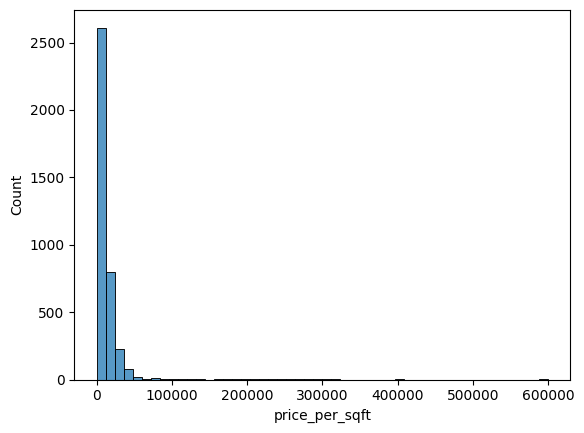

In [ ]:
#histogram
sns.histplot(df['price_per_sqft'], bins=50)
plt.show()

**In the box plot you can observe the outliers after about 50000 on the price per sqft column. These will be handled later on**

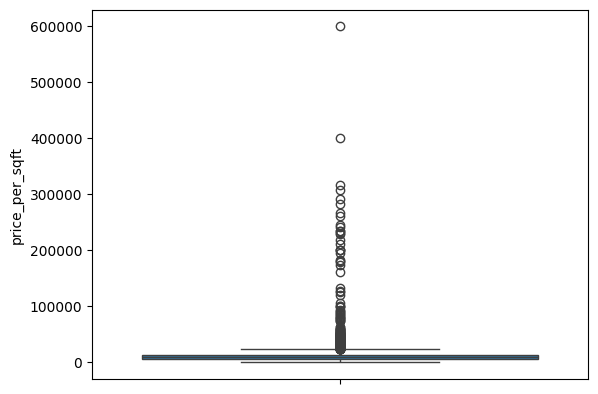

In [ ]:
# Box plot
sns.boxplot(df['price_per_sqft'])
plt.show()

In [ ]:
# Skewness and kurtosis
skewness = df['price_per_sqft'].skew()
kurtosis = df['price_per_sqft'].kurt()
print(skewness,kurtosis)

11.43921995907752 187.0418660346142


In [ ]:
df['price_per_sqft'].value_counts()

price_per_sqft
10000.0    28
8000.0     19
5000.0     17
12500.0    17
11111.0    14
           ..
9872.0      1
19285.0     1
17692.0     1
6786.0      1
28233.0     1
Name: count, Length: 2651, dtype: int64

# **AREA**

In [ ]:
df['area'].head()

0     1081.0
1     1105.0
2    58228.0
3      585.0
4     1995.0
Name: area, dtype: float64

**Area column has 18 missing values.**

In [ ]:
df['area'].isna().sum()

18

In [ ]:
df['area'].describe()

count      3785.000000
mean       2845.999472
std       22783.349053
min          50.000000
25%        1220.000000
50%        1725.000000
75%        2295.000000
max      875000.000000
Name: area, dtype: float64

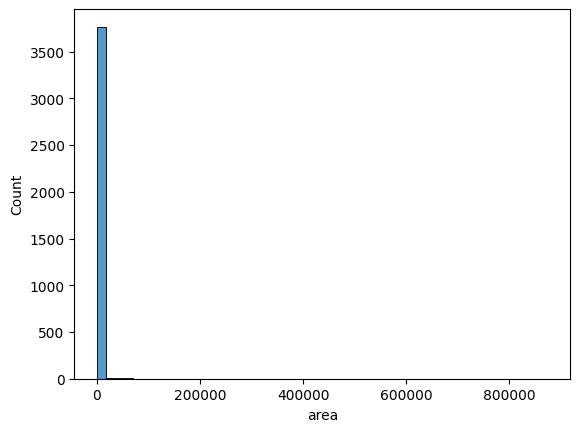

In [ ]:
#histogram
sns.histplot(df['area'], bins=50)
plt.show()

**In the box plot you can observe the outliers after about 50000 on the area column. These will be handled later on**

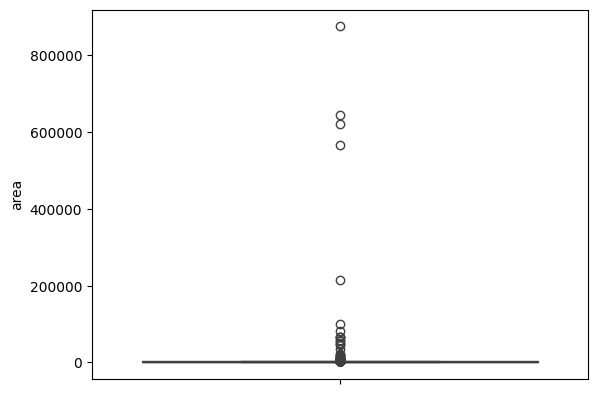

In [ ]:
# Box plot
sns.boxplot(df['area'])
plt.show()

In [ ]:
# Skewness and kurtosis
skewness = df['area'].skew()
kurtosis = df['area'].kurt()
print(skewness,kurtosis)

30.23273447193906 974.1918286408003


In [ ]:
df['area'].value_counts()

area
1650.0    55
1350.0    51
1800.0    48
1950.0    44
3240.0    43
          ..
1428.0     1
2043.0     1
2646.0     1
3556.0     1
5490.0     1
Name: count, Length: 1312, dtype: int64

# **AREA** **WITH TYPE**

**We dropped area with type as the information within this column is divided in other columns like builtup area and super builtup area,which we have explored below.**

In [ ]:
df.drop('areaWithType', axis=1, inplace=True)

In [ ]:
df.head()

property_type                      society      sector  price  \
0          flat      signature global park 4   sector 36   0.82   
1          flat             smart world gems   sector 89   0.95   
2          flat                pyramid elite   sector 86   0.46   
3          flat       breez global hill view  sohna road   0.32   
4          flat  bestech park view sanskruti   sector 92   1.60   

   price_per_sqft     area  bedRoom  bathroom balcony  floorNum  ...  \
0          7585.0   1081.0        3         2       2       2.0  ...   
1          8600.0   1105.0        2         2       2       4.0  ...   
2            79.0  58228.0        2         2       1       0.0  ...   
3          5470.0    585.0        2         2       1      17.0  ...   
4          8020.0   1995.0        3         4      3+      10.0  ...   

  study room servant room  store room  pooja room  others  furnishing_type  \
0          0            0           0           0       0                0   
1          1            1           0           0       0                0   
2          0            0           0           0       0                0   
3          0            0           0           0       0                0   
4          0            1           0           0       1                1   

   luxury_score  society_bin  sector_bin  category_bin  
0             8          2.0           2           4.0  
1            38          2.0           2           4.0  
2            15          1.0           2           3.0  
3            49          2.0           2           4.0  
4           174          2.0           2           4.0  

[5 rows x 25 columns]

# **BEDROOM**

In [ ]:
df['bedRoom'].head()

0    3
1    2
2    2
3    2
4    3
Name: bedRoom, dtype: int64

**No missing values in bedroom column**

In [ ]:
#missing values
df['bedRoom'].isna().sum()

0

In [ ]:
#descriptive analysis
df['bedRoom'].describe()

count    3803.000000
mean        3.338154
std         1.876734
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        21.000000
Name: bedRoom, dtype: float64

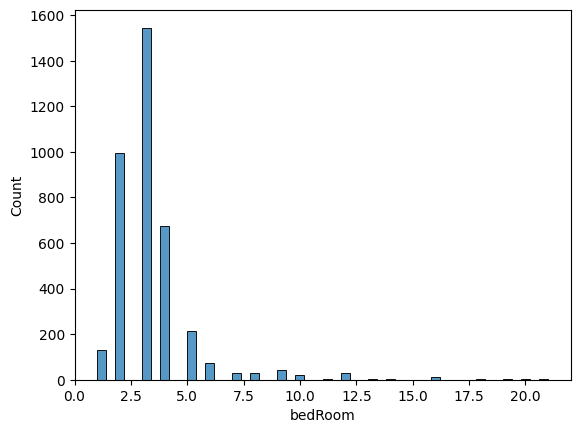

In [ ]:
#histogram
sns.histplot(df['bedRoom'], bins=50)
plt.show()

**In the box plot you can observe the outliers after about 7.5 on the bedroom column. These will be handled later on**

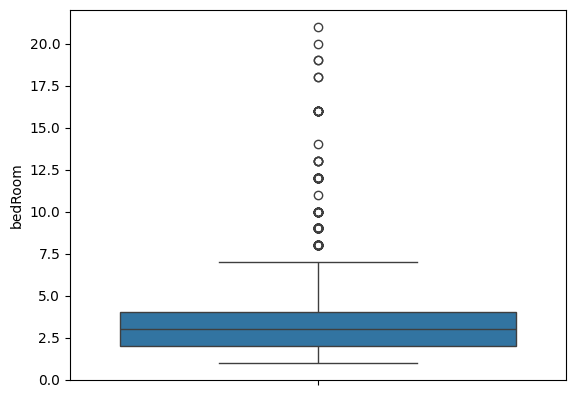

In [ ]:
# Box plot
sns.boxplot(df['bedRoom'])
plt.show()

In [ ]:
# Skewness and kurtosis
skewness = df['bedRoom'].skew()
kurtosis = df['bedRoom'].kurt()
print(skewness,kurtosis)

3.5115390021792146 18.61025394135828


In [ ]:
df['bedRoom'].value_counts()

bedRoom
3     1545
2      993
4      676
5      213
1      130
6       75
9       41
8       30
12      28
7       28
10      20
16      12
13       4
18       2
19       2
11       1
20       1
14       1
21       1
Name: count, dtype: int64

# **BALCONY**

In [ ]:
df['balcony'].head()

0     2
1     2
2     1
3     1
4    3+
Name: balcony, dtype: object

**No missing values were found**

In [ ]:
#missing values
df['balcony'].isna().sum()

0

In [ ]:
#descriptive analysis
df['balcony'].describe()

count     3803
unique       5
top         3+
freq      1202
Name: balcony, dtype: object

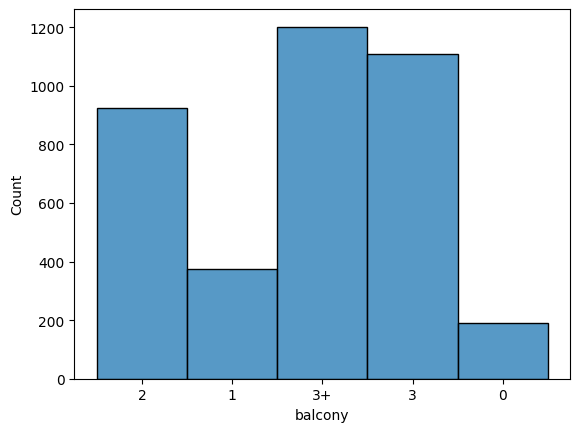

In [ ]:
#histogram
sns.histplot(df['balcony'], bins=50)
plt.show()

**No outliers were observed in the box plot.**

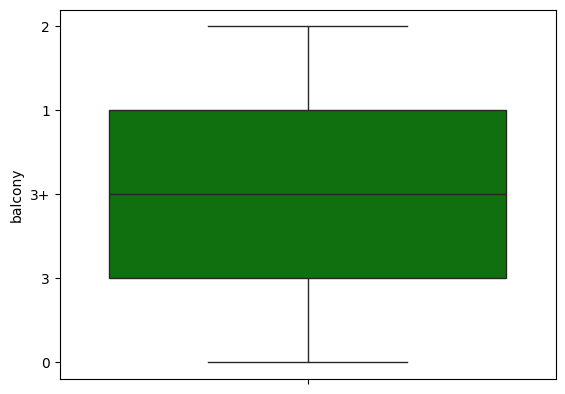

In [ ]:
# Box plot
sns.boxplot(df['balcony'], color="green")
plt.show()

In [ ]:
df['balcony'].value_counts()

balcony
3+    1202
3     1110
2      925
1      376
0      190
Name: count, dtype: int64

# balcony vs no.of flats graph

# **BATHROOM**

In [ ]:
df['bathroom'].head()

0    2
1    2
2    2
3    2
4    4
Name: bathroom, dtype: int64

**No missing values found.**

In [ ]:
#missing values
df['bathroom'].isna().sum()

0

In [ ]:
#descriptive analysis
df['bathroom'].describe()

count    3803.000000
mean        3.405469
std         1.930456
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        21.000000
Name: bathroom, dtype: float64

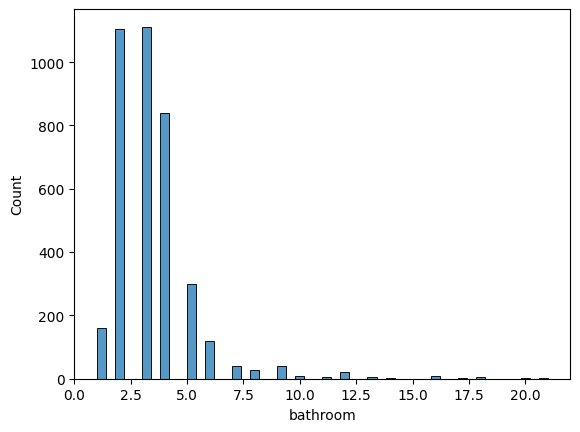

In [ ]:
#histogram
sns.histplot(df['bathroom'], bins=50)
plt.show()

**In the box plot you can observe the outliers after about 7.5 on the bathroom column. These will be handled later on**

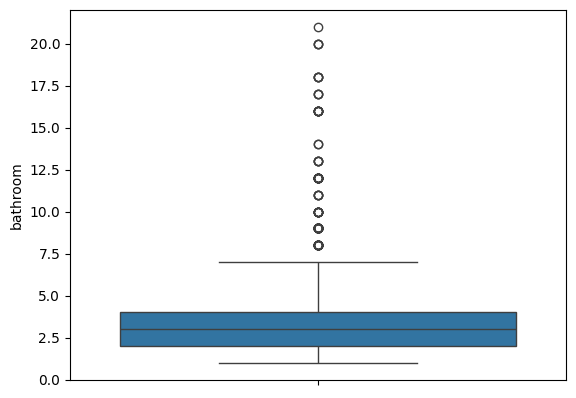

In [ ]:
# Box plot
sns.boxplot(df['bathroom'])
plt.show()

In [ ]:
# Skewness and kurtosis
skewness = df['bathroom'].skew()
kurtosis = df['bathroom'].kurt()
print(skewness,kurtosis)

3.257083204220492 17.745174835673772


In [ ]:
df['bathroom'].value_counts()

bathroom
3     1112
2     1105
4      839
5      299
1      160
6      120
7       41
9       41
8       26
12      22
10       9
16       8
11       4
18       4
13       4
17       3
20       3
14       2
21       1
Name: count, dtype: int64

# **FLOOR NUM**

In [ ]:
df['floorNum'].head()

0     2.0
1     4.0
2     0.0
3    17.0
4    10.0
Name: floorNum, dtype: float64

**There are 19 missing values in floor number**

In [ ]:
#missing values
df['floorNum'].isna().sum()

19

In [ ]:
#descriptive analysis
df['floorNum'].describe()

count    3784.000000
mean        6.810254
std         6.027555
min         0.000000
25%         2.000000
50%         5.000000
75%        10.000000
max        51.000000
Name: floorNum, dtype: float64

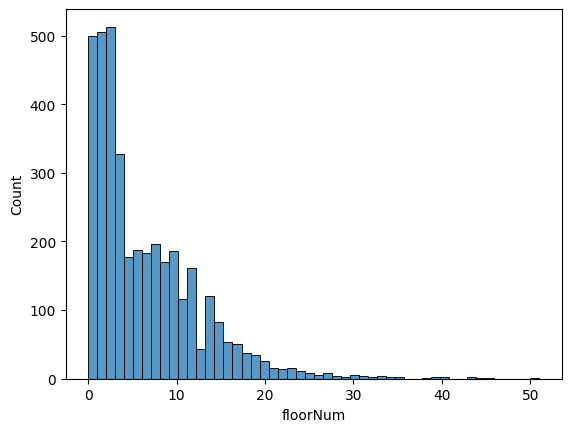

In [ ]:
#histogram
sns.histplot(df['floorNum'], bins=50)
plt.show()

**In the box plot you can observe the outliers after about 20 on the floor num column. These will be handled later on**

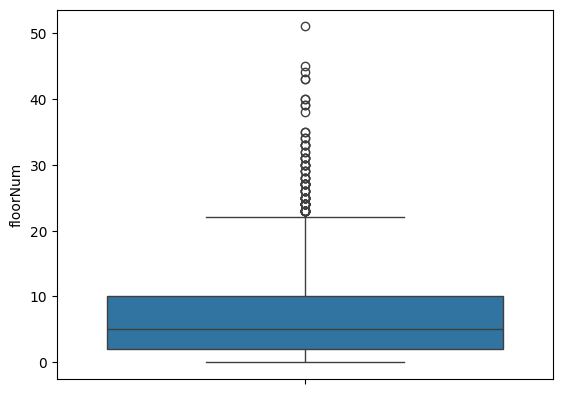

In [ ]:
# Box plot
sns.boxplot(df['floorNum'])
plt.show()

In [ ]:
# Skewness and kurtosis
skewness = df['floorNum'].skew()
kurtosis = df['floorNum'].kurt()
print(skewness,kurtosis)

1.6987333012368484 4.549322940576369


In [ ]:
df['floorNum'].value_counts()

floorNum
3.0     513
2.0     506
1.0     365
4.0     328
8.0     197
6.0     187
10.0    186
7.0     183
5.0     177
9.0     170
12.0    161
0.0     134
14.0    120
11.0    116
15.0     83
16.0     53
17.0     50
13.0     44
18.0     37
19.0     34
20.0     26
21.0     16
23.0     15
22.0     14
24.0     11
25.0      9
27.0      8
26.0      5
30.0      5
33.0      4
31.0      4
28.0      4
29.0      3
32.0      2
43.0      2
34.0      2
39.0      2
35.0      2
40.0      2
44.0      1
45.0      1
51.0      1
38.0      1
Name: count, dtype: int64

# **FACING**

In [ ]:
df['facing'].head()

0           NaN
1           NaN
2           NaN
3           NaN
4    North-West
Name: facing, dtype: object

In [ ]:
df['facing'].value_counts()

facing
East          642
North-East    639
North         398
West          255
South         233
North-West    200
South-East    174
South-West    157
Name: count, dtype: int64

**There are 1105 missing values.**

In [ ]:
#missing values
df['facing'].isna().sum()

1105

In [ ]:
#descriptive analysis
df['facing'].describe()

count     2698
unique       8
top       East
freq       642
Name: facing, dtype: object

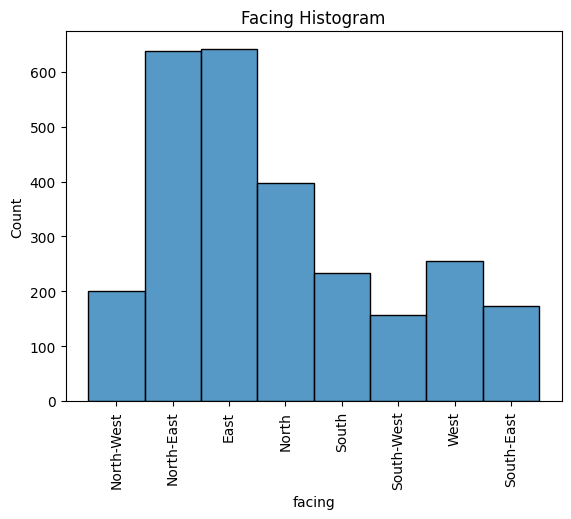

In [ ]:
#histogram
sns.histplot(df['facing'], bins=50)
plt.title("Facing Histogram")
plt.xticks(rotation=90)
plt.show()

**No outliers observed in the box plot**

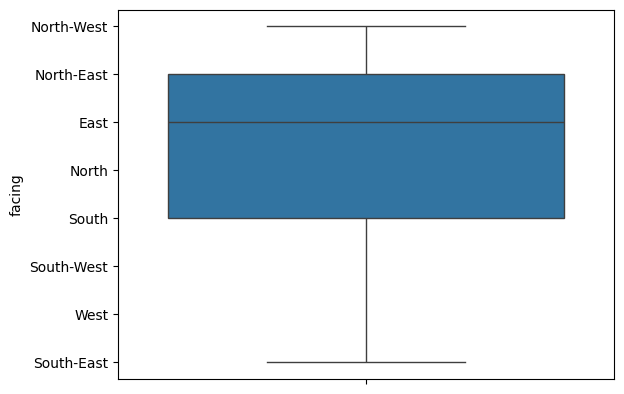

In [ ]:
# Box plot
sns.boxplot(df['facing'])
plt.show()

# **AGE** **POSSESION**

In [ ]:
df['agePossession'].head()

0          New Property
1          New Property
2    Under Construction
3          New Property
4        Relatively New
Name: agePossession, dtype: object

**No missing values in age possession column**

In [ ]:
#missing values
df['agePossession'].isna().sum()

0

In [ ]:
df['agePossession'].value_counts()

agePossession
Relatively New        1676
New Property           626
Moderately Old         575
Undefined              333
Old Property           310
Under Construction     283
Name: count, dtype: int64

<Axes: xlabel='agePossession'>

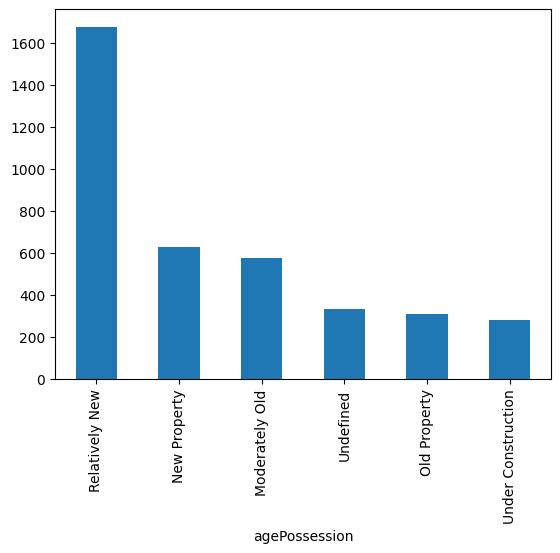

In [ ]:
df['agePossession'].value_counts().plot(kind="bar")

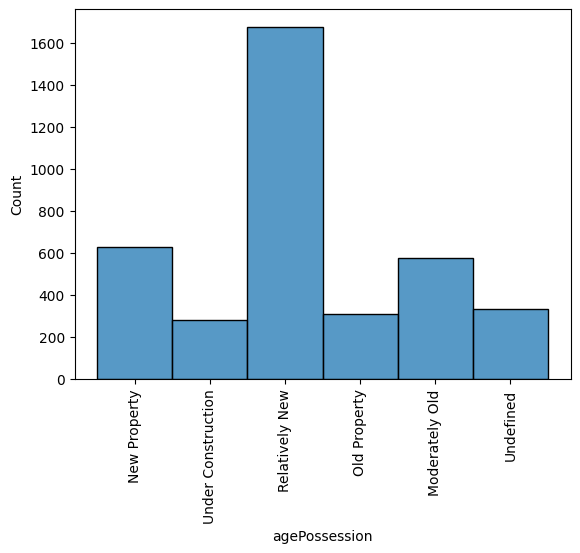

In [ ]:
#histogram
sns.histplot(df['agePossession'], bins=50)
plt.xticks(rotation=90)
plt.show()

**In the box plot you can observe the outliers at new property category and undefined category on the age possession column. These will be handled later on.**

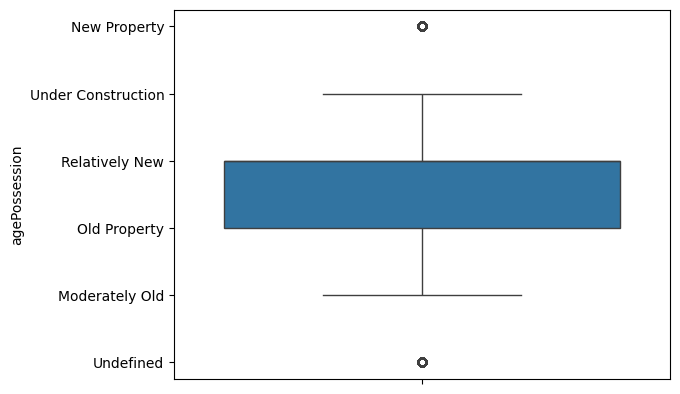

In [ ]:
# Box plot
sns.boxplot(df['agePossession'])
plt.show()

# **SUPER** **BUILT** **AREA**

In [ ]:
df['super_built_up_area'].head()

0    1081.0
1       NaN
2       NaN
3       NaN
4    1995.0
Name: super_built_up_area, dtype: float64

**1888 missing values observed in super built up area**

In [ ]:
# super built up area
df['super_built_up_area'].isna().sum()

1888

In [ ]:
df['super_built_up_area'].describe()

count     1915.000000
mean      1921.658251
std        767.160169
min         89.000000
25%       1457.000000
50%       1828.000000
75%       2215.000000
max      10000.000000
Name: super_built_up_area, dtype: float64

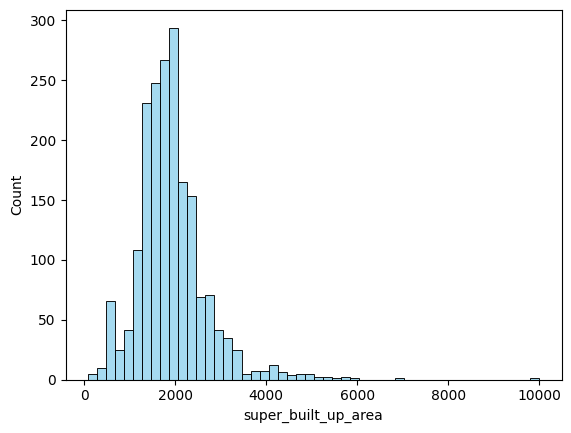

In [ ]:
#histogram
sns.histplot(df['super_built_up_area'].dropna(), bins=50, color='skyblue')
plt.show()

**In the box plot you can observe the outliers after about 3000 on the super built up area column. These will be handled later on**

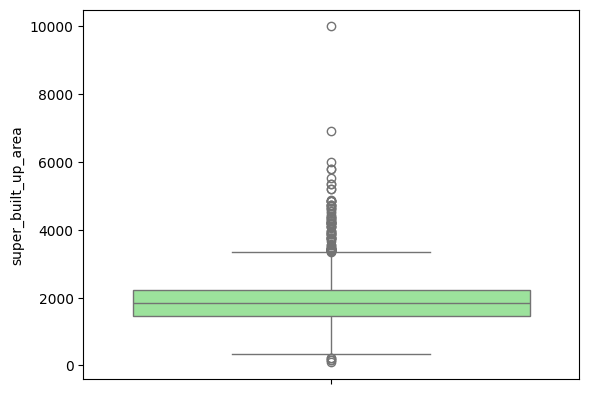

In [ ]:
#box plot
sns.boxplot(df['super_built_up_area'].dropna(), color='lightgreen')
plt.show()

In [ ]:
df['super_built_up_area'].value_counts()

super_built_up_area
1650.0    38
1950.0    38
2000.0    26
1578.0    25
2150.0    23
          ..
2072.0     1
1516.0     1
1454.0     1
3764.0     1
2965.0     1
Name: count, Length: 593, dtype: int64

In [ ]:
# Skewness and kurtosis
skewness = df['super_built_up_area'].skew()
kurtosis = df['super_built_up_area'].kurt()
print(skewness,kurtosis)

1.8232284983476958 10.083066100658106


# **BUILT UP AREA**

In [ ]:
df['built_up_area'].head()

0       NaN
1       NaN
2       NaN
3    1000.0
4    1615.0
Name: built_up_area, dtype: float64

**2070 missing values observed in built up area**

In [ ]:
#missing values
df['built_up_area'].isnull().sum()

2070

In [ ]:
df['built_up_area'].describe()

count      1733.000000
mean       2360.241413
std       17719.603378
min           2.000000
25%        1100.000000
50%        1650.000000
75%        2399.000000
max      737147.000000
Name: built_up_area, dtype: float64

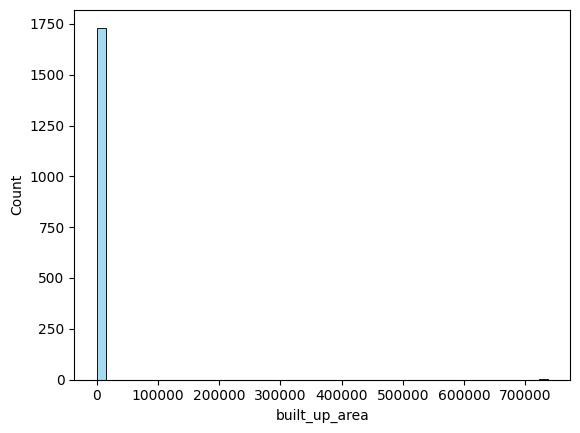

In [ ]:
#histogram
sns.histplot(df['built_up_area'].dropna(), bins=50, color='skyblue')
plt.show()

**In the box plot you can observe the outliers after about 700000 and very close to 0 on the built up area column. These will be handled later on**

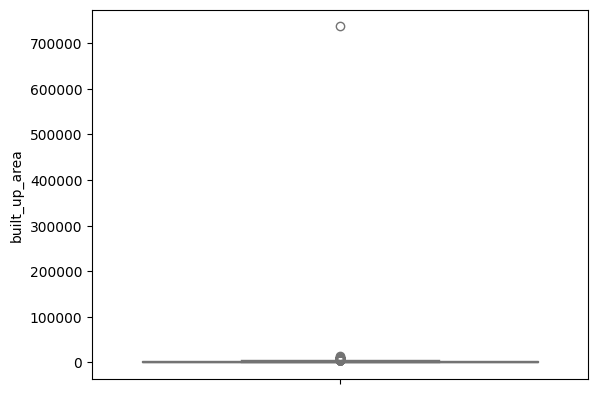

In [ ]:
#box plot
sns.boxplot(df['built_up_area'].dropna(), color='lightgreen')
plt.show()

In [ ]:
df['built_up_area'].value_counts()

built_up_area
1800.000000     41
3240.000000     37
1900.000000     34
1350.000000     34
2700.000000     33
                ..
3355.000000      1
1210.723472      1
410.000000       1
13500.000000     1
5490.000000      1
Name: count, Length: 644, dtype: int64

In [ ]:
# Skewness and kurtosis
skewness = df['built_up_area'].skew()
kurtosis = df['built_up_area'].kurt()
print(skewness,kurtosis)

41.217580082563 1710.107718578817


# **CARPET AREA**

In [ ]:
df['carpet_area'].head()

0      650.0
1     1103.0
2    58141.0
3      585.0
4     1476.0
Name: carpet_area, dtype: float64

**1859 missing values in carpet area**

In [ ]:
#missing value
df['carpet_area'].isnull().sum()

1859

In [ ]:
df['carpet_area'].describe()

count      1944.000000
mean       2483.466943
std       22375.239293
min          15.000000
25%         824.000000
50%        1294.000000
75%        1786.250000
max      607936.000000
Name: carpet_area, dtype: float64

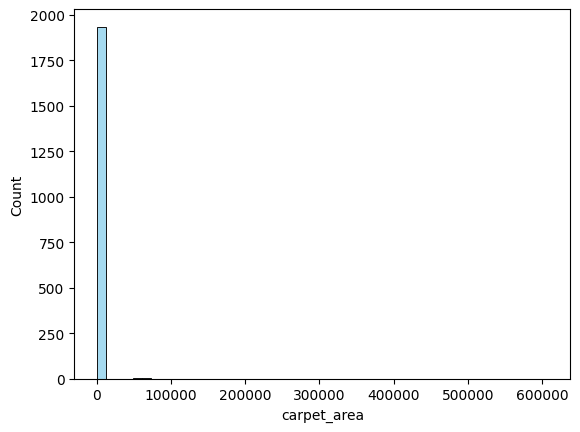

In [ ]:
#histogram
sns.histplot(df['carpet_area'].dropna(), bins=50, color='skyblue')
plt.show()

**In the box plot you can observe the outliers are a little scattered on the carpet area column. These will be handled later on**

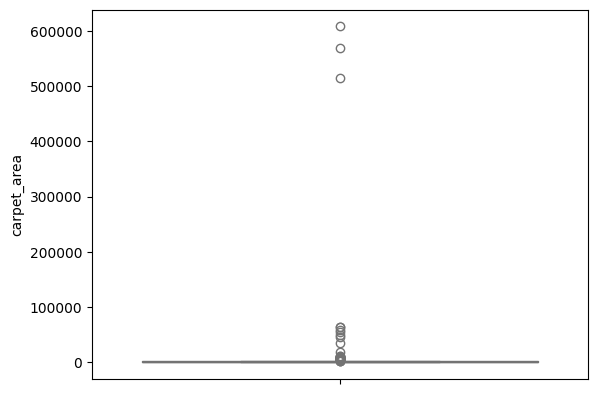

In [ ]:
#boxplot
sns.boxplot(df['carpet_area'].dropna(), color='lightgreen')
plt.show()

In [ ]:
df['carpet_area'].value_counts()

carpet_area
1400.0      42
1600.0      36
1800.0      36
1200.0      32
1500.0      30
            ..
2280.0       1
1459.0       1
2597.0       1
514396.0     1
1741.0       1
Name: count, Length: 733, dtype: int64

In [ ]:
# Skewness and kurtosis
skewness = df['carpet_area'].skew()
kurtosis = df['carpet_area'].kurt()
print(skewness,kurtosis)

24.796083599668627 627.8393572841238


# **ADDITIONAL ROOMS**

## **STUDY** **ROOM**

In [ ]:
df['study room'].head()

0    0
1    1
2    0
3    0
4    0
Name: study room, dtype: int64

**No missing values observed**

In [ ]:
df['study room'].isna().sum()

0

In [ ]:
df['study room'].describe()

count    3803.000000
mean        0.189587
std         0.392026
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: study room, dtype: float64

**In the pie chart we can observe that most of the properties do not have study rooms.**

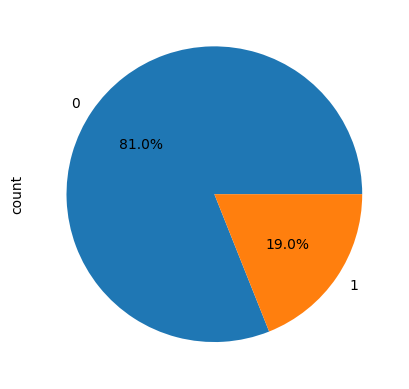

In [ ]:
df['study room'].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

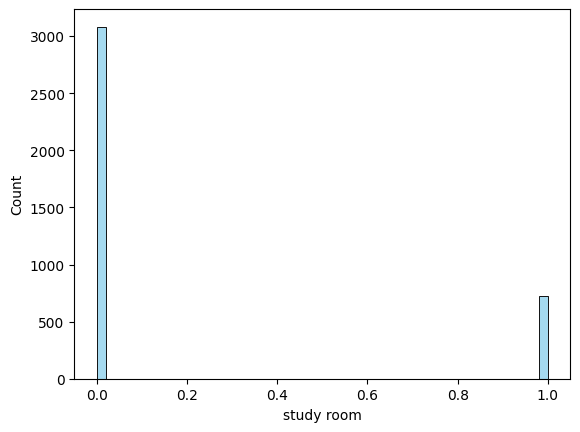

In [ ]:
#histogram
sns.histplot(df['study room'].dropna(), bins=50, color='skyblue')
plt.show()

**In the box plot you can observe the outliers at about 1.0 on the study room column. These will be handled later on**

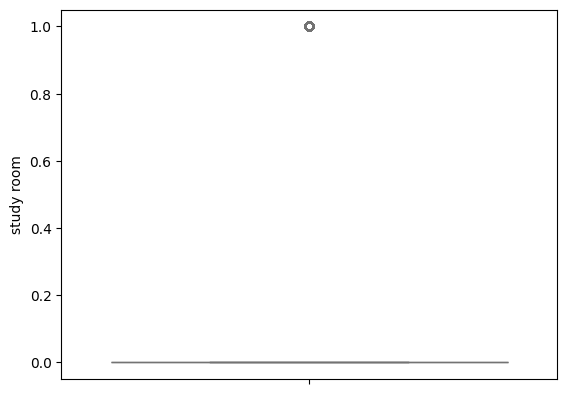

In [ ]:
#boxplot
sns.boxplot(df['study room'].dropna(), color='lightgreen')
plt.show()

## **SERVANT ROOM**

In [ ]:
df['servant room'].head()

0    0
1    1
2    0
3    0
4    1
Name: servant room, dtype: int64

**No missing values observed.**

In [ ]:
df['servant room'].isna().sum()

0

In [ ]:
df['servant room'].describe()

count    3803.000000
mean        0.356824
std         0.479125
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: servant room, dtype: float64

**In the pie chart we can observe that most of the properties do not have servant rooms.**

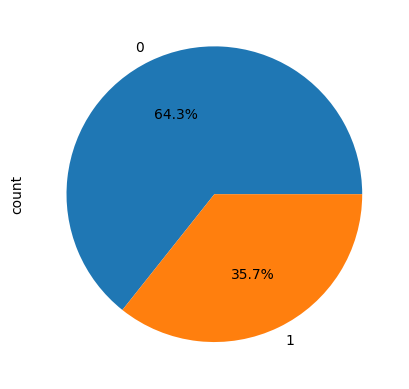

In [ ]:
df['servant room'].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

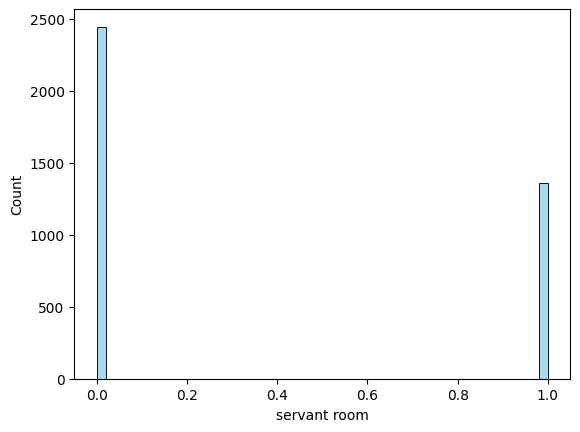

In [ ]:
#histogram
sns.histplot(df['servant room'].dropna(), bins=50, color='skyblue')
plt.show()

**No outliers are observed in the box plot.**

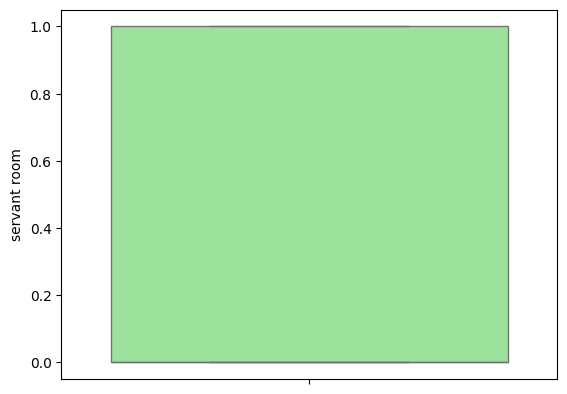

In [ ]:
#boxplot
sns.boxplot(df['servant room'].dropna(), color='lightgreen')
plt.show()

## **STORE ROOM**

In [ ]:
df['store room'].head()

0    0
1    0
2    0
3    0
4    0
Name: store room, dtype: int64

**No missing values observed**

In [ ]:
df['store room'].isna().sum()

0

In [ ]:
df['store room'].describe()

count    3803.000000
mean        0.090455
std         0.286870
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: store room, dtype: float64

**In the pie chart we can observe that most of the properties do not have store rooms.**

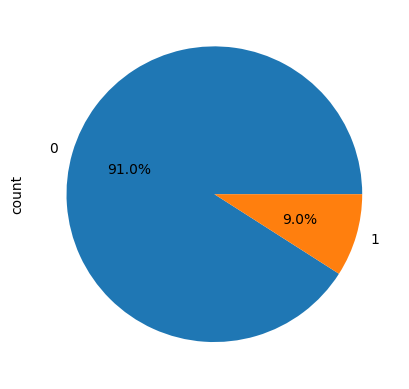

In [ ]:
df['store room'].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

## **POOJA ROOM**

In [ ]:
df['pooja room'].head()

0    0
1    0
2    0
3    0
4    0
Name: pooja room, dtype: int64

**No missing values observed**

In [ ]:
df['pooja room'].isna().sum()

0

In [ ]:
df['pooja room'].describe()

count    3803.000000
mean        0.174336
std         0.379448
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: pooja room, dtype: float64

**In the pie chart we can observe that most of the properties do not have pooja rooms.**

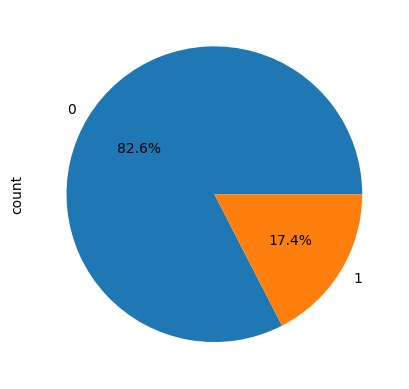

In [ ]:
df['pooja room'].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

## **OTHERS**

In [ ]:
df['others'].head()

0    0
1    0
2    0
3    0
4    1
Name: others, dtype: int64

**No missing values observed**

In [ ]:
df['others'].isna().sum()

0

In [ ]:
df['others'].describe()

count    3803.000000
mean        0.110702
std         0.313804
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: others, dtype: float64

**In the pie chart we can observe that most of the properties do not have others.**

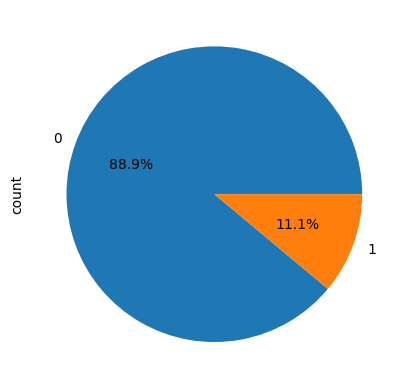

In [ ]:
df['others'].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

# **FURNISHING TYPE**

In [ ]:
df['furnishing_type'].head()

0    0
1    0
2    0
3    0
4    1
Name: furnishing_type, dtype: int64

**No missing values observed**

In [ ]:
df['furnishing_type'].isnull().sum()

0

In [ ]:
df['furnishing_type'].value_counts()

furnishing_type
0    2509
1    1078
2     216
Name: count, dtype: int64

In [ ]:
df['furnishing_type'].describe()

count    3803.000000
mean        0.397055
std         0.594214
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         2.000000
Name: furnishing_type, dtype: float64

**In the pie chart we can observe that most of the properties are unfurnished .**

<Axes: ylabel='count'>

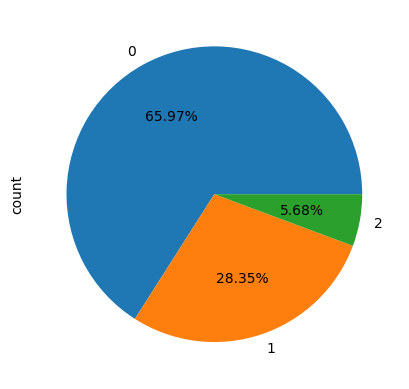

In [ ]:
#pie chart
df['furnishing_type'].value_counts().plot(kind='pie',autopct='%0.2f%%')

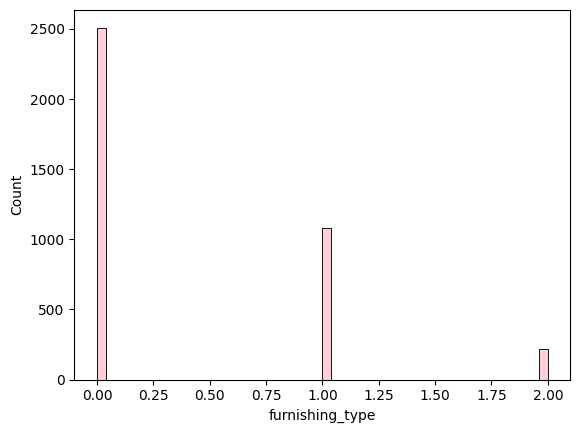

In [ ]:
#histogram
sns.histplot(df['furnishing_type'], bins=50, color='pink')
plt.show()

**No outliers observed in the box plot.**

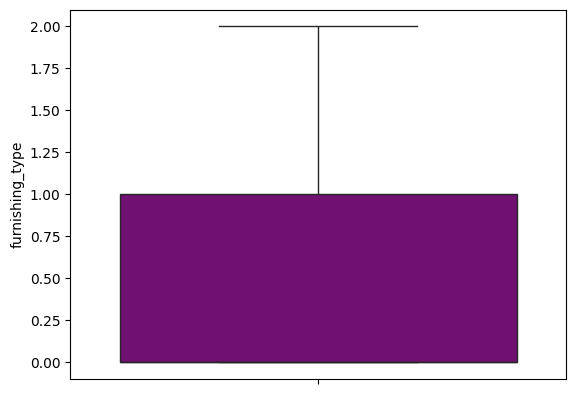

In [ ]:
# Box plot
sns.boxplot(df['furnishing_type'], color='purple')
plt.show()

In [ ]:
# Skewness and kurtosis
skewness = df['furnishing_type'].skew()
kurtosis = df['furnishing_type'].kurt()
print(skewness,kurtosis)

1.2152167536922434 0.44366852193706885


# **LUXURY SCORE**

In [ ]:
df['luxury_score'].head()

0      8
1     38
2     15
3     49
4    174
Name: luxury_score, dtype: int64

**No missing values observed.**

In [ ]:
df['luxury_score'].isna().sum()

0

In [ ]:
df['luxury_score'].describe()

count    3803.000000
mean       70.947936
std        52.821789
min         0.000000
25%        31.000000
50%        58.000000
75%       109.000000
max       174.000000
Name: luxury_score, dtype: float64

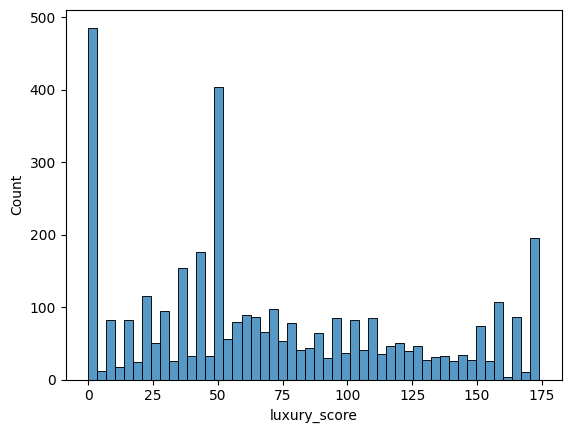

In [ ]:
#histogram
sns.histplot(df['luxury_score'],bins=50)
plt.show()

**No outliers observed on the box plot**

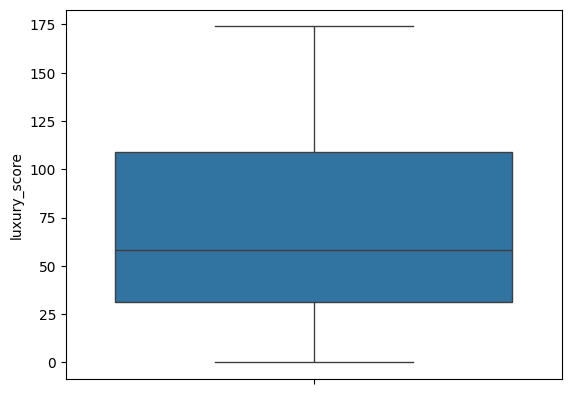

In [ ]:
#boxplot
sns.boxplot(df['luxury_score'])
plt.show()

In [ ]:
df['luxury_score'].value_counts()

luxury_score
0      486
49     353
174    196
44      62
38      58
      ... 
154      3
161      3
147      2
155      1
169      1
Name: count, Length: 161, dtype: int64

**Performed frequency binning for luxury score to reduce cardinality.**

In [ ]:
# Frequency distribution for luxury_score
luxury_score_counts = df['luxury_score'].value_counts()

luxury_score_frequency_bins = {

    "High (400-486)": ((luxury_score_counts >=400) & (luxury_score_counts <= 486)).sum(),
    "Average (76-400)": ((luxury_score_counts >= 76) & (luxury_score_counts < 400)).sum(),
    "Low (1-75)": ((luxury_score_counts >=1) & (luxury_score_counts <= 75)).sum()
}

luxury_score_frequency_bins

{'High (400-486)': 1, 'Average (76-400)': 2, 'Low (1-75)': 158}

In [ ]:
# Skewness and kurtosis
skewness = df['luxury_score'].skew()
kurtosis = df['luxury_score'].kurt()
print(skewness,kurtosis)

0.47028839425636054 -0.8553365481063526


# **MULTIVARIATE ANALYSIS**

## price vs property type

**Performed multivariate analysis of price with every column to analyse the dependency by using different plots.**

**We observed that the price of houses was higher compared to the price of flats.**

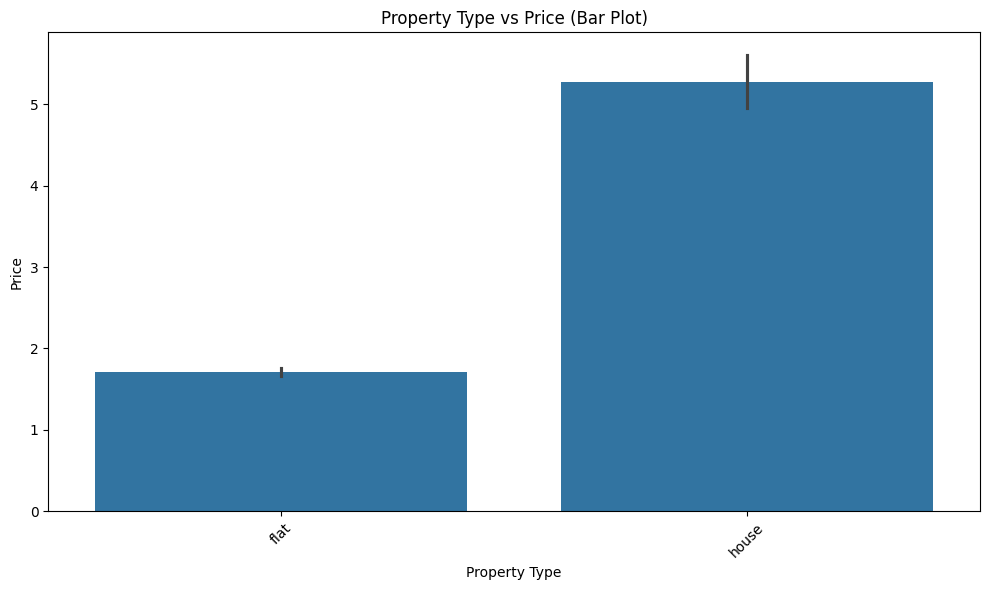

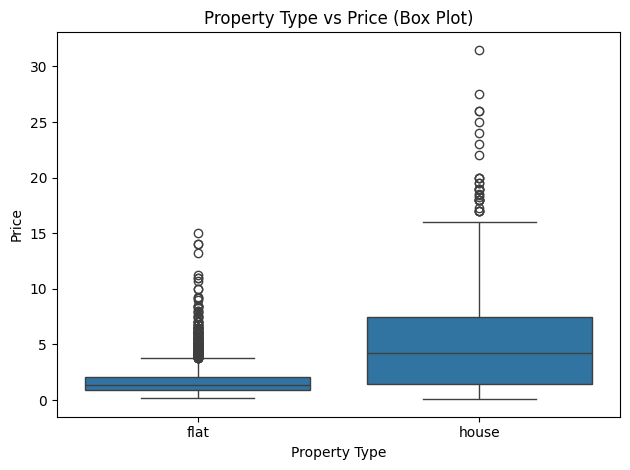

In [ ]:
# Bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='property_type', y='price', data=df)
plt.title('Property Type vs Price (Bar Plot)')
plt.xlabel('Property Type')
plt.ylabel('Price')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

# Box Plot
sns.boxplot(data=df, x='property_type', y='price')
plt.title('Property Type vs Price (Box Plot)')
plt.xlabel('Property Type')
plt.ylabel('Price')
plt.tight_layout()
plt.show()

## price vs society

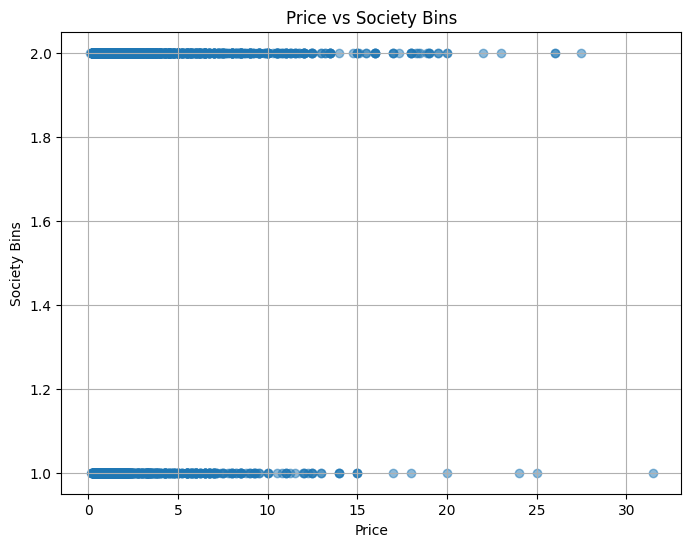

In [ ]:
# Plot price vs society bins
plt.figure(figsize=(8, 6))
plt.scatter(df['price'], df['society_bin'], alpha=0.5)
plt.xlabel('Price')
plt.ylabel('Society Bins')
plt.title('Price vs Society Bins')
plt.grid(True)
plt.show()

## price vs sector

([0, 1], [Text(0, 0, '1'), Text(1, 0, '2')])

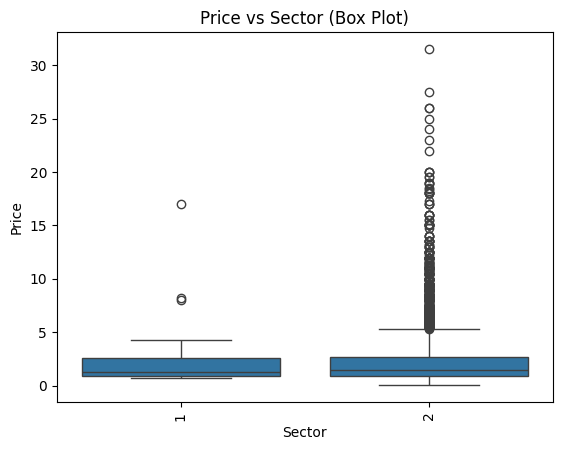

In [ ]:
# Box plot
sns.boxplot(data=df, x='sector_bin', y='price')
plt.title('Price vs Sector (Box Plot)')
plt.xlabel('Sector')
plt.ylabel('Price')
plt.xticks(rotation=90)

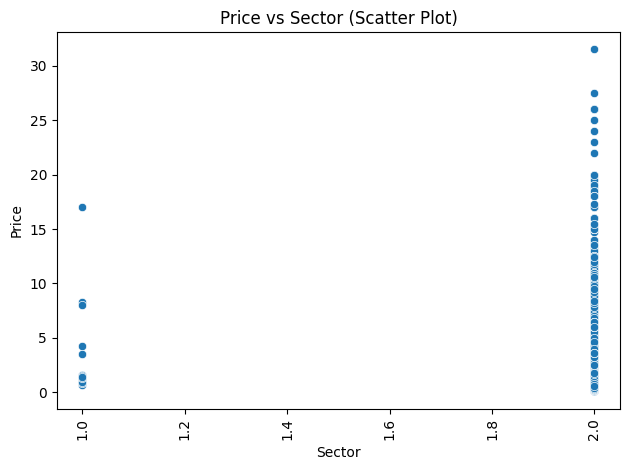

In [ ]:
# Scatter plot
sns.scatterplot(data=df, x='sector_bin', y='price')
plt.title('Price vs Sector (Scatter Plot)')
plt.xlabel('Sector')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## price vs price per sqft

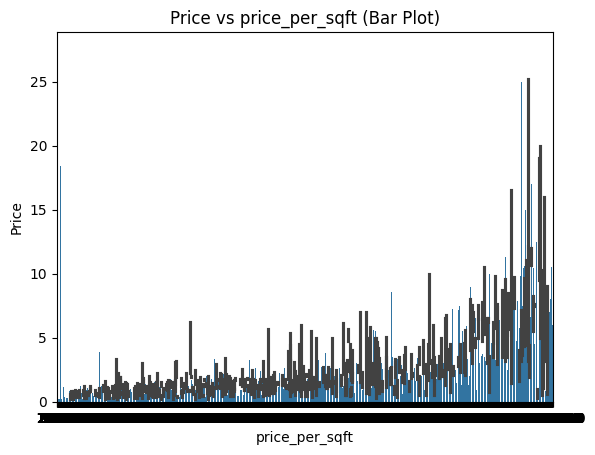

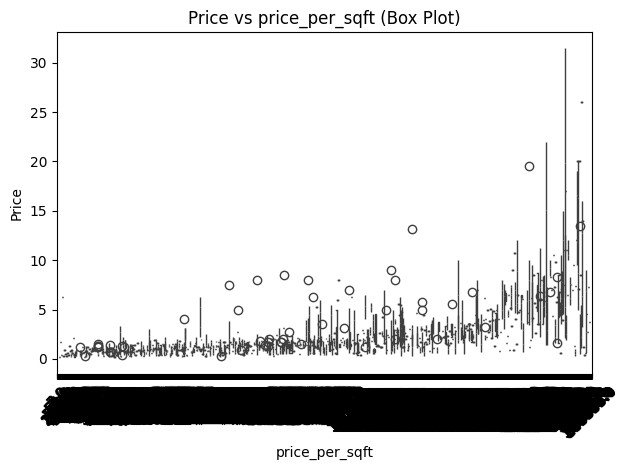

In [ ]:
# Bar plot
sns.barplot(data=df, x='price_per_sqft', y='price')
plt.title('Price vs price_per_sqft (Bar Plot)')
plt.xlabel('price_per_sqft')
plt.ylabel('Price')
plt.show()

# Box Plot
sns.boxplot(data=df, x='price_per_sqft', y='price')
plt.title('Price vs price_per_sqft (Box Plot)')
plt.xlabel('price_per_sqft')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## price vs area

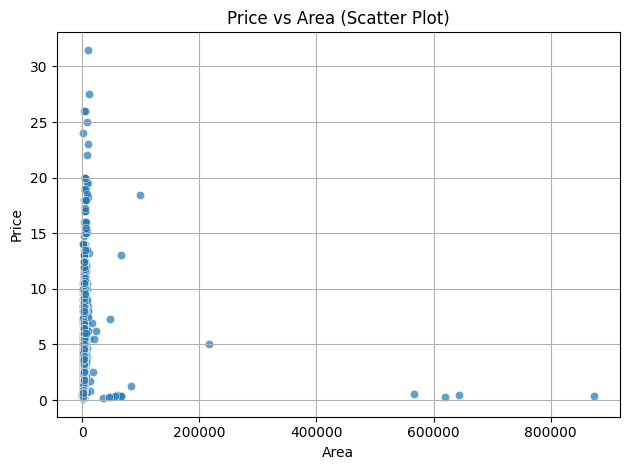

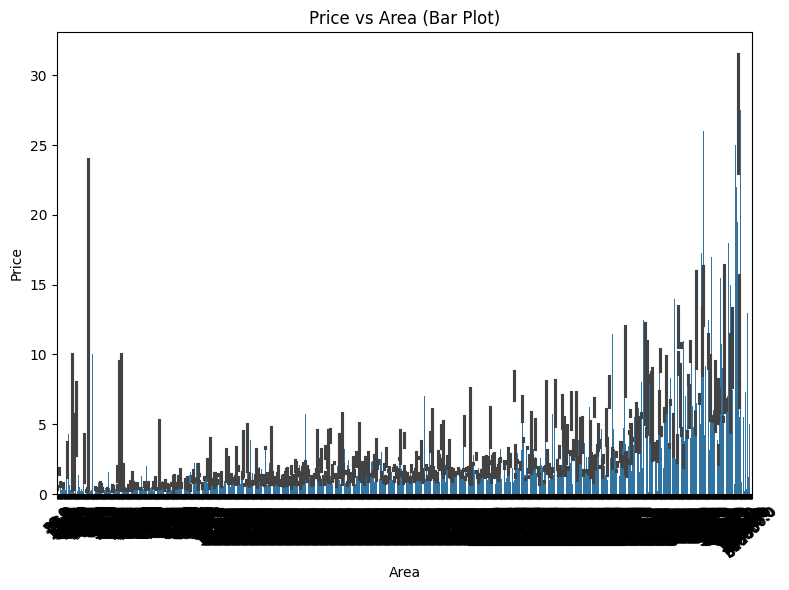

In [ ]:
#scatter plot
sns.scatterplot(data=df, x='area', y='price', alpha=0.7)
plt.title('Price vs Area (Scatter Plot)')
plt.xlabel('Area')
plt.ylabel('Price')
plt.grid(True)
plt.tight_layout()
plt.show()

# Bar plot
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='area', y='price')
plt.title('Price vs Area (Bar Plot)')
plt.xlabel('Area')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## price vs bedroom

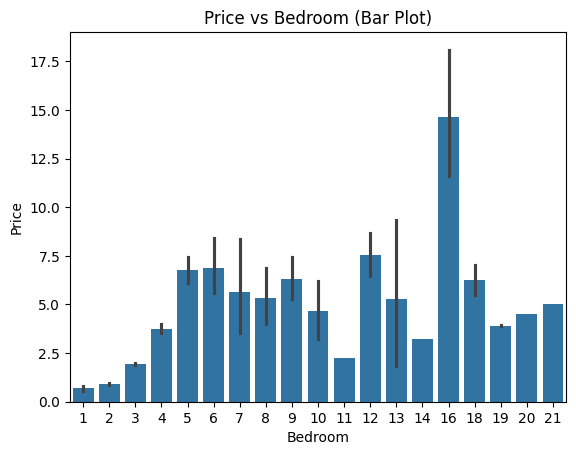

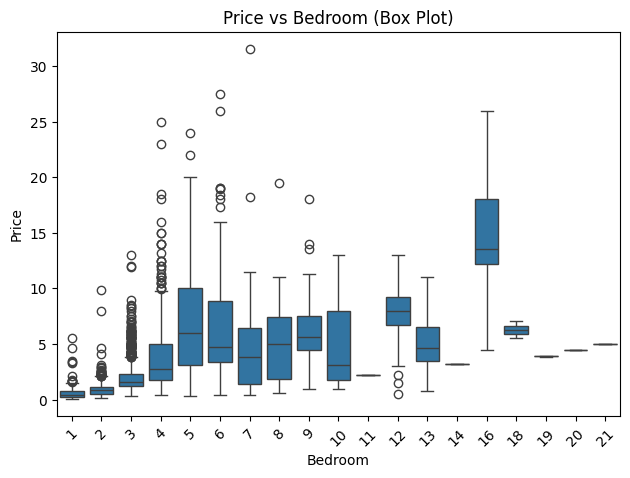

In [ ]:
# Bar plot
sns.barplot(data=df, x='bedRoom', y='price')
plt.title('Price vs Bedroom (Bar Plot)')
plt.xlabel('Bedroom')
plt.ylabel('Price')
plt.show()

# Box plot
sns.boxplot(data=df, x='bedRoom', y='price')
plt.title('Price vs Bedroom (Box Plot)')
plt.xlabel('Bedroom')
plt.ylabel('Price')
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

## price vs balcony

Text(0, 0.5, 'Price')

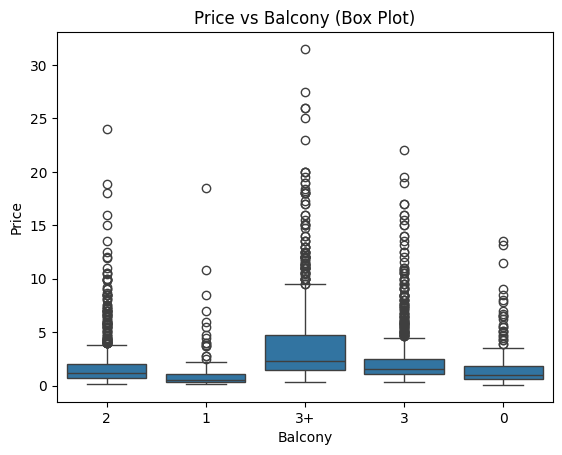

In [ ]:
# Box Plot
sns.boxplot(data=df, x='balcony', y='price')
plt.title('Price vs Balcony (Box Plot)')
plt.xlabel('Balcony')
plt.ylabel('Price')

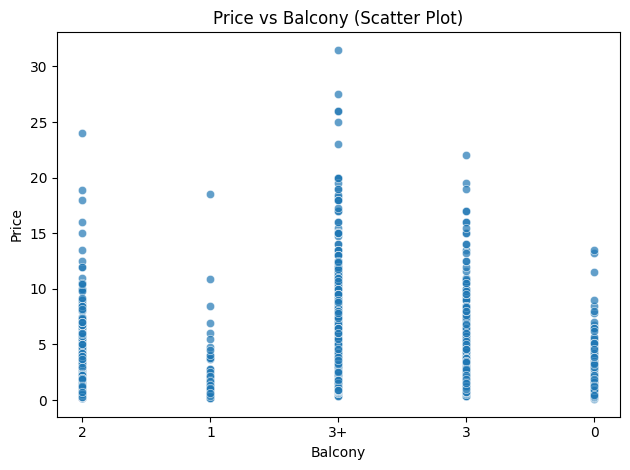

In [ ]:
# Scatter Plot
sns.scatterplot(data=df, x='balcony', y='price', alpha=0.7)
plt.title('Price vs Balcony (Scatter Plot)')
plt.xlabel('Balcony')
plt.ylabel('Price')
plt.tight_layout()
plt.show()

## price vs bathroom

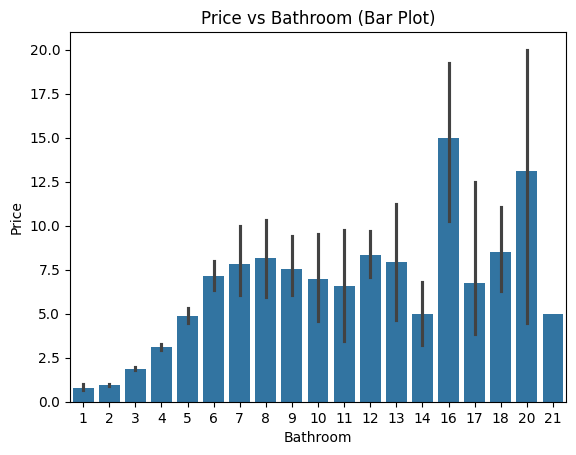

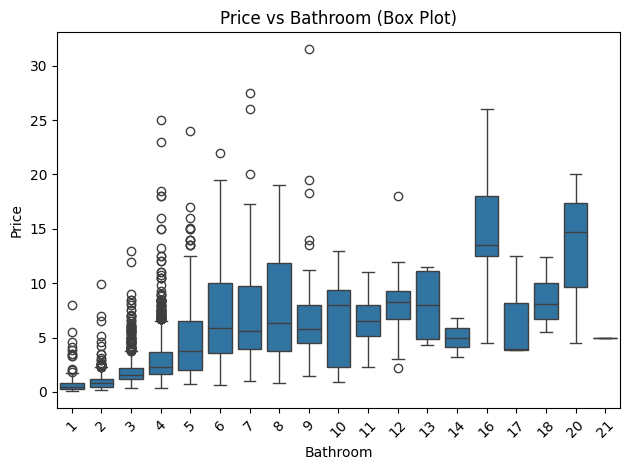

In [ ]:
# Bar plot
sns.barplot(data=df, x='bathroom', y='price')
plt.title('Price vs Bathroom (Bar Plot)')
plt.xlabel('Bathroom')
plt.ylabel('Price')
plt.show()

# Box Plot
sns.boxplot(data=df, x='bathroom', y='price')
plt.title('Price vs Bathroom (Box Plot)')
plt.xlabel('Bathroom')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## price vs floor num

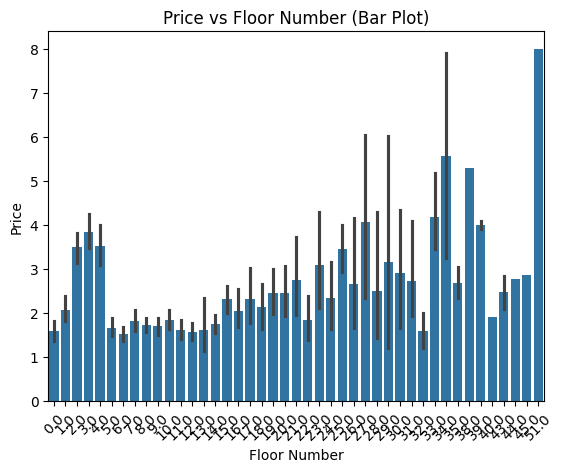

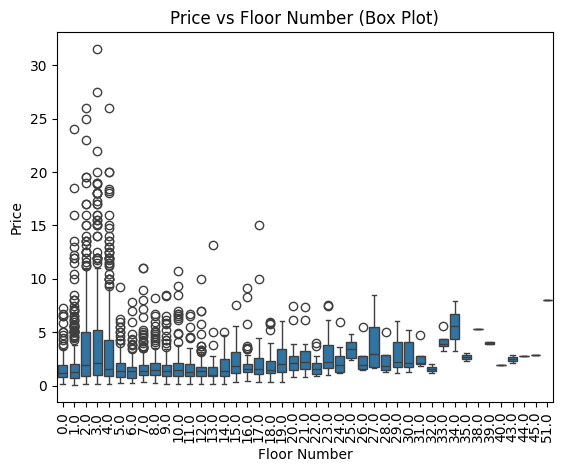

In [ ]:
# Bar plot
sns.barplot(data=df, x='floorNum', y='price')
plt.title('Price vs Floor Number (Bar Plot)')
plt.xlabel('Floor Number')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

# Box Plot
sns.boxplot(data=df, x='floorNum', y='price')
plt.title('Price vs Floor Number (Box Plot)')
plt.xlabel('Floor Number')
plt.ylabel('Price')
plt.xticks(rotation=90)
#plt.tight_layout()
plt.show()

## price vs facing

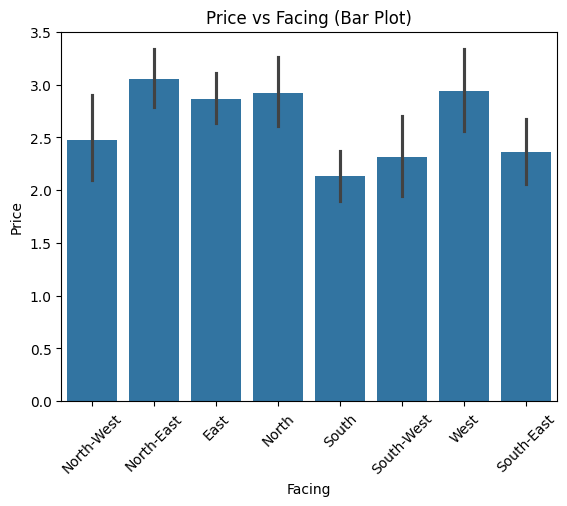

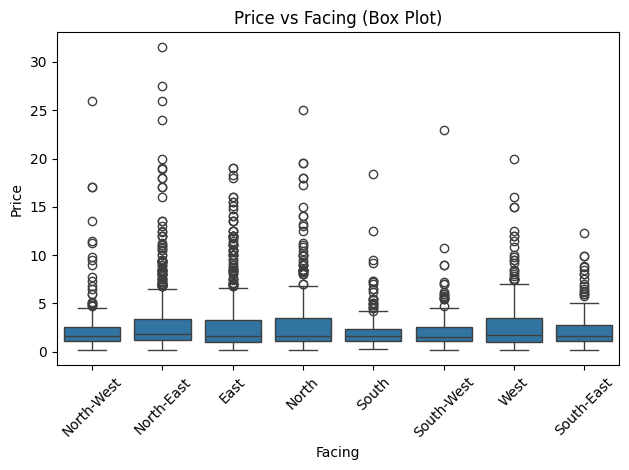

In [ ]:
# Bar plot
sns.barplot(data=df, x='facing', y='price')
plt.title('Price vs Facing (Bar Plot)')
plt.xlabel('Facing')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

# Box Plot
sns.boxplot(data=df, x='facing', y='price')
plt.title('Price vs Facing (Box Plot)')
plt.xlabel('Facing')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## price vs age possesion

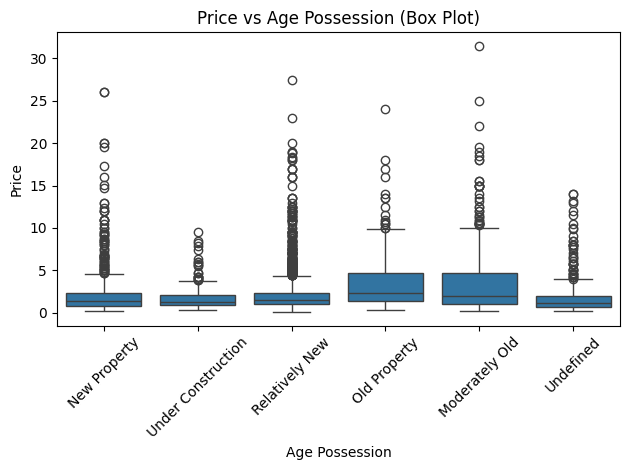

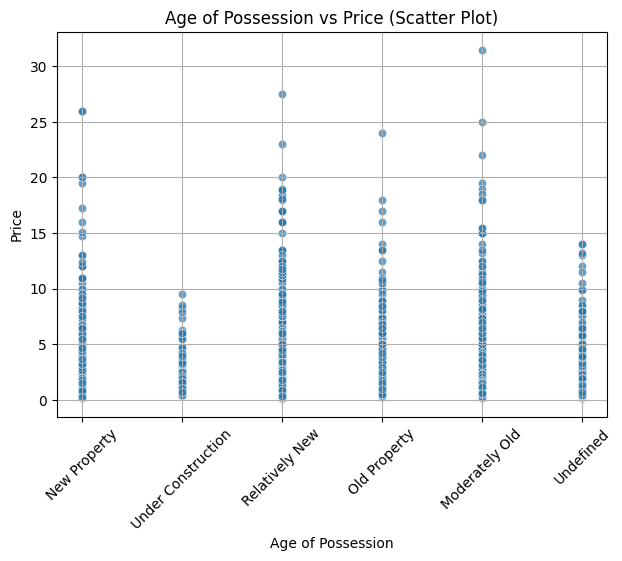

In [ ]:
# Box Plot
sns.boxplot(data=df, x='agePossession', y='price')
plt.title('Price vs Age Possession (Box Plot)')
plt.xlabel('Age Possession')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Scatter Plot
sns.scatterplot(data=df, x='agePossession', y='price', alpha=0.7)
plt.title('Age of Possession vs Price (Scatter Plot)')
plt.xlabel('Age of Possession')
plt.ylabel('Price')
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

## price vs super built up area

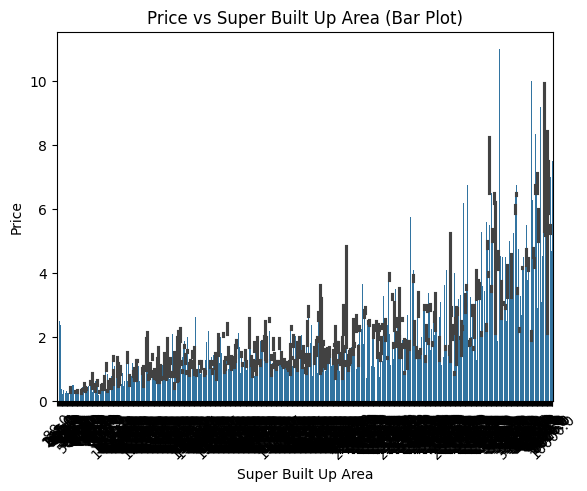

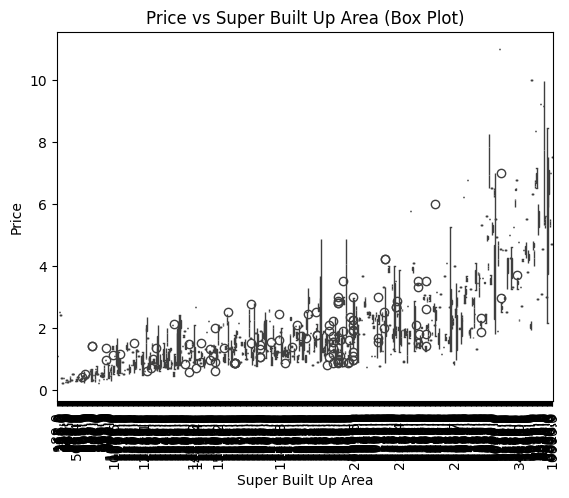

In [ ]:
# Bar plot
sns.barplot(data=df, x='super_built_up_area', y='price')
plt.title('Price vs Super Built Up Area (Bar Plot)')
plt.xlabel('Super Built Up Area')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

# Box plot
sns.boxplot(data=df, x='super_built_up_area', y='price')
plt.title('Price vs Super Built Up Area (Box Plot)')
plt.xlabel('Super Built Up Area')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.show()

## price vs built up area

In [ ]:
# Bar Plot
sns.barplot(data=df, x='built_up_area', y='price')
plt.title('Price vs Built Up Area (Bar Plot)')
plt.xlabel('Built Up Area')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

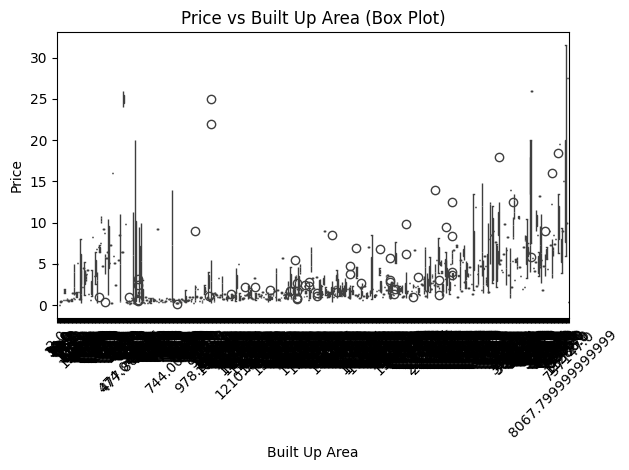

In [ ]:
# Box Plot
sns.boxplot(data=df, x='built_up_area', y='price')
plt.title('Price vs Built Up Area (Box Plot)')
plt.xlabel('Built Up Area')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## price vs carpet area

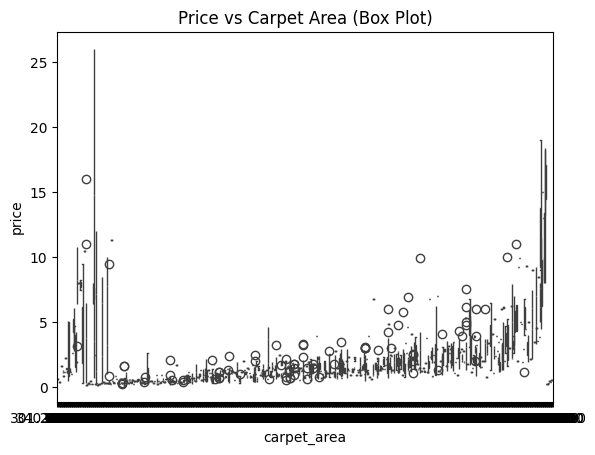

In [ ]:
# Carpet Area
# Bar plot
sns.barplot(data=df, x='carpet_area', y='price')
plt.title('Price vs Carpet Area (Bar Plot)')
plt.show()

# Box plot
sns.boxplot(data=df, x='carpet_area', y='price')
plt.title('Price vs Carpet Area (Box Plot)')
plt.show()

## price vs study room

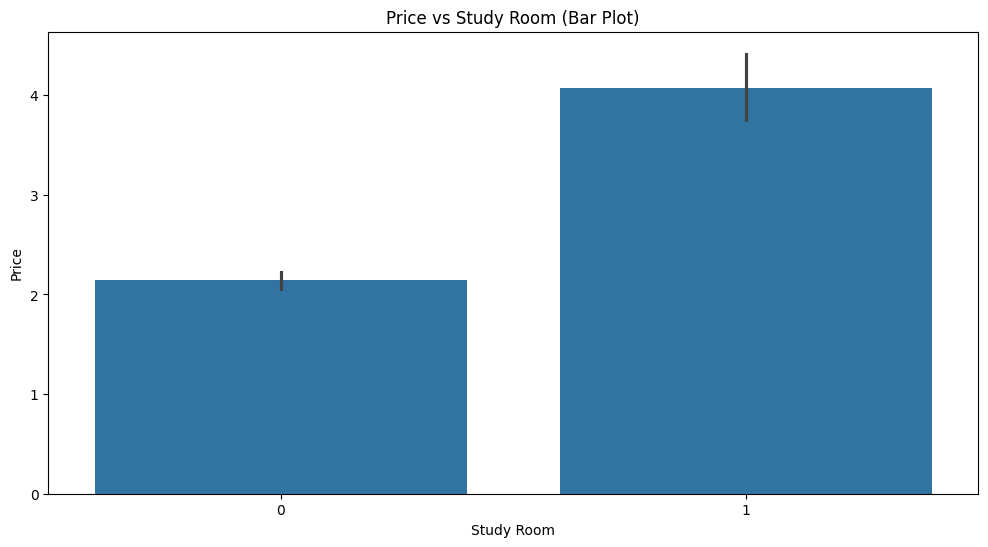

Text(0, 0.5, 'Price')

In [ ]:
# Bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='study room', y='price')
plt.title('Price vs Study Room (Bar Plot)')
plt.xlabel('Study Room')
plt.ylabel('Price')
plt.show()

# Box plot
sns.boxplot(data=df, x='study room', y='price')
plt.title('Price vs Study Room (Box Plot)')
plt.xlabel('Study Room')
plt.ylabel('Price')

## price vs servant room

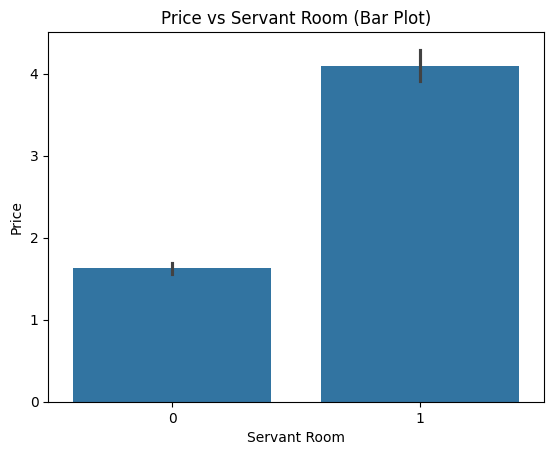

Text(0, 0.5, 'Price')

In [ ]:
# Servant Room
# Bar plot
sns.barplot(data=df, x='servant room', y='price')
plt.title('Price vs Servant Room (Bar Plot)')
plt.xlabel('Servant Room')
plt.ylabel('Price')
plt.show()

# Box plot
sns.boxplot(data=df, x='servant room', y='price')
plt.title('Price vs Servant Room (Box Plot)')
plt.xlabel('Servant Room')
plt.ylabel('Price')

## price vs store room

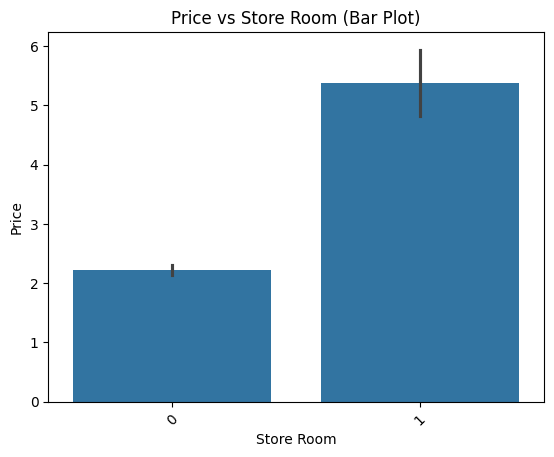

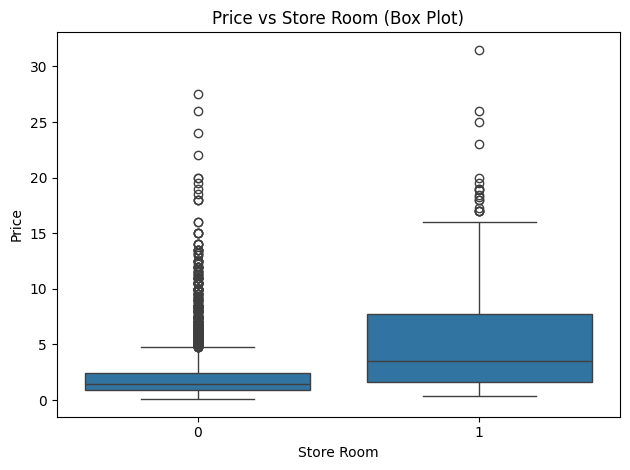

In [ ]:
# Store Room
# Bar plot
sns.barplot(data=df, x='store room', y='price')
plt.title('Price vs Store Room (Bar Plot)')
plt.xlabel('Store Room')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

# Box plot

sns.boxplot(data=df, x='store room', y='price')
plt.title('Price vs Store Room (Box Plot)')
plt.xlabel('Store Room')
plt.ylabel('Price')
plt.tight_layout()
plt.show()

## price vs pooja room

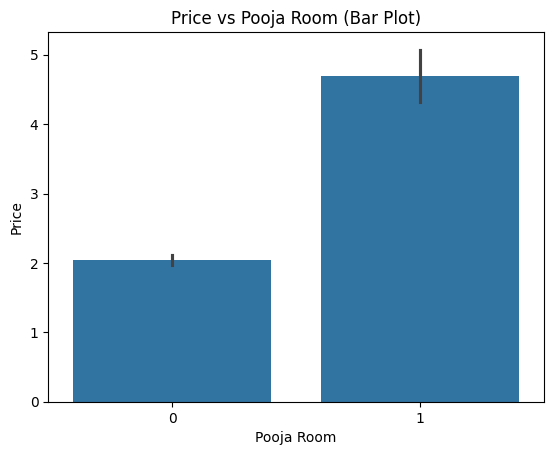

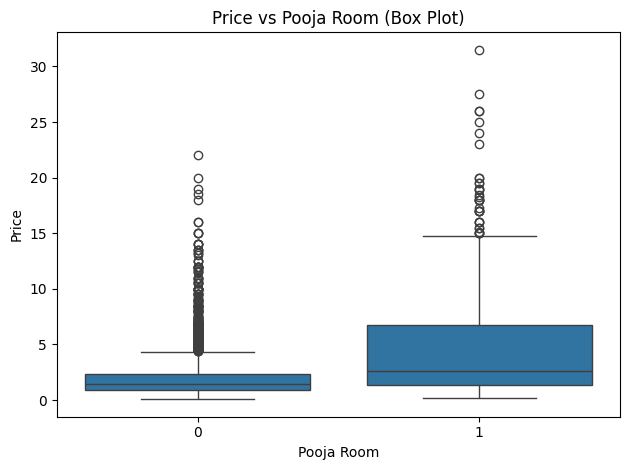

In [ ]:
# Pooja Room
# Bar plot
sns.barplot(data=df, x='pooja room', y='price')
plt.title('Price vs Pooja Room (Bar Plot)')
plt.xlabel('Pooja Room')
plt.ylabel('Price')
plt.show()

# Box plot
sns.boxplot(data=df, x='pooja room', y='price')
plt.title('Price vs Pooja Room (Box Plot)')
plt.xlabel('Pooja Room')
plt.ylabel('Price')
plt.tight_layout()
plt.show()

## price vs others

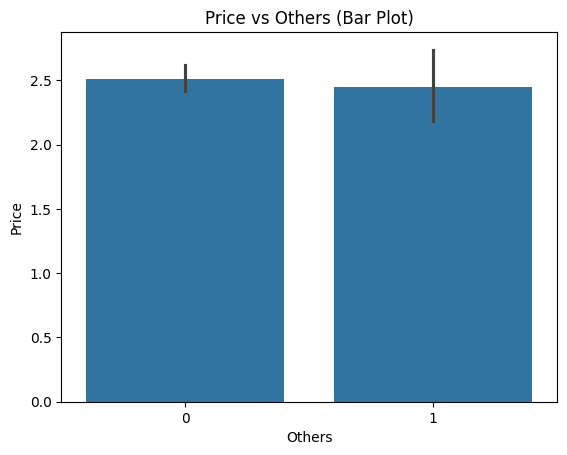

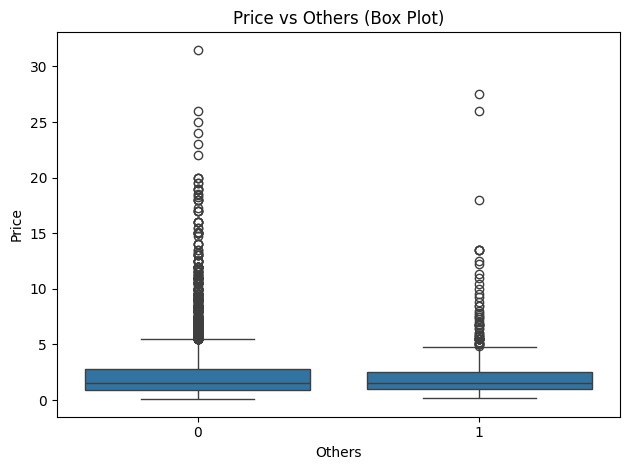

In [ ]:
# Others
# Bar plot
sns.barplot(data=df, x='others', y='price')
plt.title('Price vs Others (Bar Plot)')
plt.xlabel('Others')
plt.ylabel('Price')
plt.show()

# Box plot
sns.boxplot(data=df, x='others', y='price')
plt.title('Price vs Others (Box Plot)')
plt.xlabel('Others')
plt.ylabel('Price')
plt.tight_layout()
plt.show()

## price vs furnishing type

In [ ]:
# Bar plot
sns.barplot(data=df, x='furnishing_type', y='price')
plt.title('Price vs Furnishing Type (Bar Plot)')
plt.xlabel('Furnishing Type')
plt.ylabel('Price')
plt.show()

# Box Plot
sns.boxplot(data=df, x='furnishing_type', y='price')
plt.title('Price vs Furnishing Type (Box Plot)')
plt.xlabel('Furnishing Type')
plt.ylabel('Price')
plt.tight_layout()
plt.show()

## price vs luxury score

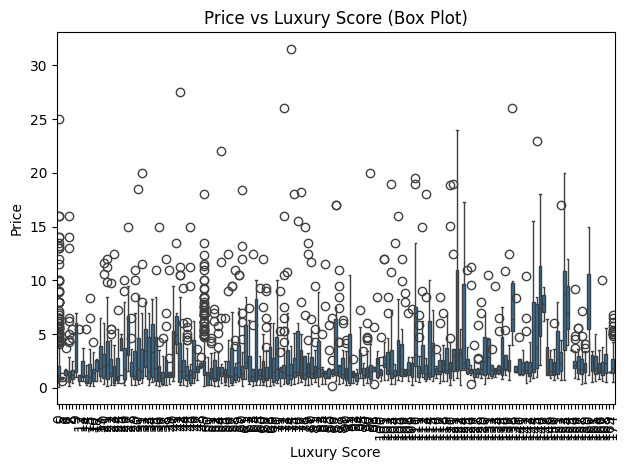

In [ ]:
# Bar plot
sns.scatterplot(data=df, x='luxury_score', y='price', hue='price')
plt.title('Price vs Luxury Score (2D Histogram)')
plt.xlabel('Luxury Score')
plt.ylabel('Price')
plt.show()

# Box Plot
sns.boxplot(data=df, x='luxury_score', y='price')
plt.title('Price vs Luxury Score (Box Plot)')
plt.xlabel('Luxury Score')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# MULTIVARIATE ANALYSIS for property type  

**Performed multivariate analysis of property type with every column to observe how columns are influencing property type.**

## property type vs society

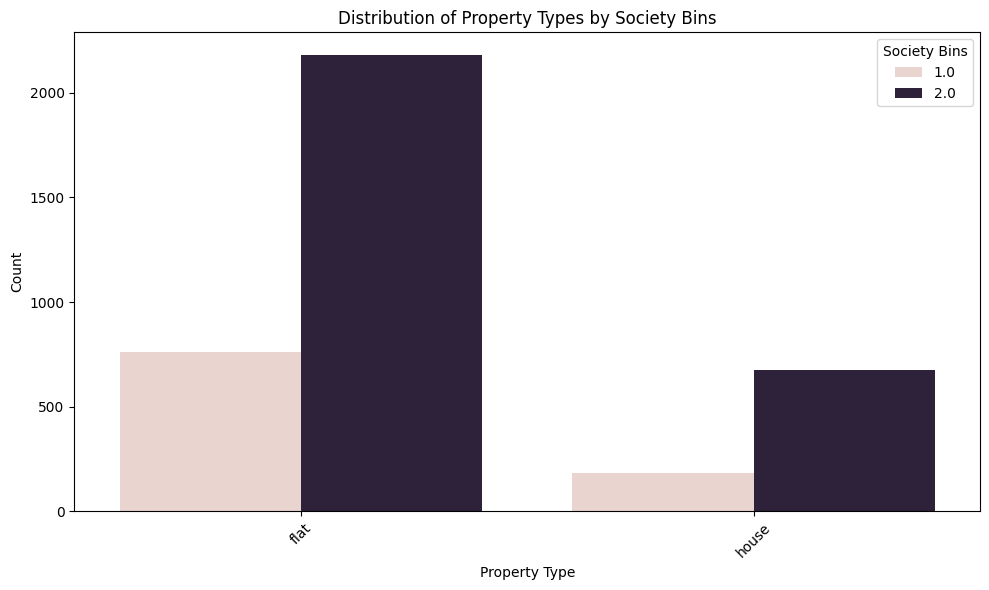

In [ ]:

# Assuming 'property_type' is a column in your DataFrame
# You may need to adjust this depending on your actual column name
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='property_type', hue='society_bin')
plt.xlabel('Property Type')
plt.ylabel('Count')
plt.title('Distribution of Property Types by Society Bins')
plt.xticks(rotation=45)
plt.legend(title='Society Bins')
plt.tight_layout()
plt.show()


# Box Plot
sns.boxplot(data=df, x='society_bin', y='property_type')
plt.title('Society vs property_type (Box Plot)')
plt.xlabel('Society')
plt.ylabel('property_type')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## property type vs sector

(array([0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2]),
 [Text(0.8, 0, '0.8'),
  Text(1.0, 0, '1.0'),
  Text(1.2000000000000002, 0, '1.2'),
  Text(1.4000000000000001, 0, '1.4'),
  Text(1.6, 0, '1.6'),
  Text(1.8, 0, '1.8'),
  Text(2.0, 0, '2.0'),
  Text(2.2, 0, '2.2')])

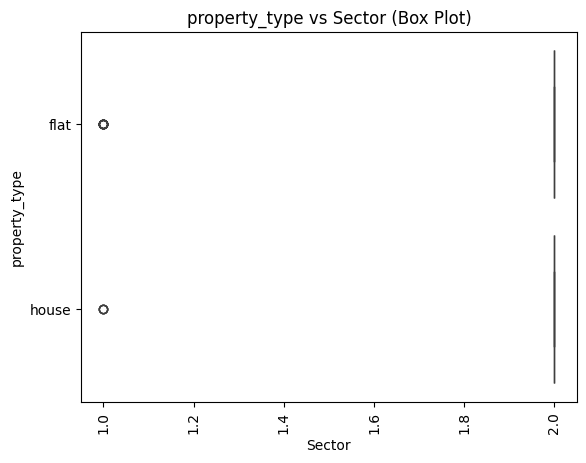

In [ ]:
# Box plot
sns.boxplot(data=df, x='sector_bin', y='property_type')
plt.title('property_type vs Sector (Box Plot)')
plt.xlabel('Sector')
plt.ylabel('property_type')
plt.xticks(rotation=90)

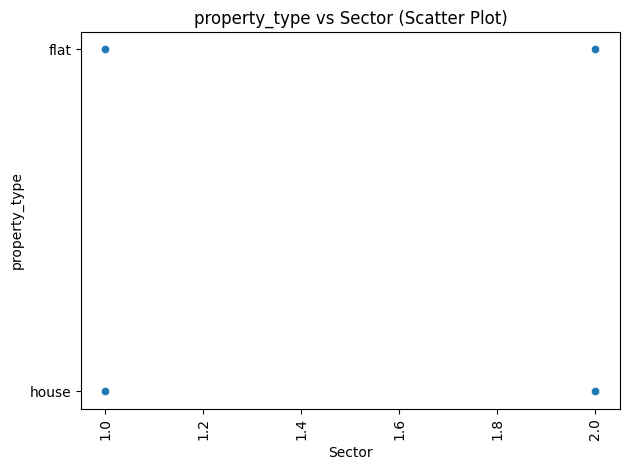

In [ ]:
# Scatter plot
sns.scatterplot(data=df, x='sector_bin', y='property_type')
plt.title('property_type vs Sector (Scatter Plot)')
plt.xlabel('Sector')
plt.ylabel('property_type')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## property type vs price per sqft

<Axes: xlabel='property_type', ylabel='price_per_sqft'>

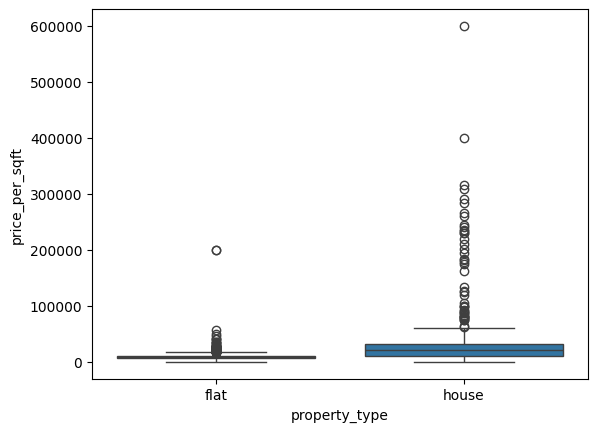

In [ ]:
df=df[df['price_per_sqft']!=737147]
sns.boxplot(x=df['property_type'], y=df['price_per_sqft'])

<Axes: xlabel='property_type', ylabel='price_per_sqft'>

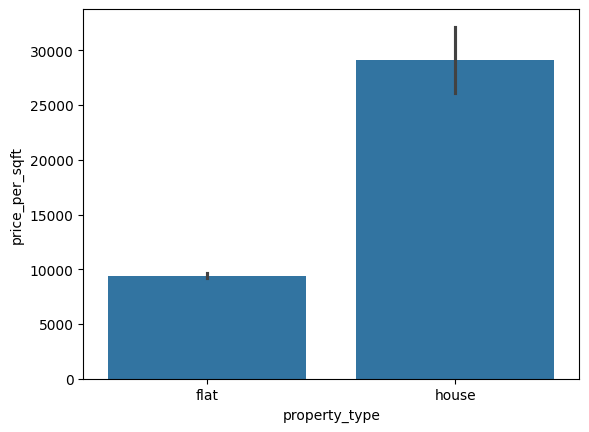

In [ ]:
df=df[df['price_per_sqft']!=737147]
sns.barplot(x=df['property_type'], y=df['price_per_sqft'])

## property type vs area

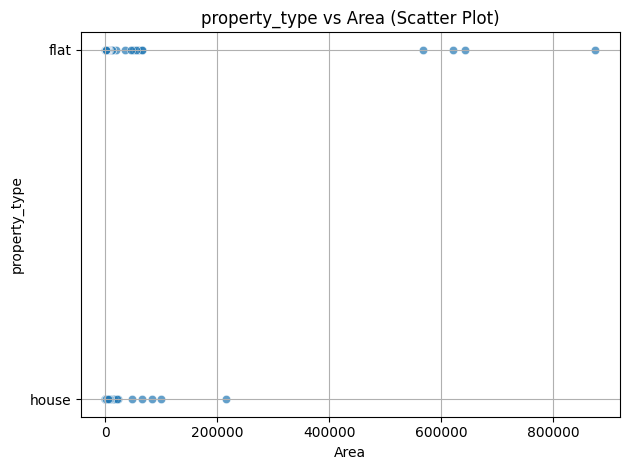

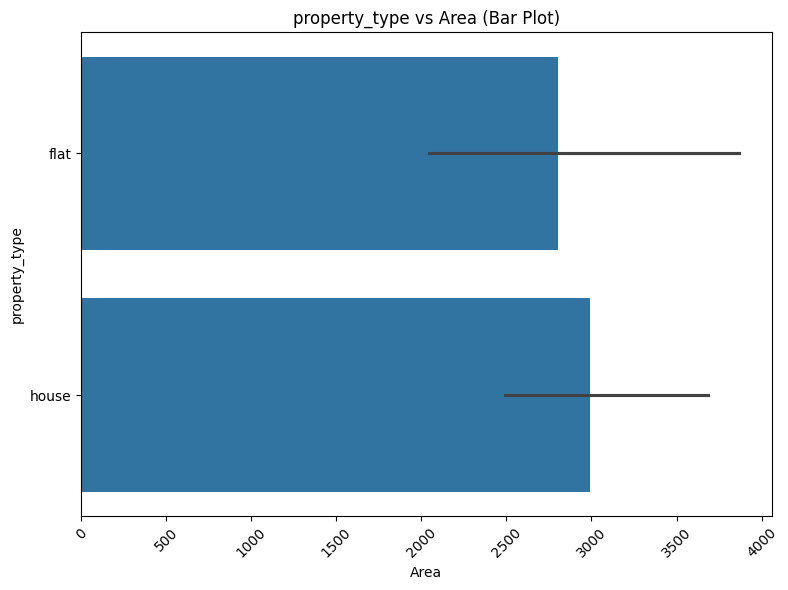

In [ ]:
#scatter plot
sns.scatterplot(data=df, x='area', y='property_type', alpha=0.7)
plt.title('property_type vs Area (Scatter Plot)')
plt.xlabel('Area')
plt.ylabel('property_type')
plt.grid(True)
plt.tight_layout()
plt.show()

# Bar plot
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='area', y='property_type')
plt.title('property_type vs Area (Bar Plot)')
plt.xlabel('Area')
plt.ylabel('property_type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## property type vs bedroom

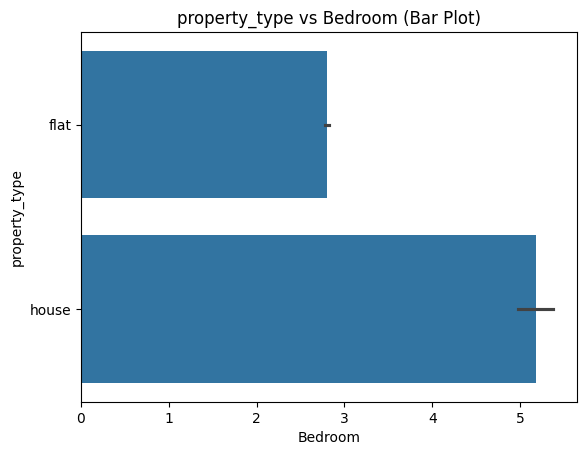

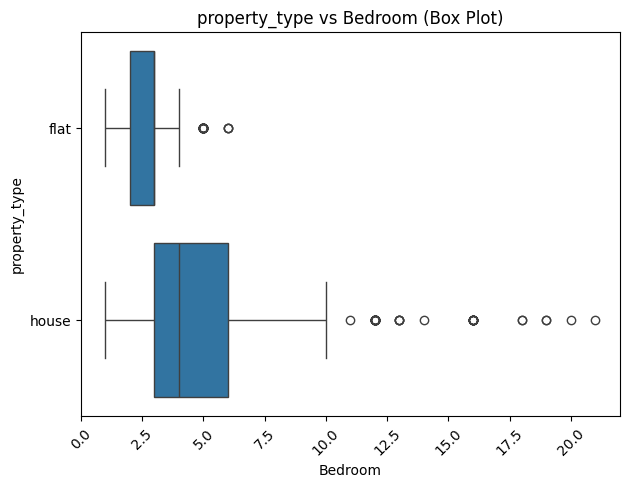

In [ ]:
# Bar plot
sns.barplot(data=df, x='bedRoom', y='property_type')
plt.title('property_type vs Bedroom (Bar Plot)')
plt.xlabel('Bedroom')
plt.ylabel('property_type')
plt.show()

# Box plot
sns.boxplot(data=df, x='bedRoom', y='property_type')
plt.title('property_type vs Bedroom (Box Plot)')
plt.xlabel('Bedroom')
plt.ylabel('property_type')
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()



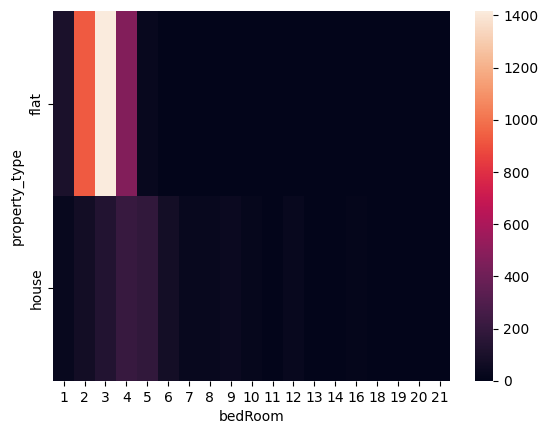

In [ ]:
sns.heatmap(pd.crosstab(df['property_type'],df['bedRoom']))
plt.show()

## property type vs balcony

Text(0, 0.5, 'property_type')

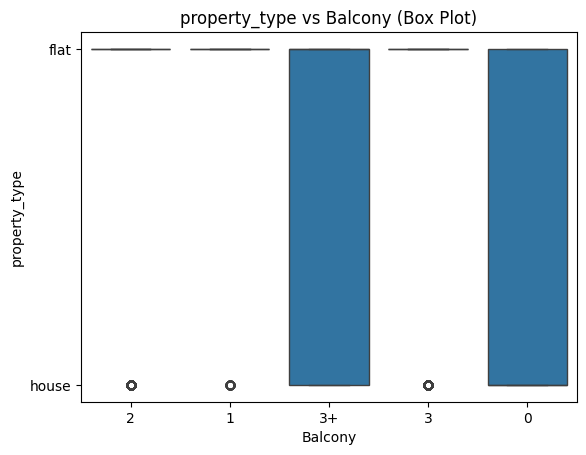

In [ ]:
# Box Plot
sns.boxplot(data=df, x='balcony', y='property_type')
plt.title('property_type vs Balcony (Box Plot)')
plt.xlabel('Balcony')
plt.ylabel('property_type')

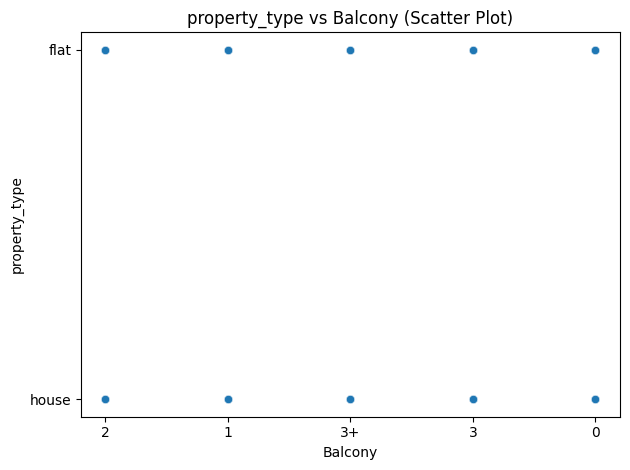

In [ ]:
# Scatter Plot
sns.scatterplot(data=df, x='balcony', y='property_type', alpha=0.7)
plt.title('property_type vs Balcony (Scatter Plot)')
plt.xlabel('Balcony')
plt.ylabel('property_type')
plt.tight_layout()
plt.show()

## property type vs bathroom

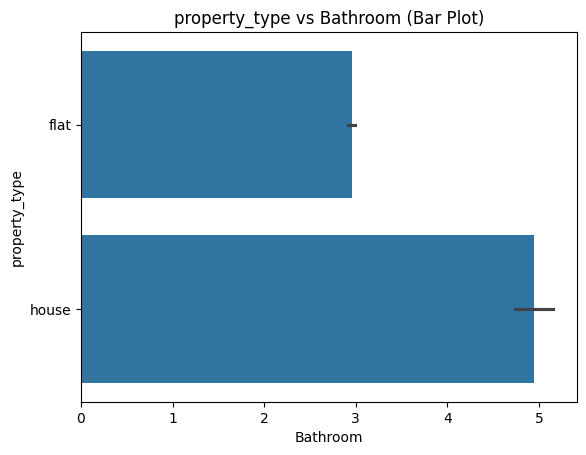

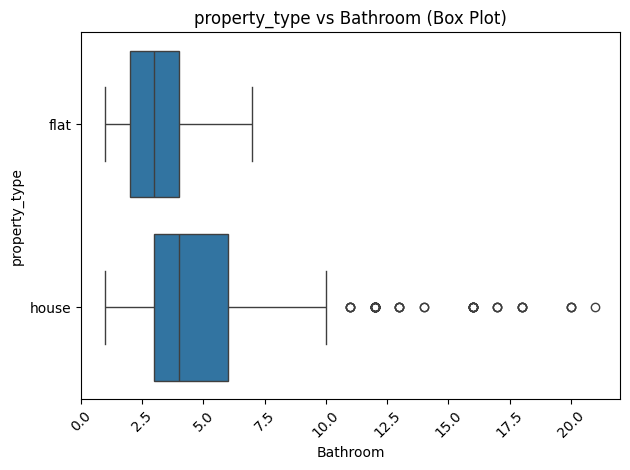

In [ ]:
# Bar plot
sns.barplot(data=df, x='bathroom', y='property_type')
plt.title('property_type vs Bathroom (Bar Plot)')
plt.xlabel('Bathroom')
plt.ylabel('property_type')
plt.show()

# Box Plot
sns.boxplot(data=df, x='bathroom', y='property_type')
plt.title('property_type vs Bathroom (Box Plot)')
plt.xlabel('Bathroom')
plt.ylabel('property_type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## property type vs floor no

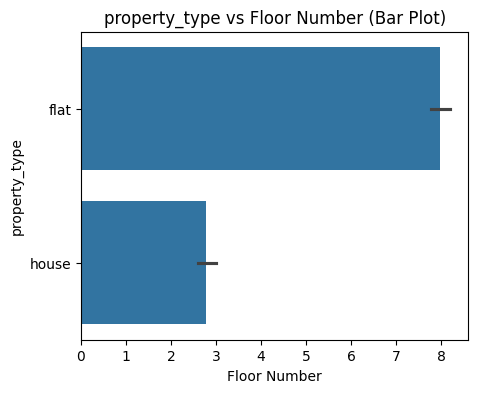

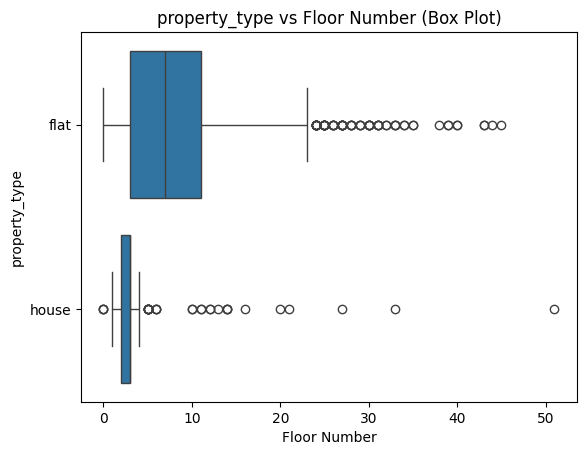

In [ ]:
# Bar plot
plt.figure(figsize=(5,4))
sns.barplot ( x=df['floorNum'], y=df['property_type'])
plt.title('property_type vs Floor Number (Bar Plot)')
plt.xlabel('Floor Number')
plt.ylabel('property_type')

plt.show()

# Box Plot
sns.boxplot(data=df, x='floorNum', y='property_type')
plt.title('property_type vs Floor Number (Box Plot)')
plt.xlabel('Floor Number')
plt.ylabel('property_type')

#plt.tight_layout()
plt.show()

## property type vs facing

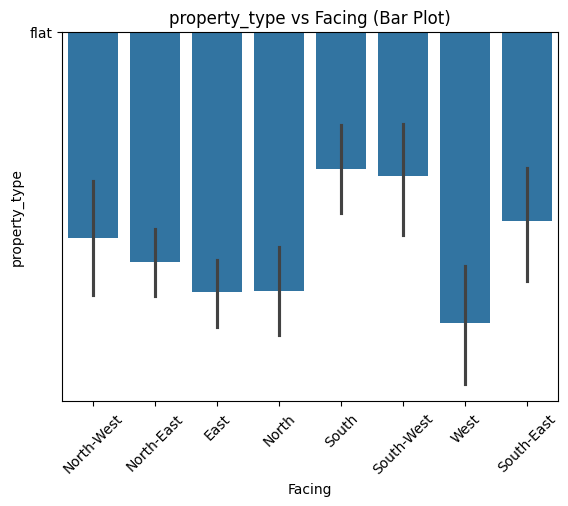

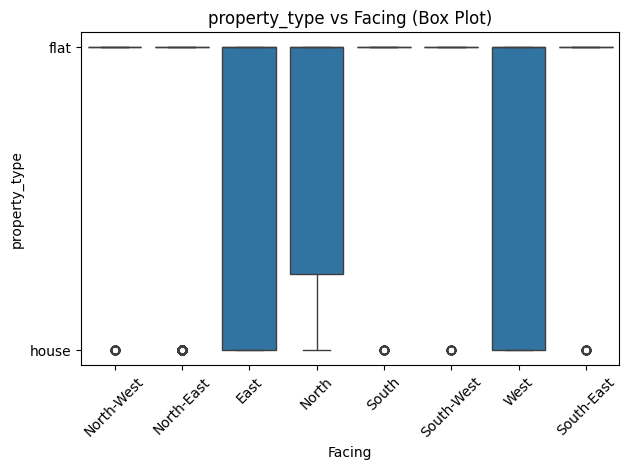

In [ ]:
# Bar plot
sns.barplot(data=df, x='facing', y='property_type')
plt.title('property_type vs Facing (Bar Plot)')
plt.xlabel('Facing')
plt.ylabel('property_type')
plt.xticks(rotation=45)
plt.show()

# Box Plot
sns.boxplot(data=df, x='facing', y='property_type')
plt.title('property_type vs Facing (Box Plot)')
plt.xlabel('Facing')
plt.ylabel('property_type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## property type vs age possesion

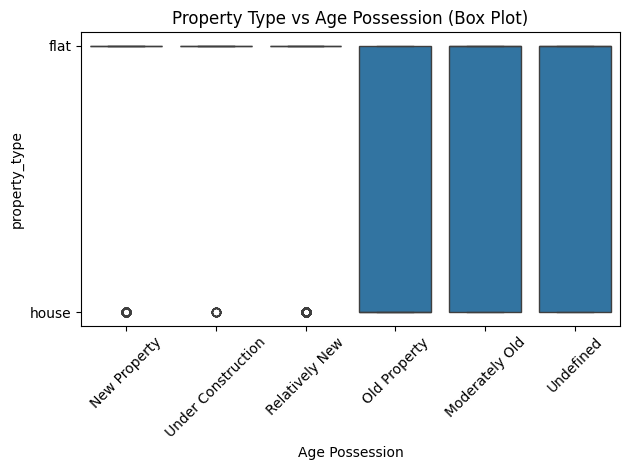

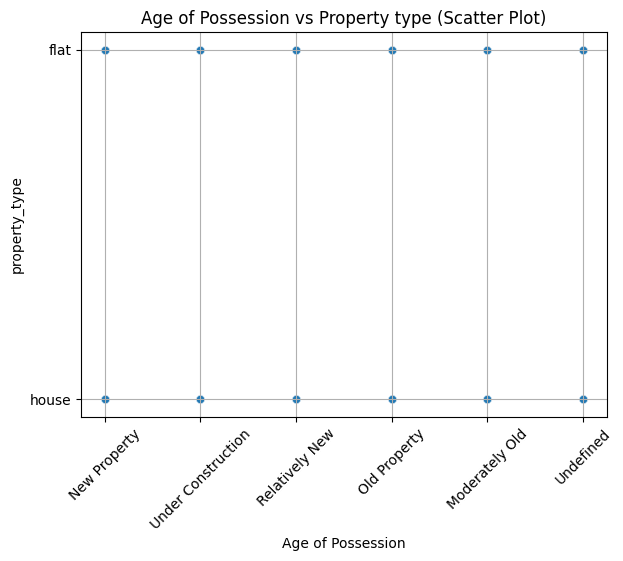

In [ ]:
# Box Plot

sns.boxplot(data=df, x='agePossession', y='property_type')
plt.title('Property Type vs Age Possession (Box Plot)')
plt.xlabel('Age Possession')
plt.ylabel('property_type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Scatter Plot
sns.scatterplot(data=df, x='agePossession', y='property_type', alpha=0.7)
plt.title('Age of Possession vs Property type (Scatter Plot)')
plt.xlabel('Age of Possession')
plt.ylabel('property_type')
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

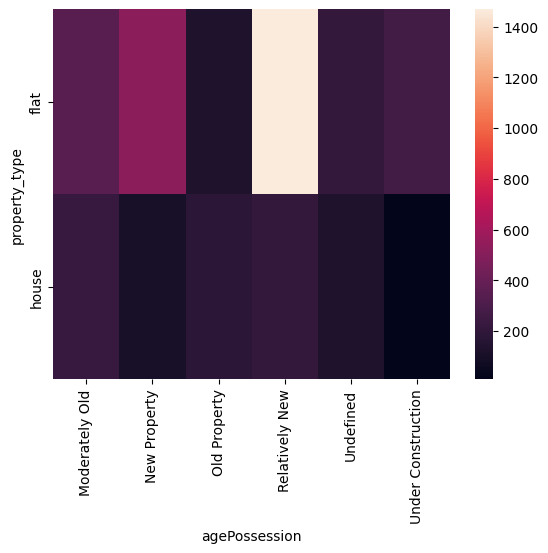

In [ ]:
sns.heatmap(pd.crosstab(df['property_type'],df['agePossession']))
plt.show()

## property type vs built up area

<Axes: xlabel='property_type', ylabel='built_up_area'>

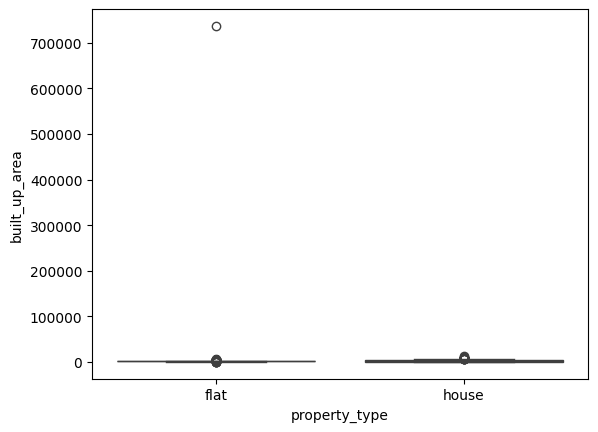

In [ ]:
# Bar Plot

sns.boxplot(x=df['property_type'], y=df['built_up_area'])
# sns.barplot(data=df, x='built_up_area', y='property_type')
# plt.title('property_type vs Built Up Area (Bar Plot)')
# plt.xlabel('Built Up Area')
# plt.ylabel('property_type')
# plt.xticks(rotation=45)
# plt.show()

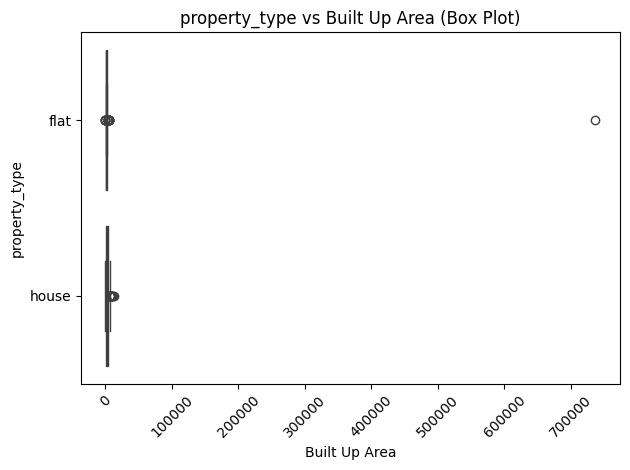

In [ ]:
# Box Plot
sns.boxplot(data=df, x='built_up_area', y='property_type')
plt.title('property_type vs Built Up Area (Box Plot)')
plt.xlabel('Built Up Area')
plt.ylabel('property_type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## property type vs furnishing type

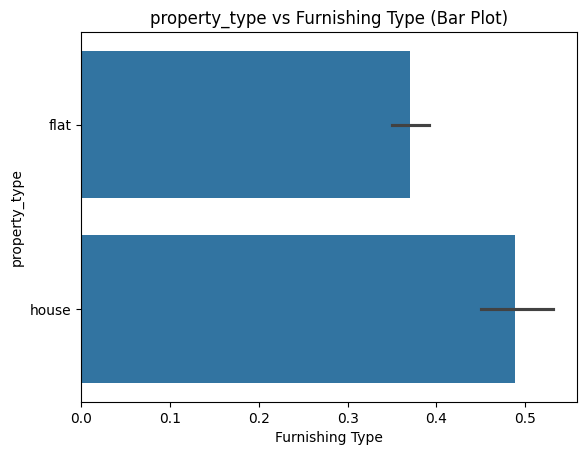

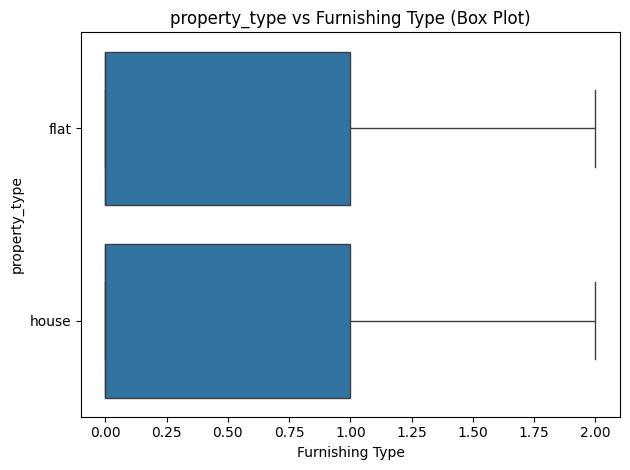

In [ ]:
# Bar plot
sns.barplot(data=df, x='furnishing_type', y='property_type')
plt.title('property_type vs Furnishing Type (Bar Plot)')
plt.xlabel('Furnishing Type')
plt.ylabel('property_type')
plt.show()

# Box Plot
sns.boxplot(data=df, x='furnishing_type', y='property_type')
plt.title('property_type vs Furnishing Type (Box Plot)')
plt.xlabel('Furnishing Type')
plt.ylabel('property_type')
plt.tight_layout()
plt.show()

# **Task-2: Handling of Missing Values**

# **Plotting missing values**

     property_type                              society      sector  price  \
0             flat              signature global park 4   sector 36   0.82   
1             flat                     smart world gems   sector 89   0.95   
2             flat                        pyramid elite   sector 86   0.46   
3             flat               breez global hill view  sohna road   0.32   
4             flat          bestech park view sanskruti   sector 92   1.60   
...            ...                                  ...         ...    ...   
3798          flat                       pivotal devaan   sector 84   0.37   
3799         house  international city by sobha phase 1  sector 109   6.00   
3800          flat           ansal api celebrity suites    sector 2   0.60   
3801         house                          independent   sector 43  15.50   
3802          flat                           m3m ikonic   sector 68   1.78   

      price_per_sqft     area  bedRoom  bathroom balcony  floor

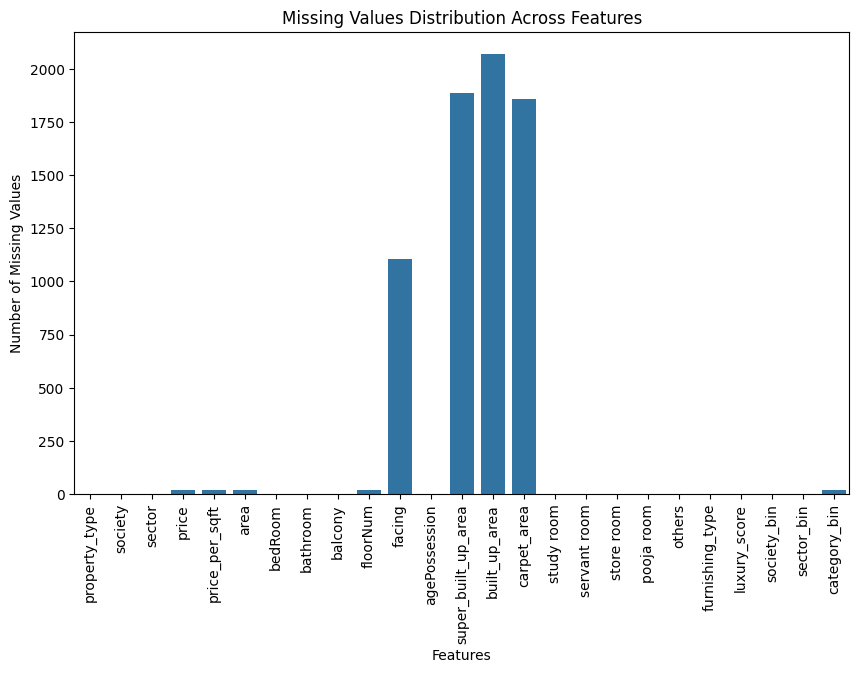

In [ ]:
print(df)
missing_values = df.isnull().sum()

# Visualize missing value distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_values.index, y=missing_values.values)
plt.xticks(rotation=90)
plt.title('Missing Values Distribution Across Features')
plt.xlabel('Features')
plt.ylabel('Number of Missing Values')
plt.show()

**We observed that missing values are only present in price,price_per_sqft,area,floorNum,facing,super_builtup,built up and carpet area**

### Dropping facing column: It is not an important feature for prediction so it can be dropped.


In [ ]:
df.drop('facing', axis=1, inplace=True)


In [ ]:
df.columns

Index(['property_type', 'society', 'sector', 'price', 'price_per_sqft', 'area',
       'bedRoom', 'bathroom', 'balcony', 'floorNum', 'agePossession',
       'super_built_up_area', 'built_up_area', 'carpet_area', 'study room',
       'servant room', 'store room', 'pooja room', 'others', 'furnishing_type',
       'luxury_score', 'society_bin', 'sector_bin', 'category_bin'],
      dtype='object')

In [ ]:
#printing no. of missing values
df.isnull().sum()


property_type             0
society                   1
sector                    0
price                    18
price_per_sqft           18
area                     18
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 19
agePossession             0
super_built_up_area    1888
built_up_area          2070
carpet_area            1859
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
society_bin               1
sector_bin                0
category_bin             18
dtype: int64

## Built up area Column(ratio)

**To handle the missing values of built up area we are taking the ratios of super_built_up_area and carpet_area**

In [ ]:
#storing all values present

all_df = df[~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))]



In [ ]:
all_df.shape

(534, 24)

In [ ]:
#calculating ratio
super_to_built_up_ratio = (all_df['super_built_up_area']/all_df['built_up_area']).median()

carpet_to_built_up_ratio = (all_df['carpet_area']/all_df['built_up_area']).median()
print(super_to_built_up_ratio)
print(carpet_to_built_up_ratio)

1.1048701298701298
0.900140056022409


In [ ]:
#1) super_built_up_area & carpet is present , built up  is null
compare1_df = df[~(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & ~(df['carpet_area'].isnull())]
print(compare1_df)



     property_type                  society      sector  price  \
0             flat  signature global park 4   sector 36   0.82   
5             flat           suncity avenue  sector 102   0.48   
42            flat             corona optus   sector 37   1.25   
44            flat               m3m merlin   sector 67   2.80   
49            flat      smart world orchard   sector 61   2.10   
...            ...                      ...         ...    ...   
3757          flat          shyam apartment    sector 3   0.26   
3772          flat  indiabulls centrum park  sector 103   1.15   
3789          flat               bptp terra  sector 37d   1.50   
3795          flat          eldeco accolade  sohna road   0.87   
3798          flat           pivotal devaan   sector 84   0.37   

      price_per_sqft    area  bedRoom  bathroom balcony  floorNum  ...  \
0             7585.0  1081.0        3         2       2       2.0  ...   
5             9022.0   532.0        2         2       1    

In [ ]:
# filling these values by using the ratio values of super_built_up_area & carpet_area

compare1_df['built_up_area'].fillna(round(((compare1_df['super_built_up_area']/1.105) + (compare1_df['carpet_area']/0.9))/2),inplace=True)

<ipython-input-202-7e68d8a798c9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  compare1_df['built_up_area'].fillna(round(((compare1_df['super_built_up_area']/1.105) + (compare1_df['carpet_area']/0.9))/2),inplace=True)


In [ ]:
# updating it to the dataframe

df.update(compare1_df)


In [ ]:
# checking for the missing values

df.isnull().sum()


property_type             0
society                   1
sector                    0
price                    18
price_per_sqft           18
area                     18
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 19
agePossession             0
super_built_up_area    1888
built_up_area          1642
carpet_area            1859
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
society_bin               1
sector_bin                0
category_bin             18
dtype: int64

In [ ]:
#2) super_built_up_area is present , but built_up_area & carpet_area is null
compare2_df = df[~(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull())]

compare2_df.head()

property_type                      society       sector  price  \
6           flat               paras quartier  gwal pahari   7.50   
7           flat       experion the heartsong   sector 108   2.00   
8           flat      adani m2k oyster grande   sector 102   1.90   
13          flat               ats tourmaline   sector 109   2.25   
16          flat  bestech park view sanskruti    sector 92   1.55   

    price_per_sqft    area  bedRoom  bathroom balcony  floorNum  ...  \
6          14018.0  5350.0        4         4      3+      20.0  ...   
7           8554.0  2338.0        3         3      3+      14.0  ...   
8           9105.0  2087.0        3         4       3       8.0  ...   
13          8704.0  2585.0        3         4       3      14.0  ...   
16          7568.0  2048.0        3         4       3      16.0  ...   

   study room  servant room  store room  pooja room  others  furnishing_type  \
6           0             1           0           1       1                1   
7           0             1           0           0       0                0   
8           0             1           0           0       0                0   
13          0             1           0           0       0                0   
16          0             1           0           0       0                1   

    luxury_score  society_bin  sector_bin  category_bin  
6             49          1.0           2           3.0  
7             95          2.0           2           4.0  
8            165          2.0           2           4.0  
13           101          2.0           2           4.0  
16            60          2.0           2           4.0  

[5 rows x 24 columns]

In [ ]:
# filling the values

compare2_df['built_up_area'].fillna(round(compare2_df['super_built_up_area']/1.105),inplace=True)

<ipython-input-206-2e8283040100>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  compare2_df['built_up_area'].fillna(round(compare2_df['super_built_up_area']/1.105),inplace=True)


In [ ]:
# updating to dataframe
df.update(compare2_df)

In [ ]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                    18
price_per_sqft           18
area                     18
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 19
agePossession             0
super_built_up_area    1888
built_up_area           739
carpet_area            1859
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
society_bin               1
sector_bin                0
category_bin             18
dtype: int64

In [ ]:
comp3_df = df[(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & ~(df['carpet_area'].isnull())]
#3) carpet_area is present , but built_up_area & super_built_up_area is null.

comp3_df.head()

property_type                           society     sector  price  \
1           flat                  smart world gems  sector 89   0.95   
2           flat                     pyramid elite  sector 86   0.46   
12          flat                  dlf regency park  sector 28   1.60   
14          flat  emaar mgf emerald floors premier  sector 65   2.77   
21          flat               afnhb jalvayu vihar  sector 30   0.85   

    price_per_sqft     area  bedRoom  bathroom balcony  floorNum  ...  \
1           8600.0   1105.0        2         2       2       4.0  ...   
2             79.0  58228.0        2         2       1       0.0  ...   
12         14545.0   1100.0        2         2       2       3.0  ...   
14         14025.0   1975.0        4         4      3+       3.0  ...   
21         12859.0    661.0        2         2       1       2.0  ...   

   study room  servant room  store room  pooja room  others  furnishing_type  \
1           1             1           0           0       0                0   
2           0             0           0           0       0                0   
12          0             0           0           0       0                0   
14          1             1           0           0       0                2   
21          0             0           0           0       1                1   

    luxury_score  society_bin  sector_bin  category_bin  
1             38          2.0           2           4.0  
2             15          1.0           2           3.0  
12            52          2.0           2           4.0  
14           174          2.0           2           1.0  
21            49          1.0           1           4.0  

[5 rows x 24 columns]

In [ ]:
comp3_df['built_up_area'].fillna(round(comp3_df['carpet_area']/0.9),inplace=True)

<ipython-input-210-3e2045cc4aa3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comp3_df['built_up_area'].fillna(round(comp3_df['carpet_area']/0.9),inplace=True)


In [ ]:
df.update(comp3_df)

In [ ]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                    18
price_per_sqft           18
area                     18
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 19
agePossession             0
super_built_up_area    1888
built_up_area             0
carpet_area            1859
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
society_bin               1
sector_bin                0
category_bin             18
dtype: int64

**After built up area missing values are handling we dropped super built up and carpet area columns as they do not hold as much significance anymore.**

In [ ]:
df.drop('super_built_up_area', axis=1, inplace=True)

In [ ]:
df.drop('carpet_area', axis=1, inplace=True)

# Handling Missing Values of Other Columns

In [ ]:
df.isnull().sum().sum()

93

datatype

In [ ]:
df.dtypes

property_type       object
society             object
sector              object
price              float64
price_per_sqft     float64
area               float64
bedRoom              int64
bathroom             int64
balcony             object
floorNum           float64
agePossession       object
built_up_area      float64
study room           int64
servant room         int64
store room           int64
pooja room           int64
others               int64
furnishing_type      int64
luxury_score         int64
society_bin        float64
sector_bin           int64
category_bin       float64
dtype: object

In [ ]:
df['property_type'].unique()

array(['flat', 'house'], dtype=object)

In [ ]:
df['society'].unique()[0:10]

array(['signature global park 4', 'smart world gems', 'pyramid elite',
       'breez global hill view', 'bestech park view sanskruti',
       'suncity avenue', 'paras quartier', 'experion the heartsong',
       'adani m2k oyster grande', 'independent'], dtype=object)

**Separating numerical data and categorical data set**


In [ ]:
num_data=df.select_dtypes(include=['float64', 'int64'])
cat_data = df.select_dtypes(include=['object'])

In [ ]:
num_data=df.select_dtypes(include=['float64', 'int64'])

In [ ]:
cat_data = df.select_dtypes(include=['object'])

# **Handling for price column**

In [ ]:
first_column=['price']

In [ ]:
df['bedRoom'].value_counts()

bedRoom
3     1545
2      993
4      676
5      213
1      130
6       75
9       41
8       30
12      28
7       28
10      20
16      12
13       4
18       2
19       2
11       1
20       1
14       1
21       1
Name: count, dtype: int64

**We handled the price column missing values by comparing them with bedroom column**

**Took means of price column depending on the number of bedrooms.**

In [ ]:
bedroom_prices = {}
for num_bedrooms in [1,2,3, 4, 5, 6,7,8, 9,10,11, 12,13,14,16]:
    bedroom_prices[num_bedrooms] = df[df['bedRoom'] == num_bedrooms]['price'].mean()

bedroom_prices

{1: 0.6856153846153846,
 2: 0.9180423814328961,
 3: 1.9376245954692557,
 4: 3.7425925925925925,
 5: 6.785198019801981,
 6: 6.8840540540540545,
 7: 5.664642857142858,
 8: 5.328666666666667,
 9: 6.3092500000000005,
 10: 4.6674999999999995,
 11: 2.25,
 12: 7.564074074074074,
 13: 5.275,
 14: 3.2,
 16: 14.62090909090909}

**We observed the rows in which the 18 missing price values are present and noted down the number of bedrooms for corresponding missing value. We then used the corresponding mean value of number of bedrooms to fill price missing values.**

In [ ]:
for num_bedrooms in [2, 4, 5, 6, 9, 12, 16]:
    mean_price = bedroom_prices.get(num_bedrooms, 0)  # Get the mean price for the current number of bedrooms or 0 if not found
    mean_price = round(mean_price, 2)  # Round mean_price to 2 decimal places
    df.loc[df['bedRoom'] == num_bedrooms, 'price'] = df.loc[df['bedRoom'] == num_bedrooms, 'price'].fillna(mean_price)

In [ ]:
df['price'].isna().sum()

0

Checking if the missing values were handled correctly.

In [ ]:
row_indices = [2013, 1974, 813]  # Specify the index of the rows you want to print
print(df.loc[row_indices, 'price'])

2013    6.79
1974    0.92
813     6.31
Name: price, dtype: float64


##Handling other numerical columns using knn imputation

**KNN checks the nearest neighbours and imputes the closest value in place of the missing values.**

In [ ]:
imputer = KNNImputer(n_neighbors=10)
impute_num_data = pd.DataFrame(imputer.fit_transform(num_data), columns=num_data.columns)

In [ ]:
impute_num_data.isnull().sum()

price              0
price_per_sqft     0
area               0
bedRoom            0
bathroom           0
floorNum           0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
society_bin        0
sector_bin         0
category_bin       0
dtype: int64

In [ ]:
impute_num_data

price  price_per_sqft     area  bedRoom  bathroom  floorNum  \
0      0.82          7585.0   1081.0      3.0       2.0       2.0   
1      0.95          8600.0   1105.0      2.0       2.0       4.0   
2      0.46            79.0  58228.0      2.0       2.0       0.0   
3      0.32          5470.0    585.0      2.0       2.0      17.0   
4      1.60          8020.0   1995.0      3.0       4.0      10.0   
...     ...             ...      ...      ...       ...       ...   
3798   0.37          6346.0    583.0      2.0       2.0       5.0   
3799   6.00          9634.0   6228.0      5.0       5.0       2.0   
3800   0.60          8163.0    735.0      1.0       1.0       5.0   
3801  15.50         28233.0   5490.0      5.0       6.0       3.0   
3802   1.78          9128.0   1950.0      3.0       3.0      27.0   

      built_up_area  study room  servant room  store room  pooja room  others  \
0             850.0         0.0           0.0         0.0         0.0     0.0   
1            1226.0         1.0           1.0         0.0         0.0     0.0   
2           64601.0         0.0           0.0         0.0         0.0     0.0   
3            1000.0         0.0           0.0         0.0         0.0     0.0   
4            1615.0         0.0           1.0         0.0         0.0     1.0   
...             ...         ...           ...         ...         ...     ...   
3798          532.0         0.0           0.0         0.0         0.0     0.0   
3799         6228.0         1.0           1.0         1.0         1.0     0.0   
3800          665.0         0.0           0.0         0.0         0.0     0.0   
3801         5490.0         1.0           1.0         1.0         1.0     0.0   
3802         1845.0         0.0           0.0         0.0         0.0     0.0   

      furnishing_type  luxury_score  society_bin  sector_bin  category_bin  
0                 0.0           8.0          2.0         2.0           4.0  
1                 0.0          38.0          2.0         2.0           4.0  
2                 0.0          15.0          1.0         2.0           3.0  
3                 0.0          49.0          2.0         2.0           4.0  
4                 1.0         174.0          2.0         2.0           4.0  
...               ...           ...          ...         ...           ...  
3798              0.0          73.0          2.0         2.0           4.0  
3799              0.0         160.0          2.0         2.0           4.0  
3800              1.0          67.0          1.0         2.0           4.0  
3801              0.0          76.0          2.0         2.0           2.0  
3802              1.0         126.0          1.0         2.0           4.0  

[3803 rows x 17 columns]

**Categorical data**

In [ ]:
cat_data

property_type                              society      sector balcony  \
0             flat              signature global park 4   sector 36       2   
1             flat                     smart world gems   sector 89       2   
2             flat                        pyramid elite   sector 86       1   
3             flat               breez global hill view  sohna road       1   
4             flat          bestech park view sanskruti   sector 92      3+   
...            ...                                  ...         ...     ...   
3798          flat                       pivotal devaan   sector 84       1   
3799         house  international city by sobha phase 1  sector 109      3+   
3800          flat           ansal api celebrity suites    sector 2       1   
3801         house                          independent   sector 43       3   
3802          flat                           m3m ikonic   sector 68      3+   

           agePossession  
0           New Property  
1           New Property  
2     Under Construction  
3           New Property  
4         Relatively New  
...                  ...  
3798      Relatively New  
3799      Relatively New  
3800      Moderately Old  
3801      Moderately Old  
3802      Relatively New  

[3803 rows x 5 columns]

## Handling for Categorical Data

**Only society column has missing value**

In [ ]:
cat_data.isnull().sum()

property_type    0
society          1
sector           0
balcony          0
agePossession    0
dtype: int64

**We used simpleimputer function to handle the missing values**

In [ ]:
categorical_imputer= SimpleImputer(missing_values=np.nan, strategy='most_frequent')

In [ ]:

impute_cat_data = pd.DataFrame(categorical_imputer.fit_transform(cat_data), columns=cat_data.columns)

In [ ]:
impute_cat_data.isnull().sum()

property_type    0
society          0
sector           0
balcony          0
agePossession    0
dtype: int64

# Concatenate both numerical and categorical data

In [ ]:
imputed_data= pd.concat([impute_num_data, impute_cat_data], axis=1)

In [ ]:
imputed_data

price  price_per_sqft     area  bedRoom  bathroom  floorNum  \
0      0.82          7585.0   1081.0      3.0       2.0       2.0   
1      0.95          8600.0   1105.0      2.0       2.0       4.0   
2      0.46            79.0  58228.0      2.0       2.0       0.0   
3      0.32          5470.0    585.0      2.0       2.0      17.0   
4      1.60          8020.0   1995.0      3.0       4.0      10.0   
...     ...             ...      ...      ...       ...       ...   
3798   0.37          6346.0    583.0      2.0       2.0       5.0   
3799   6.00          9634.0   6228.0      5.0       5.0       2.0   
3800   0.60          8163.0    735.0      1.0       1.0       5.0   
3801  15.50         28233.0   5490.0      5.0       6.0       3.0   
3802   1.78          9128.0   1950.0      3.0       3.0      27.0   

      built_up_area  study room  servant room  store room  ...  \
0             850.0         0.0           0.0         0.0  ...   
1            1226.0         1.0           1.0         0.0  ...   
2           64601.0         0.0           0.0         0.0  ...   
3            1000.0         0.0           0.0         0.0  ...   
4            1615.0         0.0           1.0         0.0  ...   
...             ...         ...           ...         ...  ...   
3798          532.0         0.0           0.0         0.0  ...   
3799         6228.0         1.0           1.0         1.0  ...   
3800          665.0         0.0           0.0         0.0  ...   
3801         5490.0         1.0           1.0         1.0  ...   
3802         1845.0         0.0           0.0         0.0  ...   

      furnishing_type  luxury_score  society_bin  sector_bin  category_bin  \
0                 0.0           8.0          2.0         2.0           4.0   
1                 0.0          38.0          2.0         2.0           4.0   
2                 0.0          15.0          1.0         2.0           3.0   
3                 0.0          49.0          2.0         2.0           4.0   
4                 1.0         174.0          2.0         2.0           4.0   
...               ...           ...          ...         ...           ...   
3798              0.0          73.0          2.0         2.0           4.0   
3799              0.0         160.0          2.0         2.0           4.0   
3800              1.0          67.0          1.0         2.0           4.0   
3801              0.0          76.0          2.0         2.0           2.0   
3802              1.0         126.0          1.0         2.0           4.0   

      property_type                              society      sector balcony  \
0              flat              signature global park 4   sector 36       2   
1              flat                     smart world gems   sector 89       2   
2              flat                        pyramid elite   sector 86       1   
3              flat               breez global hill view  sohna road       1   
4              flat          bestech park view sanskruti   sector 92      3+   
...             ...                                  ...         ...     ...   
3798           flat                       pivotal devaan   sector 84       1   
3799          house  international city by sobha phase 1  sector 109      3+   
3800           flat           ansal api celebrity suites    sector 2       1   
3801          house                          independent   sector 43       3   
3802           flat                           m3m ikonic   sector 68      3+   

           agePossession  
0           New Property  
1           New Property  
2     Under Construction  
3           New Property  
4         Relatively New  
...                  ...  
3798      Relatively New  
3799      Relatively New  
3800      Moderately Old  
3801      Moderately Old  
3802      Relatively New  

[3803 rows x 22 columns]

**All the missing values are handled**

In [ ]:
imputed_data.isnull().sum()

price              0
price_per_sqft     0
area               0
bedRoom            0
bathroom           0
floorNum           0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
society_bin        0
sector_bin         0
category_bin       0
property_type      0
society            0
sector             0
balcony            0
agePossession      0
dtype: int64

In [ ]:
df.update(imputed_data)

# **TASK 3: OUTLIER DETECTION AND HANDLING**

## 1.price

In [ ]:
print(df)

     property_type                              society      sector  price  \
0             flat              signature global park 4   sector 36   0.82   
1             flat                     smart world gems   sector 89   0.95   
2             flat                        pyramid elite   sector 86   0.46   
3             flat               breez global hill view  sohna road   0.32   
4             flat          bestech park view sanskruti   sector 92   1.60   
...            ...                                  ...         ...    ...   
3798          flat                       pivotal devaan   sector 84   0.37   
3799         house  international city by sobha phase 1  sector 109   6.00   
3800          flat           ansal api celebrity suites    sector 2   0.60   
3801         house                          independent   sector 43  15.50   
3802          flat                           m3m ikonic   sector 68   1.78   

      price_per_sqft     area  bedRoom  bathroom balcony  floor

*Using IQR for detection of outliers*

In [ ]:
#detecting outliers
# Calculate the IQR for the 'price' column
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]

# Displaying the number of outliers and some statistics
num_outlier = outliers.shape[0]
outliers_price = outliers['price'].describe()

num_outlier,outliers_price

(435,
 count    435.000000
 mean       9.208736
 std        4.040241
 min        5.460000
 25%        6.440000
 50%        8.000000
 75%       10.555000
 max       31.500000
 Name: price, dtype: float64)

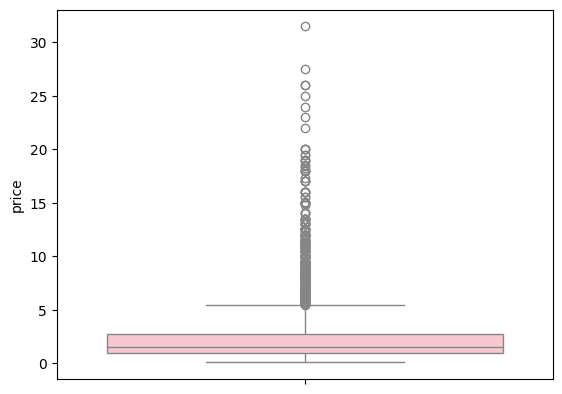

In [ ]:
sns.boxplot(df['price'], color='pink')
plt.show()


In [ ]:
def handle_outliers(df, cols):
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[col] = np.where((df[col] < lower_bound) | (df[col] > upper_bound), df[col].median(), df[col])
    return df

In [ ]:
df = handle_outliers(df, ['price'])

**The outliers still observed on the box plot even after handling them are either individual houses or villas as we did not remove them from our dataset.**

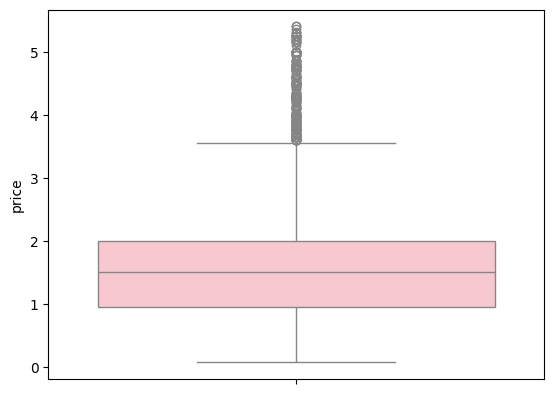

In [ ]:
sns.boxplot(df['price'], color='pink')
plt.show()

In [ ]:
# Calculate the IQR for the 'price' column
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]

# Displaying the number of outliers and some statistics
num_outlier = outliers.shape[0]
outliers_price = outliers['price'].describe()

num_outlier,outliers_price

(254,
 count    254.000000
 mean       4.368224
 std        0.504386
 min        3.600000
 25%        3.950000
 50%        4.300000
 75%        4.750000
 max        5.400000
 Name: price, dtype: float64)

## 2.Price_per_sqft

In [ ]:
df["price_per_sqft"].head()

0    7585.0
1    8600.0
2      79.0
3    5470.0
4    8020.0
Name: price_per_sqft, dtype: float64

In [ ]:
Q1 = df['price_per_sqft'].quantile(0.25)
Q3 = df['price_per_sqft'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


outliers = df[(df['price_per_sqft'] < lower_bound) | (df['price_per_sqft'] > upper_bound)]


num_outlier = outliers.shape[0]
outliers_price_per_sqft = outliers['price_per_sqft'].describe()

num_outlier,outliers_price_per_sqft

(363,
 count       363.000000
 mean      53085.861708
 std       61048.018257
 min       24390.000000
 25%       28216.500000
 50%       33665.000000
 75%       42208.000000
 max      600000.000000
 Name: price_per_sqft, dtype: float64)

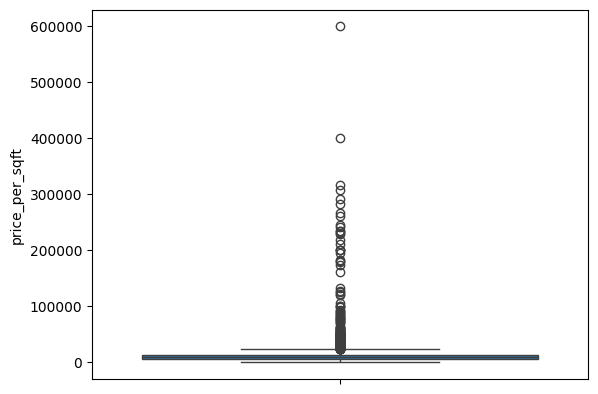

In [ ]:
sns.boxplot(df['price_per_sqft'])
plt.show()

In [ ]:
def handle_outliers(df, cols):
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[col] = np.where((df[col] < lower_bound) | (df[col] > upper_bound), df[col].median(), df[col])
    return df

In [ ]:
df = handle_outliers(df, ['price_per_sqft'])

In [ ]:
print(df)

     property_type                              society      sector  price  \
0             flat              signature global park 4   sector 36   0.82   
1             flat                     smart world gems   sector 89   0.95   
2             flat                        pyramid elite   sector 86   0.46   
3             flat               breez global hill view  sohna road   0.32   
4             flat          bestech park view sanskruti   sector 92   1.60   
...            ...                                  ...         ...    ...   
3798          flat                       pivotal devaan   sector 84   0.37   
3799         house  international city by sobha phase 1  sector 109   1.50   
3800          flat           ansal api celebrity suites    sector 2   0.60   
3801         house                          independent   sector 43   1.50   
3802          flat                           m3m ikonic   sector 68   1.78   

      price_per_sqft     area  bedRoom  bathroom balcony  floor

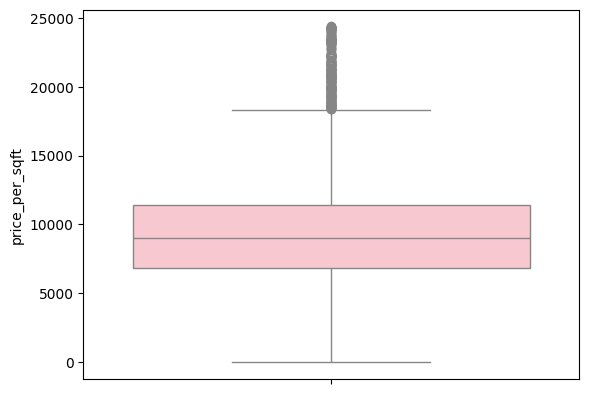

In [ ]:
sns.boxplot(df['price_per_sqft'], color='pink')
plt.show()

In [ ]:
Q1 = df['price_per_sqft'].quantile(0.25)
Q3 = df['price_per_sqft'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


outliers = df[(df['price_per_sqft'] < lower_bound) | (df['price_per_sqft'] > upper_bound)]


num_outlier = outliers.shape[0]
outliers_price_per_sqft = outliers['price_per_sqft'].describe()

num_outlier,outliers_price_per_sqft

(200,
 count      200.00000
 mean     21187.90000
 std       1771.26043
 min      18392.00000
 25%      19751.50000
 50%      21006.50000
 75%      22480.25000
 max      24366.00000
 Name: price_per_sqft, dtype: float64)

## 3.**Area**

In [ ]:
df["area"].head()

0     1081.0
1     1105.0
2    58228.0
3      585.0
4     1995.0
Name: area, dtype: float64

In [ ]:
Q1 = df['area'].quantile(0.25)
Q3 = df['area'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


outliers = df[(df['area'] < lower_bound) | (df['area'] > upper_bound)]


num_outlier = outliers.shape[0]
outliers_area = outliers['area'].describe()

num_outlier,outliers_area


(223,
 count       223.000000
 mean      21403.391928
 std       92038.105531
 min        3950.000000
 25%        4500.000000
 50%        4950.000000
 75%        6500.000000
 max      875000.000000
 Name: area, dtype: float64)

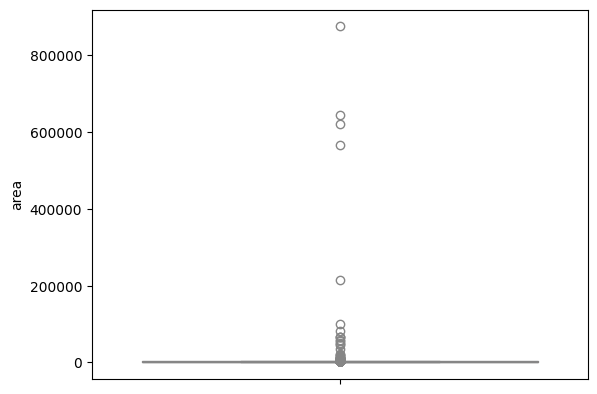

In [ ]:
sns.boxplot(df['area'], color='pink')
plt.show()

In [ ]:
def handle_outliers(df, cols):
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[col] = np.where((df[col] < lower_bound) | (df[col] > upper_bound), df[col].median(), df[col])
    return df

In [ ]:
df = handle_outliers(df, ['area'])

In [ ]:
print(df)

     property_type                              society      sector  price  \
0             flat              signature global park 4   sector 36   0.82   
1             flat                     smart world gems   sector 89   0.95   
2             flat                        pyramid elite   sector 86   0.46   
3             flat               breez global hill view  sohna road   0.32   
4             flat          bestech park view sanskruti   sector 92   1.60   
...            ...                                  ...         ...    ...   
3798          flat                       pivotal devaan   sector 84   0.37   
3799         house  international city by sobha phase 1  sector 109   1.50   
3800          flat           ansal api celebrity suites    sector 2   0.60   
3801         house                          independent   sector 43   1.50   
3802          flat                           m3m ikonic   sector 68   1.78   

      price_per_sqft    area  bedRoom  bathroom balcony  floorN

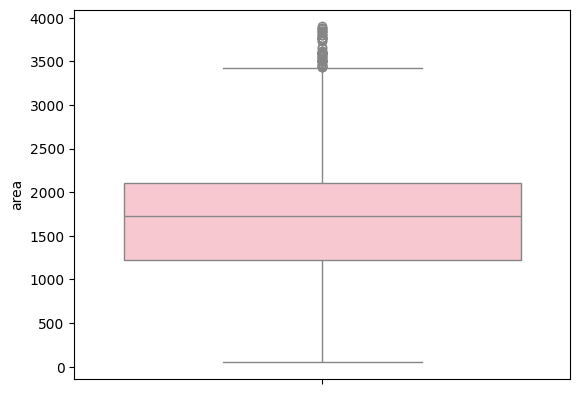

In [ ]:
sns.boxplot(df['area'], color='pink')
plt.show()

In [ ]:
Q1 = df['area'].quantile(0.25)
Q3 = df['area'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


outliers = df[(df['area'] < lower_bound) | (df['area'] > upper_bound)]


num_outlier = outliers.shape[0]
outliers_area = outliers['area'].describe()

num_outlier,outliers_area

(60,
 count      60.000000
 mean     3641.683333
 std       142.090266
 min      3434.000000
 25%      3507.750000
 50%      3600.000000
 75%      3763.250000
 max      3900.000000
 Name: area, dtype: float64)

## 4.**bedRoom**

In [ ]:
df["bedRoom"].head()

0    3
1    2
2    2
3    2
4    3
Name: bedRoom, dtype: int64

In [ ]:
Q1 = df['bedRoom'].quantile(0.25)
Q3 = df['bedRoom'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


outliers = df[(df['bedRoom'] < lower_bound) | (df['bedRoom'] > upper_bound)]


num_outlier = outliers.shape[0]
outliers_bedRoom = outliers['bedRoom'].describe()

num_outlier,outliers_bedRoom


(143,
 count    143.000000
 mean      10.692308
 std        2.907568
 min        8.000000
 25%        9.000000
 50%       10.000000
 75%       12.000000
 max       21.000000
 Name: bedRoom, dtype: float64)

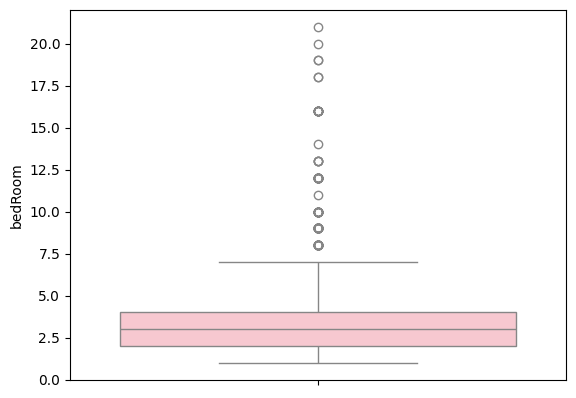

In [ ]:
sns.boxplot(df['bedRoom'], color='pink')
plt.show()

In [ ]:
def handle_outliers(df, cols):
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[col] = np.where((df[col] < lower_bound) | (df[col] > upper_bound), df[col].median(), df[col])
    return df

In [ ]:
df = handle_outliers(df, ['bedRoom'])

**All the outliers in bedroom column were handled**

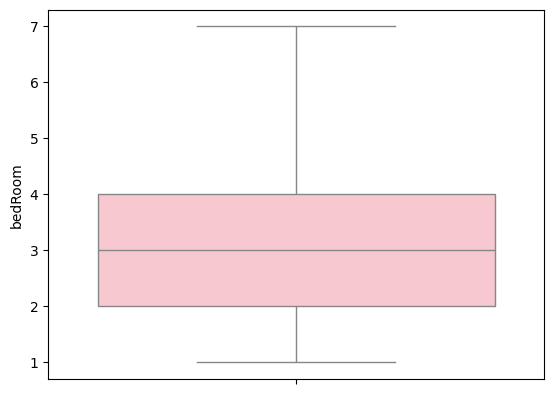

In [ ]:
sns.boxplot(df['bedRoom'], color='pink')
plt.show()

In [ ]:
Q1 = df['bedRoom'].quantile(0.25)
Q3 = df['bedRoom'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


outliers = df[(df['bedRoom'] < lower_bound) | (df['bedRoom'] > upper_bound)]


num_outlier = outliers.shape[0]
outliers_price = outliers['bedRoom'].describe()

num_outlier,outliers_price


(0,
 count    0.0
 mean     NaN
 std      NaN
 min      NaN
 25%      NaN
 50%      NaN
 75%      NaN
 max      NaN
 Name: bedRoom, dtype: float64)

## **5.bathroom**

In [ ]:
df["bathroom"].head()

0    2
1    2
2    2
3    2
4    4
Name: bathroom, dtype: int64

In [ ]:
Q1 = df['bathroom'].quantile(0.25)
Q3 = df['bathroom'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


outliers = df[(df['bathroom'] < lower_bound) | (df['bathroom'] > upper_bound)]


num_outlier = outliers.shape[0]
outliers_bathroom = outliers['bathroom'].describe()

num_outlier,outliers_bathroom

(127,
 count    127.000000
 mean      10.921260
 std        3.223442
 min        8.000000
 25%        9.000000
 50%        9.000000
 75%       12.000000
 max       21.000000
 Name: bathroom, dtype: float64)

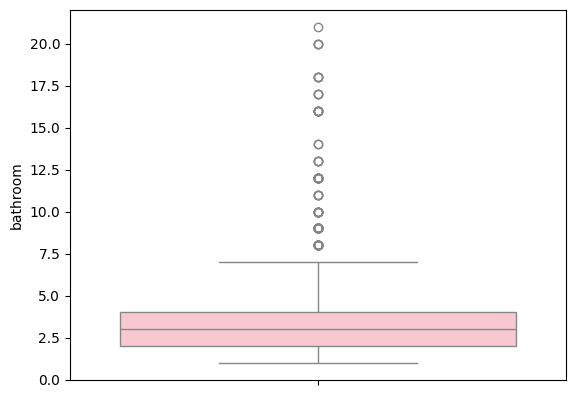

In [ ]:
sns.boxplot(df['bathroom'], color='pink')
plt.show()

In [ ]:
def handle_outliers(df, cols):
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[col] = np.where((df[col] < lower_bound) | (df[col] > upper_bound), df[col].median(), df[col])
    return df

In [ ]:
df = handle_outliers(df, ['bathroom'])

**All outliers in bathroom column were handled**

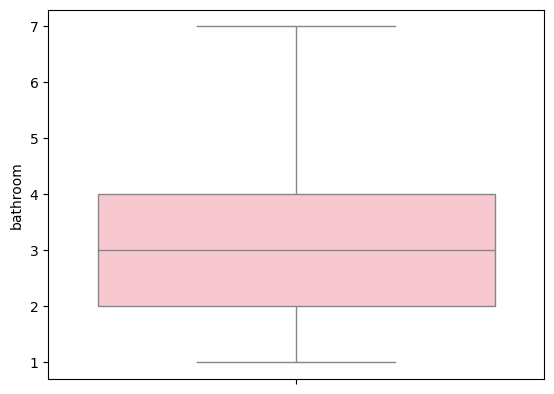

In [ ]:
sns.boxplot(df['bathroom'], color='pink')
plt.show()

In [ ]:
Q1 = df['bathroom'].quantile(0.25)
Q3 = df['bathroom'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


outliers = df[(df['bathroom'] < lower_bound) | (df['bathroom'] > upper_bound)]


num_outlier = outliers.shape[0]
outliers_price = outliers['bathroom'].describe()

num_outlier,outliers_price

(0,
 count    0.0
 mean     NaN
 std      NaN
 min      NaN
 25%      NaN
 50%      NaN
 75%      NaN
 max      NaN
 Name: bathroom, dtype: float64)

## **6.floorNum**

In [ ]:
df["floorNum"].head()

0     2.0
1     4.0
2     0.0
3    17.0
4    10.0
Name: floorNum, dtype: float64

In [ ]:
# Calculate the IQR for the 'price' column
Q1 = df['floorNum'].quantile(0.25)
Q3 = df['floorNum'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['floorNum'] < lower_bound) | (df['floorNum'] > upper_bound)]

# Displaying the number of outliers and some statistics
num_outlier = outliers.shape[0]
outliers_price = outliers['floorNum'].describe()

num_outlier,outliers_price


(84,
 count    84.000000
 mean     28.678571
 std       6.147114
 min      23.000000
 25%      24.000000
 50%      27.000000
 75%      31.000000
 max      51.000000
 Name: floorNum, dtype: float64)

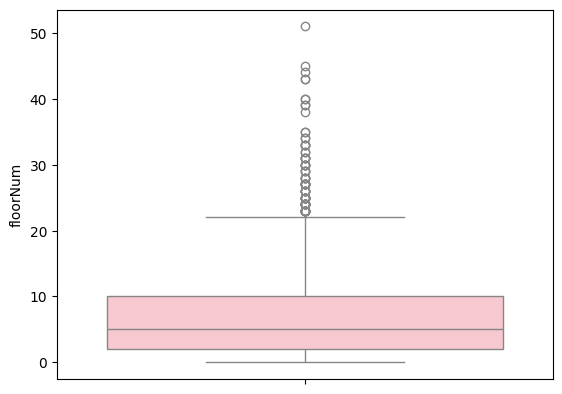

In [ ]:
sns.boxplot(df['floorNum'],color='pink')
plt.show()

In [ ]:
def handle_outliers(df, cols):
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[col] = np.where((df[col] < lower_bound) | (df[col] > upper_bound), df[col].median(), df[col])
    return df

In [ ]:
df = handle_outliers(df, ['floorNum'])

In [ ]:
print(df)

     property_type                              society      sector  price  \
0             flat              signature global park 4   sector 36   0.82   
1             flat                     smart world gems   sector 89   0.95   
2             flat                        pyramid elite   sector 86   0.46   
3             flat               breez global hill view  sohna road   0.32   
4             flat          bestech park view sanskruti   sector 92   1.60   
...            ...                                  ...         ...    ...   
3798          flat                       pivotal devaan   sector 84   0.37   
3799         house  international city by sobha phase 1  sector 109   1.50   
3800          flat           ansal api celebrity suites    sector 2   0.60   
3801         house                          independent   sector 43   1.50   
3802          flat                           m3m ikonic   sector 68   1.78   

      price_per_sqft    area  bedRoom  bathroom balcony  floorN

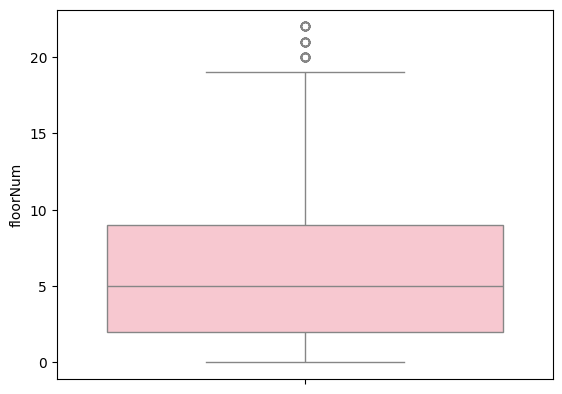

In [ ]:
sns.boxplot(df['floorNum'],color='pink')
plt.show()

In [ ]:
# Calculate the IQR for the 'price' column
Q1 = df['floorNum'].quantile(0.25)
Q3 = df['floorNum'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['floorNum'] < lower_bound) | (df['floorNum'] > upper_bound)]

# Displaying the number of outliers and some statistics
num_outlier = outliers.shape[0]
outliers_price = outliers['floorNum'].describe()

num_outlier,outliers_price


(56,
 count    56.000000
 mean     20.785714
 std       0.824936
 min      20.000000
 25%      20.000000
 50%      21.000000
 75%      21.250000
 max      22.000000
 Name: floorNum, dtype: float64)

## 7.**built_up_area**

In [ ]:
df["built_up_area"].head()

0      850.0
1     1226.0
2    64601.0
3     1000.0
4     1615.0
Name: built_up_area, dtype: float64

In [ ]:
Q1 = df['built_up_area'].quantile(0.25)
Q3 = df['built_up_area'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


outliers = df[(df['built_up_area'] < lower_bound) | (df['built_up_area'] > upper_bound)]


num_outlier = outliers.shape[0]
outliers_price = outliers['built_up_area'].describe()

num_outlier,outliers_price


(229,
 count       229.000000
 mean      18433.341616
 std       85870.199930
 min        3653.000000
 25%        4254.000000
 50%        4842.000000
 75%        6350.000000
 max      737147.000000
 Name: built_up_area, dtype: float64)

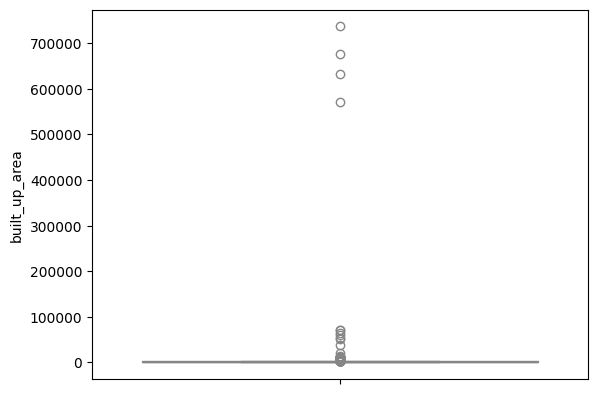

In [ ]:
sns.boxplot(df['built_up_area'],color='pink')
plt.show()

In [ ]:
def handle_outliers(df, cols):
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[col] = np.where((df[col] < lower_bound) | (df[col] > upper_bound), df[col].median(), df[col])
    return df

In [ ]:
df = handle_outliers(df, ['built_up_area'])

In [ ]:
print(df)

     property_type                              society      sector  price  \
0             flat              signature global park 4   sector 36   0.82   
1             flat                     smart world gems   sector 89   0.95   
2             flat                        pyramid elite   sector 86   0.46   
3             flat               breez global hill view  sohna road   0.32   
4             flat          bestech park view sanskruti   sector 92   1.60   
...            ...                                  ...         ...    ...   
3798          flat                       pivotal devaan   sector 84   0.37   
3799         house  international city by sobha phase 1  sector 109   1.50   
3800          flat           ansal api celebrity suites    sector 2   0.60   
3801         house                          independent   sector 43   1.50   
3802          flat                           m3m ikonic   sector 68   1.78   

      price_per_sqft    area  bedRoom  bathroom balcony  floorN

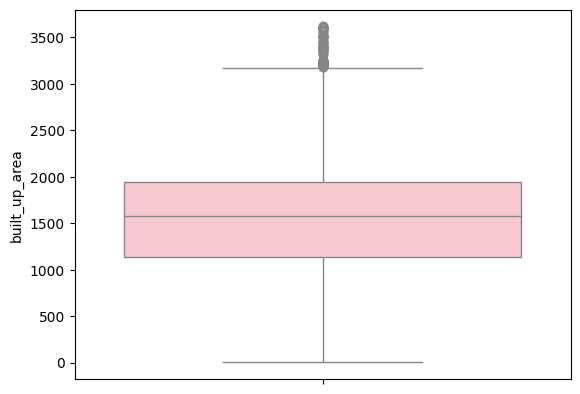

In [ ]:
sns.boxplot(df['built_up_area'],color='pink')
plt.show()

In [ ]:
Q1 = df['built_up_area'].quantile(0.25)
Q3 = df['built_up_area'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


outliers = df[(df['built_up_area'] < lower_bound) | (df['built_up_area'] > upper_bound)]


num_outlier = outliers.shape[0]
outliers_price = outliers['built_up_area'].describe()

num_outlier,outliers_price


(116,
 count     116.000000
 mean     3350.304569
 std       144.057462
 min      3178.000000
 25%      3240.000000
 50%      3247.000000
 75%      3500.000000
 max      3618.000000
 Name: built_up_area, dtype: float64)

## 8.study **room**

In [ ]:
df["study room"].head()

0    0
1    1
2    0
3    0
4    0
Name: study room, dtype: int64

In [ ]:
Q1 = df['study room'].quantile(0.25)
Q3 = df['study room'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


outliers = df[(df['study room'] < lower_bound) | (df['study room'] > upper_bound)]


num_outlier = outliers.shape[0]
outliers_price = outliers['study room'].describe()

num_outlier,outliers_price




(721,
 count    721.0
 mean       1.0
 std        0.0
 min        1.0
 25%        1.0
 50%        1.0
 75%        1.0
 max        1.0
 Name: study room, dtype: float64)

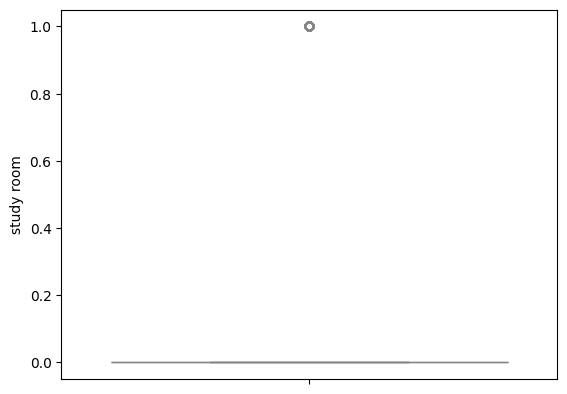

In [ ]:
sns.boxplot(df['study room'],color='pink')
plt.show()

In [ ]:
def handle_outliers(df, cols):
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[col] = np.where((df[col] < lower_bound) | (df[col] > upper_bound), df[col].median(), df[col])
    return df

In [ ]:
df= handle_outliers(df, ['study room'])

In [ ]:
print(df)

     property_type                              society      sector  price  \
0             flat              signature global park 4   sector 36   0.82   
1             flat                     smart world gems   sector 89   0.95   
2             flat                        pyramid elite   sector 86   0.46   
3             flat               breez global hill view  sohna road   0.32   
4             flat          bestech park view sanskruti   sector 92   1.60   
...            ...                                  ...         ...    ...   
3798          flat                       pivotal devaan   sector 84   0.37   
3799         house  international city by sobha phase 1  sector 109   1.50   
3800          flat           ansal api celebrity suites    sector 2   0.60   
3801         house                          independent   sector 43   1.50   
3802          flat                           m3m ikonic   sector 68   1.78   

      price_per_sqft    area  bedRoom  bathroom balcony  floorN

**All outliers in study room column were handled**

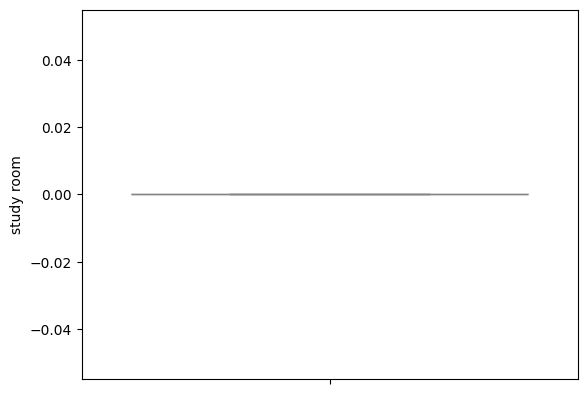

In [ ]:
sns.boxplot(df['study room'],color='pink')
plt.show()

In [ ]:
Q1 = df['study room'].quantile(0.25)
Q3 = df['study room'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


outliers = df[(df['study room'] < lower_bound) | (df['study room'] > upper_bound)]


num_outlier = outliers.shape[0]
outliers_price = outliers['study room'].describe()

num_outlier,outliers_price




(0,
 count    0.0
 mean     NaN
 std      NaN
 min      NaN
 25%      NaN
 50%      NaN
 75%      NaN
 max      NaN
 Name: study room, dtype: float64)

## 9.servant room

In [ ]:
df['servant room'].head()

0    0
1    1
2    0
3    0
4    1
Name: servant room, dtype: int64

In [ ]:
Q1 = df['servant room'].quantile(0.25)
Q3 = df['servant room'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


outliers = df[(df['servant room'] < lower_bound) | (df['servant room'] > upper_bound)]


num_outlier = outliers.shape[0]
outliers_price = outliers['servant room'].describe()

num_outlier,outliers_price

(0,
 count    0.0
 mean     NaN
 std      NaN
 min      NaN
 25%      NaN
 50%      NaN
 75%      NaN
 max      NaN
 Name: servant room, dtype: float64)

**No outliers in servant room**

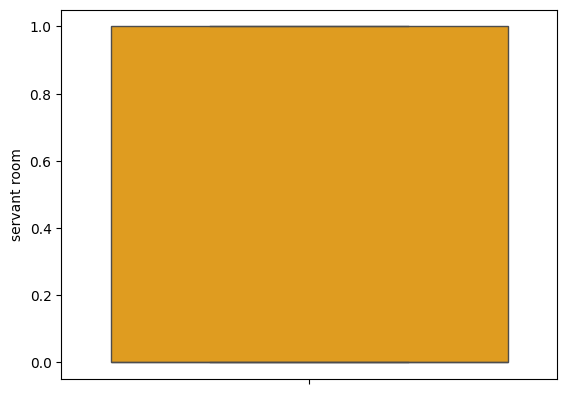

In [ ]:
sns.boxplot(df['servant room'],color='orange')
plt.show()

## 10.store room

In [ ]:
df['store room'].head()

0    0
1    0
2    0
3    0
4    0
Name: store room, dtype: int64

In [ ]:
Q1 = df['store room'].quantile(0.25)
Q3 = df['store room'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


outliers = df[(df['store room'] < lower_bound) | (df['store room'] > upper_bound)]


num_outlier = outliers.shape[0]
outliers_price = outliers['store room'].describe()

num_outlier,outliers_price

(344,
 count    344.0
 mean       1.0
 std        0.0
 min        1.0
 25%        1.0
 50%        1.0
 75%        1.0
 max        1.0
 Name: store room, dtype: float64)

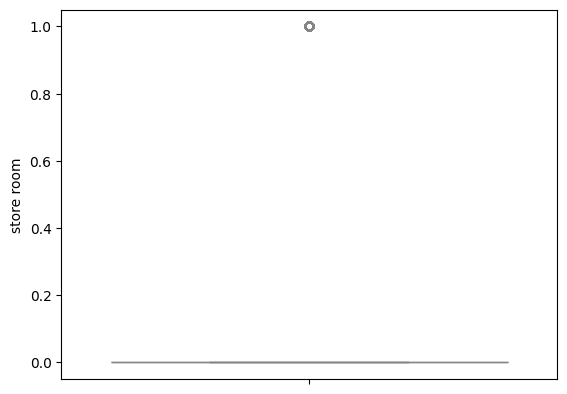

In [ ]:
sns.boxplot(df['store room'],color='pink')
plt.show()

In [ ]:
def handle_outliers(df, cols):
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[col] = np.where((df[col] < lower_bound) | (df[col] > upper_bound), df[col].median(), df[col])
    return df

In [ ]:
df= handle_outliers(df, ['store room'])

In [ ]:
print(df)

     property_type                              society      sector  price  \
0             flat              signature global park 4   sector 36   0.82   
1             flat                     smart world gems   sector 89   0.95   
2             flat                        pyramid elite   sector 86   0.46   
3             flat               breez global hill view  sohna road   0.32   
4             flat          bestech park view sanskruti   sector 92   1.60   
...            ...                                  ...         ...    ...   
3798          flat                       pivotal devaan   sector 84   0.37   
3799         house  international city by sobha phase 1  sector 109   1.50   
3800          flat           ansal api celebrity suites    sector 2   0.60   
3801         house                          independent   sector 43   1.50   
3802          flat                           m3m ikonic   sector 68   1.78   

      price_per_sqft    area  bedRoom  bathroom balcony  floorN

**All outliers in store room column were handled**

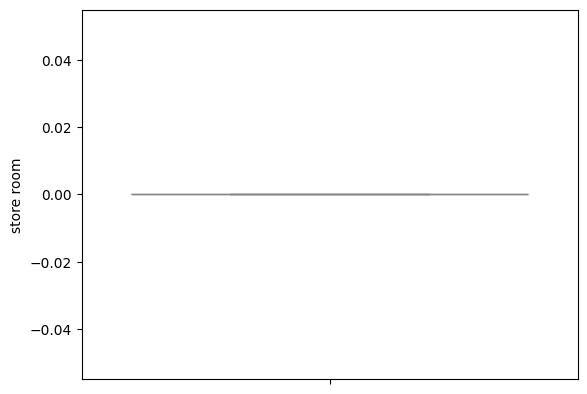

In [ ]:
sns.boxplot(df['store room'],color='pink')
plt.show()

In [ ]:
Q1 = df['store room'].quantile(0.25)
Q3 = df['store room'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


outliers = df[(df['store room'] < lower_bound) | (df['store room'] > upper_bound)]


num_outlier = outliers.shape[0]
outliers_price = outliers['store room'].describe()

num_outlier,outliers_price

(0,
 count    0.0
 mean     NaN
 std      NaN
 min      NaN
 25%      NaN
 50%      NaN
 75%      NaN
 max      NaN
 Name: store room, dtype: float64)

## 11.pooja room

In [ ]:
df['pooja room'].head()

0    0
1    0
2    0
3    0
4    0
Name: pooja room, dtype: int64

In [ ]:
Q1 = df['pooja room'].quantile(0.25)
Q3 = df['pooja room'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


outliers = df[(df['pooja room'] < lower_bound) | (df['pooja room'] > upper_bound)]


num_outlier = outliers.shape[0]
outliers_price = outliers['pooja room'].describe()

num_outlier,outliers_price

(663,
 count    663.0
 mean       1.0
 std        0.0
 min        1.0
 25%        1.0
 50%        1.0
 75%        1.0
 max        1.0
 Name: pooja room, dtype: float64)

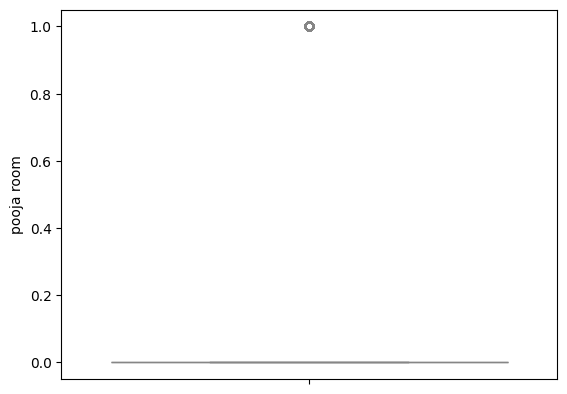

In [ ]:
sns.boxplot(df['pooja room'],color='pink')
plt.show()

In [ ]:
def handle_outliers(df, cols):
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[col] = np.where((df[col] < lower_bound) | (df[col] > upper_bound), df[col].median(), df[col])
    return df

In [ ]:
df= handle_outliers(df, ['pooja room'])

In [ ]:
print(df)

     property_type                              society      sector  price  \
0             flat              signature global park 4   sector 36   0.82   
1             flat                     smart world gems   sector 89   0.95   
2             flat                        pyramid elite   sector 86   0.46   
3             flat               breez global hill view  sohna road   0.32   
4             flat          bestech park view sanskruti   sector 92   1.60   
...            ...                                  ...         ...    ...   
3798          flat                       pivotal devaan   sector 84   0.37   
3799         house  international city by sobha phase 1  sector 109   1.50   
3800          flat           ansal api celebrity suites    sector 2   0.60   
3801         house                          independent   sector 43   1.50   
3802          flat                           m3m ikonic   sector 68   1.78   

      price_per_sqft    area  bedRoom  bathroom balcony  floorN

**All outliers in pooja room column were handled**

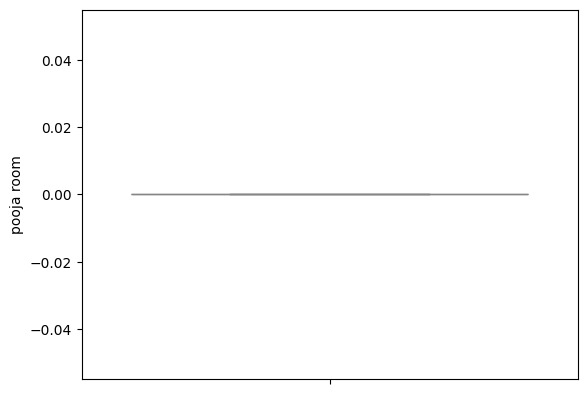

In [ ]:
sns.boxplot(df['pooja room'],color='pink')
plt.show()

In [ ]:
Q1 = df['pooja room'].quantile(0.25)
Q3 = df['pooja room'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


outliers = df[(df['pooja room'] < lower_bound) | (df['pooja room'] > upper_bound)]


num_outlier = outliers.shape[0]
outliers_price = outliers['pooja room'].describe()

num_outlier,outliers_price

(0,
 count    0.0
 mean     NaN
 std      NaN
 min      NaN
 25%      NaN
 50%      NaN
 75%      NaN
 max      NaN
 Name: pooja room, dtype: float64)

## 12.others

In [ ]:
df['others'].head()

0    0
1    0
2    0
3    0
4    1
Name: others, dtype: int64

In [ ]:
Q1 = df['others'].quantile(0.25)
Q3 = df['others'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


outliers = df[(df['others'] < lower_bound) | (df['others'] > upper_bound)]


num_outlier = outliers.shape[0]
outliers_price = outliers['others'].describe()

num_outlier,outliers_price

(421,
 count    421.0
 mean       1.0
 std        0.0
 min        1.0
 25%        1.0
 50%        1.0
 75%        1.0
 max        1.0
 Name: others, dtype: float64)

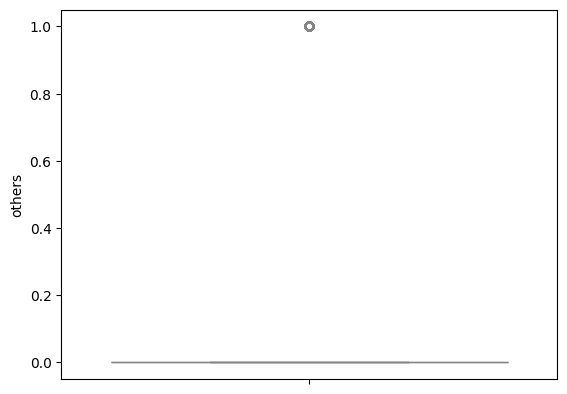

In [ ]:
sns.boxplot(df['others'],color='pink')
plt.show()

In [ ]:
def handle_outliers(df, cols):
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[col] = np.where((df[col] < lower_bound) | (df[col] > upper_bound), df[col].median(), df[col])
    return df

In [ ]:
df= handle_outliers(df, ['others'])

In [ ]:
print(df)

     property_type                              society      sector  price  \
0             flat              signature global park 4   sector 36   0.82   
1             flat                     smart world gems   sector 89   0.95   
2             flat                        pyramid elite   sector 86   0.46   
3             flat               breez global hill view  sohna road   0.32   
4             flat          bestech park view sanskruti   sector 92   1.60   
...            ...                                  ...         ...    ...   
3798          flat                       pivotal devaan   sector 84   0.37   
3799         house  international city by sobha phase 1  sector 109   1.50   
3800          flat           ansal api celebrity suites    sector 2   0.60   
3801         house                          independent   sector 43   1.50   
3802          flat                           m3m ikonic   sector 68   1.78   

      price_per_sqft    area  bedRoom  bathroom balcony  floorN

**All outliers in others column were handled**

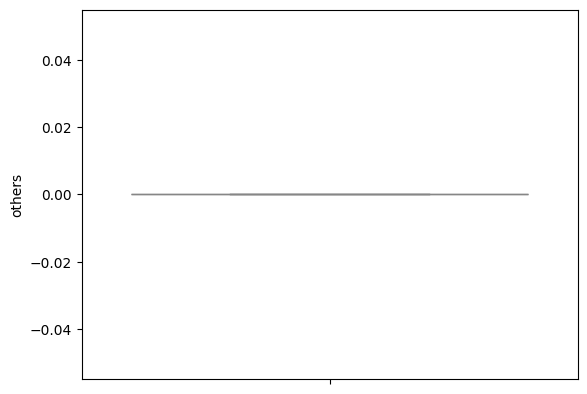

In [ ]:
sns.boxplot(df['others'],color='pink')
plt.show()

In [ ]:
Q1 = df['others'].quantile(0.25)
Q3 = df['others'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


outliers = df[(df['others'] < lower_bound) | (df['others'] > upper_bound)]


num_outlier = outliers.shape[0]
outliers_price = outliers['others'].describe()

num_outlier,outliers_price

(0,
 count    0.0
 mean     NaN
 std      NaN
 min      NaN
 25%      NaN
 50%      NaN
 75%      NaN
 max      NaN
 Name: others, dtype: float64)

## 13.furnishing type

In [ ]:
df['furnishing_type'].head()

0    0
1    0
2    0
3    0
4    1
Name: furnishing_type, dtype: int64

In [ ]:
Q1 = df['furnishing_type'].quantile(0.25)
Q3 = df['furnishing_type'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


outliers = df[(df['furnishing_type'] < lower_bound) | (df['furnishing_type'] > upper_bound)]


num_outlier = outliers.shape[0]
outliers_price = outliers['furnishing_type'].describe()

num_outlier,outliers_price

(0,
 count    0.0
 mean     NaN
 std      NaN
 min      NaN
 25%      NaN
 50%      NaN
 75%      NaN
 max      NaN
 Name: furnishing_type, dtype: float64)

**No outliers were detected in furnishing type**

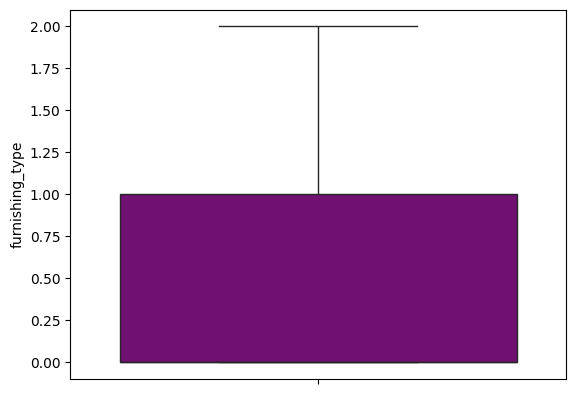

In [ ]:
sns.boxplot(df['furnishing_type'], color='purple')
plt.show()

## 14.luxury score

In [ ]:
df['luxury_score'].head()

0      8
1     38
2     15
3     49
4    174
Name: luxury_score, dtype: int64

In [ ]:
Q1 = df['luxury_score'].quantile(0.25)
Q3 = df['luxury_score'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


outliers = df[(df['luxury_score'] < lower_bound) | (df['luxury_score'] > upper_bound)]


num_outlier = outliers.shape[0]
outliers_price = outliers['luxury_score'].describe()

num_outlier,outliers_price

(0,
 count    0.0
 mean     NaN
 std      NaN
 min      NaN
 25%      NaN
 50%      NaN
 75%      NaN
 max      NaN
 Name: luxury_score, dtype: float64)

**No outliers were detected in luxury score column**

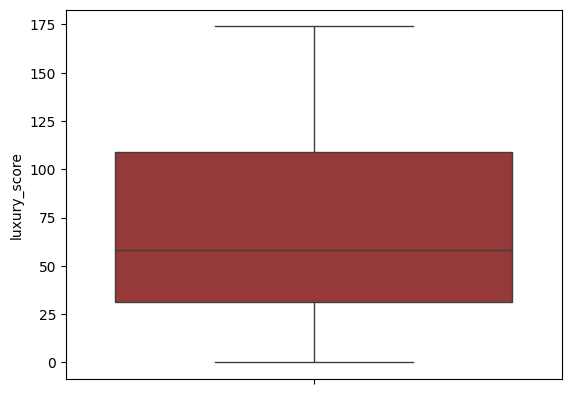

In [ ]:
sns.boxplot(df['luxury_score'], color='brown')
plt.show()

## **USING ONE HOT ENCODING to convert categorical data to numerical**

In [ ]:
ohe = OneHotEncoder()

In [ ]:
ohe

OneHotEncoder()

In [ ]:
cat_data = df.select_dtypes(include=['object'])

In [ ]:
cat_data.dtypes

property_type    object
society          object
sector           object
balcony          object
agePossession    object
dtype: object

In [ ]:
ohe.fit(df[['property_type']])

OneHotEncoder()

In [ ]:

# Specify the column to encode (replace 'property_type' with your actual column name)
column_to_encode = 'property_type'

# One-hot encode the column
ohe = OneHotEncoder(sparse=False)  # Set sparse=False for dense output
encoded_data = ohe.fit_transform(df[[column_to_encode]])

# Create a new DataFrame with encoded data (optional)
new_encoded_df = pd.DataFrame(encoded_data, columns=ohe.get_feature_names_out())

# Concatenate encoded data with the original DataFrame (dropping the original column)
df = pd.concat([df.drop(column_to_encode, axis=1), new_encoded_df], axis=1)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
ohe.fit(df[['society']])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


OneHotEncoder(sparse=False, sparse_output=False)

In [ ]:
column_to_encode = 'society'

# One-hot encode the column
ohe = OneHotEncoder(sparse=False)  # Set sparse=False for dense output
encoded_data = ohe.fit_transform(df[[column_to_encode]])

# Create a new DataFrame with encoded data (optional)
new_encoded_df = pd.DataFrame(encoded_data, columns=ohe.get_feature_names_out())

# Concatenate encoded data with the original DataFrame (dropping the original column)
df = pd.concat([df.drop(column_to_encode, axis=1), new_encoded_df], axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
ohe.fit(df[['sector']])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


OneHotEncoder(sparse=False, sparse_output=False)

In [ ]:
column_to_encode = 'sector'

# One-hot encode the column
ohe = OneHotEncoder(sparse=False)  # Set sparse=False for dense output
encoded_data = ohe.fit_transform(df[[column_to_encode]])

# Create a new DataFrame with encoded data (optional)
new_encoded_df = pd.DataFrame(encoded_data, columns=ohe.get_feature_names_out())

# Concatenate encoded data with the original DataFrame (dropping the original column)
df = pd.concat([df.drop(column_to_encode, axis=1), new_encoded_df], axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
ohe.fit(df[['balcony']])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


OneHotEncoder(sparse=False, sparse_output=False)

In [ ]:
column_to_encode = 'balcony'

# One-hot encode the column
ohe = OneHotEncoder(sparse=False)  # Set sparse=False for dense output
encoded_data = ohe.fit_transform(df[[column_to_encode]])

# Create a new DataFrame with encoded data (optional)
new_encoded_df = pd.DataFrame(encoded_data, columns=ohe.get_feature_names_out())

# Concatenate encoded data with the original DataFrame (dropping the original column)
df = pd.concat([df.drop(column_to_encode, axis=1), new_encoded_df], axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
ohe.fit(df[['agePossession']])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


OneHotEncoder(sparse=False, sparse_output=False)

In [ ]:
column_to_encode = 'agePossession'

# One-hot encode the column
ohe = OneHotEncoder(sparse=False)  # Set sparse=False for dense output
encoded_data = ohe.fit_transform(df[[column_to_encode]])

# Create a new DataFrame with encoded data (optional)
new_encoded_df = pd.DataFrame(encoded_data, columns=ohe.get_feature_names_out())

# Concatenate encoded data with the original DataFrame (dropping the original column)
df = pd.concat([df.drop(column_to_encode, axis=1), new_encoded_df], axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


**All the new columns after one hot encoding on categorical features**

In [ ]:
df

price  price_per_sqft    area  bedRoom  bathroom  floorNum  \
0      0.82          7585.0  1081.0      3.0       2.0       2.0   
1      0.95          8600.0  1105.0      2.0       2.0       4.0   
2      0.46            79.0  1724.0      2.0       2.0       0.0   
3      0.32          5470.0   585.0      2.0       2.0      17.0   
4      1.60          8020.0  1995.0      3.0       4.0      10.0   
...     ...             ...     ...      ...       ...       ...   
3798   0.37          6346.0   583.0      2.0       2.0       5.0   
3799   1.50          9634.0  1724.0      5.0       5.0       2.0   
3800   0.60          8163.0   735.0      1.0       1.0       5.0   
3801   1.50          9011.0  1724.0      5.0       6.0       3.0   
3802   1.78          9128.0  1950.0      3.0       3.0       5.0   

      built_up_area  study room  servant room  store room  ...  balcony_1  \
0             850.0         0.0             0         0.0  ...        0.0   
1            1226.0         0.0             1         0.0  ...        0.0   
2            1578.0         0.0             0         0.0  ...        1.0   
3            1000.0         0.0             0         0.0  ...        1.0   
4            1615.0         0.0             1         0.0  ...        0.0   
...             ...         ...           ...         ...  ...        ...   
3798          532.0         0.0             0         0.0  ...        1.0   
3799         1578.0         0.0             1         0.0  ...        0.0   
3800          665.0         0.0             0         0.0  ...        1.0   
3801         1578.0         0.0             1         0.0  ...        0.0   
3802         1845.0         0.0             0         0.0  ...        0.0   

      balcony_2  balcony_3  balcony_3+  agePossession_Moderately Old  \
0           1.0        0.0         0.0                           0.0   
1           1.0        0.0         0.0                           0.0   
2           0.0        0.0         0.0                           0.0   
3           0.0        0.0         0.0                           0.0   
4           0.0        0.0         1.0                           0.0   
...         ...        ...         ...                           ...   
3798        0.0        0.0         0.0                           0.0   
3799        0.0        0.0         1.0                           0.0   
3800        0.0        0.0         0.0                           1.0   
3801        0.0        1.0         0.0                           1.0   
3802        0.0        0.0         1.0                           0.0   

      agePossession_New Property  agePossession_Old Property  \
0                            1.0                         0.0   
1                            1.0                         0.0   
2                            0.0                         0.0   
3                            1.0                         0.0   
4                            0.0                         0.0   
...                          ...                         ...   
3798                         0.0                         0.0   
3799                         0.0                         0.0   
3800                         0.0                         0.0   
3801                         0.0                         0.0   
3802                         0.0                         0.0   

      agePossession_Relatively New  agePossession_Undefined  \
0                              0.0                      0.0   
1                              0.0                      0.0   
2                              0.0                      0.0   
3                              0.0                      0.0   
4                              1.0                      0.0   
...                            ...                      ...   
3798                           1.0                      0.0   
3799                           1.0                      0.0   
3800                           0.0                      0.0   


# **categorical data**

In [ ]:
cat_data.columns

Index(['property_type', 'society', 'sector', 'balcony', 'agePossession'], dtype='object')

## 15.Balcony

In [ ]:
print(df.columns)

Index(['price', 'price_per_sqft', 'area', 'bedRoom', 'bathroom', 'floorNum',
       'built_up_area', 'study room', 'servant room', 'store room',
       ...
       'balcony_1', 'balcony_2', 'balcony_3', 'balcony_3+',
       'agePossession_Moderately Old', 'agePossession_New Property',
       'agePossession_Old Property', 'agePossession_Relatively New',
       'agePossession_Undefined', 'agePossession_Under Construction'],
      dtype='object', length=810)


In [ ]:
Q1 = df['balcony_1'].quantile(0.25)
Q3 = df['balcony_1'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


outliers = df[(df['balcony_1'] < lower_bound) | (df['balcony_1'] > upper_bound)]


num_outlier = outliers.shape[0]
outliers_price = outliers['balcony_1'].describe()

num_outlier,outliers_price

(376,
 count    376.0
 mean       1.0
 std        0.0
 min        1.0
 25%        1.0
 50%        1.0
 75%        1.0
 max        1.0
 Name: balcony_1, dtype: float64)

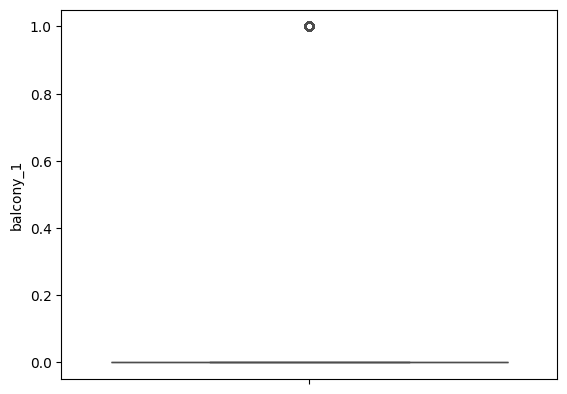

In [ ]:
sns.boxplot(df['balcony_1'], color='yellow')
plt.show()

In [ ]:
def handle_outliers(df, cols):
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[col] = np.where((df[col] < lower_bound) | (df[col] > upper_bound), df[col].median(), df[col])
    return df

In [ ]:
df= handle_outliers(df, ['balcony_1'])

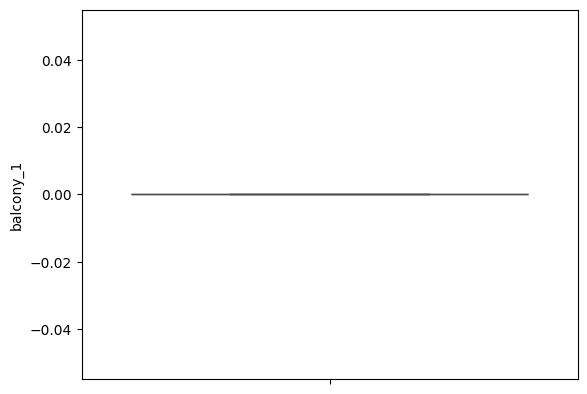

In [ ]:
sns.boxplot(df['balcony_1'], color='yellow')
plt.show()

In [ ]:
Q1 = df['balcony_1'].quantile(0.25)
Q3 = df['balcony_1'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


outliers = df[(df['balcony_1'] < lower_bound) | (df['balcony_1'] > upper_bound)]


num_outlier = outliers.shape[0]
outliers_price = outliers['balcony_1'].describe()

num_outlier,outliers_price

(0,
 count    0.0
 mean     NaN
 std      NaN
 min      NaN
 25%      NaN
 50%      NaN
 75%      NaN
 max      NaN
 Name: balcony_1, dtype: float64)

In [ ]:
Q1 = df['balcony_2'].quantile(0.25)
Q3 = df['balcony_2'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


outliers = df[(df['balcony_2'] < lower_bound) | (df['balcony_2'] > upper_bound)]


num_outlier = outliers.shape[0]
outliers_price = outliers['balcony_2'].describe()

num_outlier,outliers_price

(925,
 count    925.0
 mean       1.0
 std        0.0
 min        1.0
 25%        1.0
 50%        1.0
 75%        1.0
 max        1.0
 Name: balcony_2, dtype: float64)

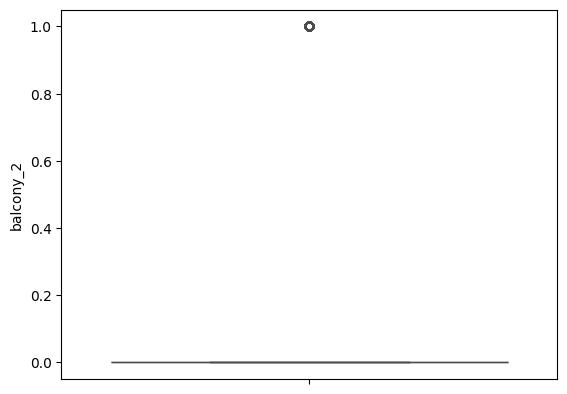

In [ ]:
sns.boxplot(df['balcony_2'], color='yellow')
plt.show()

In [ ]:
def handle_outliers(df, cols):
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[col] = np.where((df[col] < lower_bound) | (df[col] > upper_bound), df[col].median(), df[col])
    return df

In [ ]:
df= handle_outliers(df, ['balcony_2'])

In [ ]:
Q1 = df['balcony_2'].quantile(0.25)
Q3 = df['balcony_2'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


outliers = df[(df['balcony_2'] < lower_bound) | (df['balcony_2'] > upper_bound)]


num_outlier = outliers.shape[0]
outliers_price = outliers['balcony_2'].describe()

num_outlier,outliers_price

(0,
 count    0.0
 mean     NaN
 std      NaN
 min      NaN
 25%      NaN
 50%      NaN
 75%      NaN
 max      NaN
 Name: balcony_2, dtype: float64)

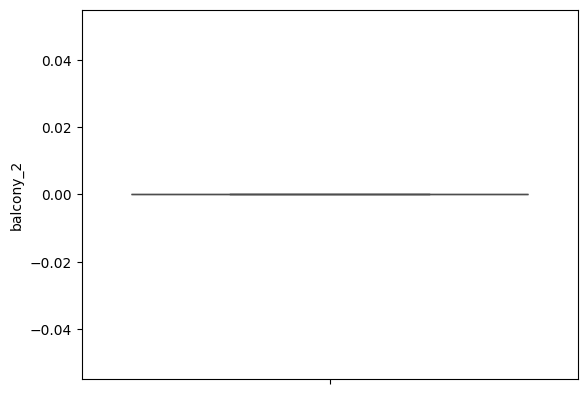

In [ ]:
sns.boxplot(df['balcony_2'], color='yellow')
plt.show()

In [ ]:
Q1 = df['balcony_3'].quantile(0.25)
Q3 = df['balcony_3'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


outliers = df[(df['balcony_3'] < lower_bound) | (df['balcony_3'] > upper_bound)]


num_outlier = outliers.shape[0]
outliers_price = outliers['balcony_3'].describe()

num_outlier,outliers_price

(0,
 count    0.0
 mean     NaN
 std      NaN
 min      NaN
 25%      NaN
 50%      NaN
 75%      NaN
 max      NaN
 Name: balcony_3, dtype: float64)

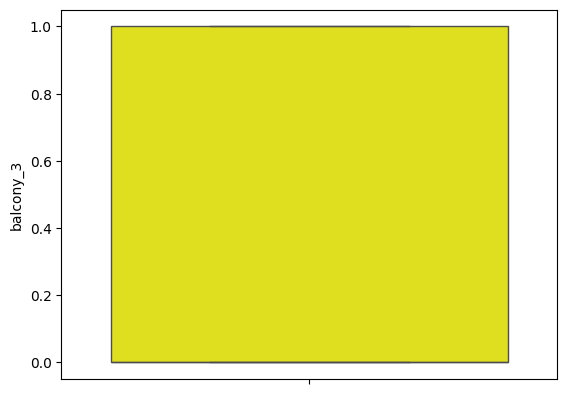

In [ ]:
sns.boxplot(df['balcony_3'], color='yellow')
plt.show()

In [ ]:
Q1 = df['balcony_3+'].quantile(0.25)
Q3 = df['balcony_3+'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


outliers = df[(df['balcony_3'] < lower_bound) | (df['balcony_3'] > upper_bound)]


num_outlier = outliers.shape[0]
outliers_price = outliers['balcony_3'].describe()

num_outlier,outliers_price

(0,
 count    0.0
 mean     NaN
 std      NaN
 min      NaN
 25%      NaN
 50%      NaN
 75%      NaN
 max      NaN
 Name: balcony_3, dtype: float64)

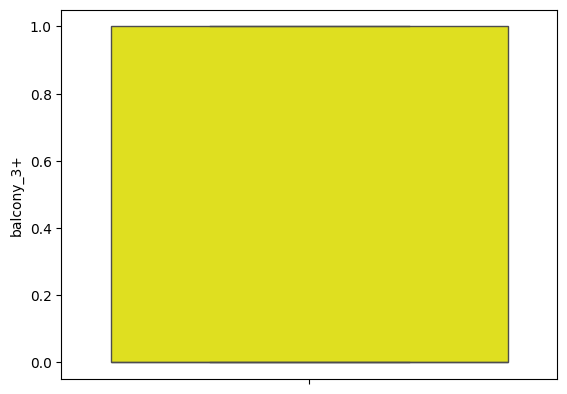

In [ ]:
sns.boxplot(df['balcony_3+'], color='yellow')
plt.show()

## 16.agePossession

In [ ]:
df.columns

Index(['price', 'price_per_sqft', 'area', 'bedRoom', 'bathroom', 'floorNum',
       'built_up_area', 'study room', 'servant room', 'store room',
       ...
       'balcony_1', 'balcony_2', 'balcony_3', 'balcony_3+',
       'agePossession_Moderately Old', 'agePossession_New Property',
       'agePossession_Old Property', 'agePossession_Relatively New',
       'agePossession_Undefined', 'agePossession_Under Construction'],
      dtype='object', length=810)

In [ ]:
selected_columns = ['agePossession_Moderately Old', 'agePossession_New Property',
       'agePossession_Old Property', 'agePossession_Relatively New',
       'agePossession_Undefined', 'agePossession_Under Construction']
print(df[selected_columns].head())

   agePossession_Moderately Old  agePossession_New Property  \
0                           0.0                         1.0   
1                           0.0                         1.0   
2                           0.0                         0.0   
3                           0.0                         1.0   
4                           0.0                         0.0   

   agePossession_Old Property  agePossession_Relatively New  \
0                         0.0                           0.0   
1                         0.0                           0.0   
2                         0.0                           0.0   
3                         0.0                           0.0   
4                         0.0                           1.0   

   agePossession_Undefined  agePossession_Under Construction  
0                      0.0                               0.0  
1                      0.0                               0.0  
2                      0.0                           

In [ ]:
Q1 = df[selected_columns].quantile(0.25)
Q3 = df[selected_columns].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


outliers = df[(df[selected_columns] < lower_bound) | (df[selected_columns] > upper_bound)]


num_outlier = outliers.shape[0]
outliers_price = outliers[selected_columns].describe()

num_outlier,outliers_price

(3803,
        agePossession_Moderately Old  agePossession_New Property  \
 count                         575.0                       626.0   
 mean                            1.0                         1.0   
 std                             0.0                         0.0   
 min                             1.0                         1.0   
 25%                             1.0                         1.0   
 50%                             1.0                         1.0   
 75%                             1.0                         1.0   
 max                             1.0                         1.0   
 
        agePossession_Old Property  agePossession_Relatively New  \
 count                       310.0                           0.0   
 mean                          1.0                           NaN   
 std                           0.0                           NaN   
 min                           1.0                           NaN   
 25%                           1.0     

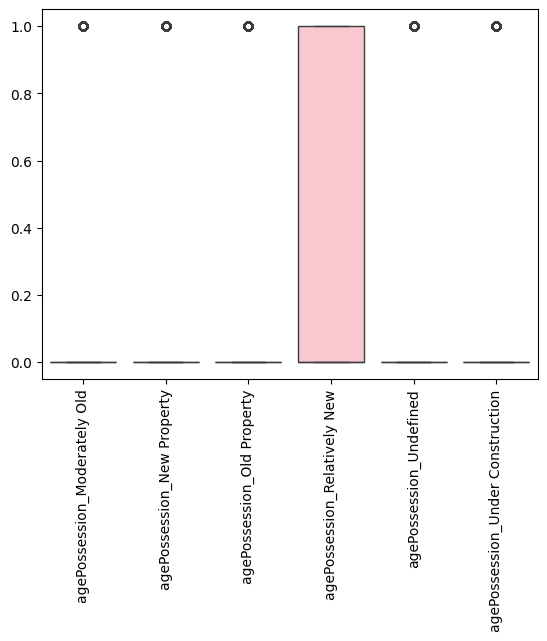

In [ ]:
sns.boxplot(df[selected_columns], color='pink')
plt.xticks(rotation=90)
plt.show()

In [ ]:
def handle_outliers(df, cols):
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[col] = np.where((df[col] < lower_bound) | (df[col] > upper_bound), df[col].median(), df[col])
    return df

In [ ]:
df= handle_outliers(df, [selected_columns])

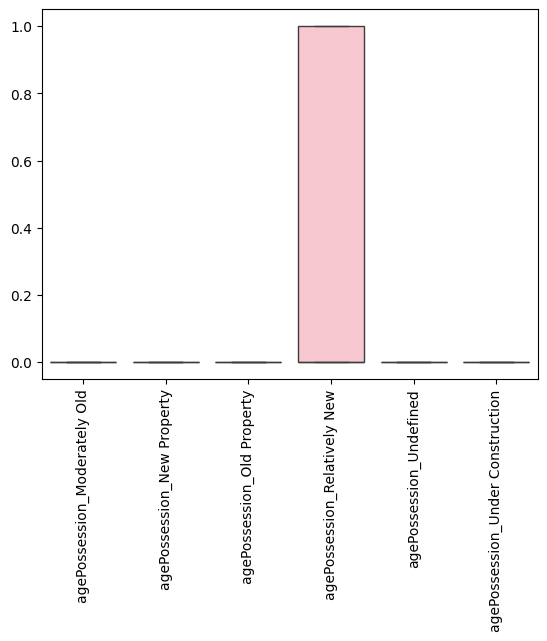

In [ ]:
sns.boxplot(df[selected_columns], color='pink')
plt.xticks(rotation=90)
plt.show()

In [ ]:
Q1 = df[selected_columns].quantile(0.25)
Q3 = df[selected_columns].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


outliers = df[(df[selected_columns] < lower_bound) | (df[selected_columns] > upper_bound)]


num_outlier = outliers.shape[0]
outliers_price = outliers[selected_columns].describe()

num_outlier,outliers_price

(3803,
        agePossession_Moderately Old  agePossession_New Property  \
 count                           0.0                         0.0   
 mean                            NaN                         NaN   
 std                             NaN                         NaN   
 min                             NaN                         NaN   
 25%                             NaN                         NaN   
 50%                             NaN                         NaN   
 75%                             NaN                         NaN   
 max                             NaN                         NaN   
 
        agePossession_Old Property  agePossession_Relatively New  \
 count                         0.0                           0.0   
 mean                          NaN                           NaN   
 std                           NaN                           NaN   
 min                           NaN                           NaN   
 25%                           NaN     

## **17.Property type**

In [ ]:
select_columns = ['property_type_house','property_type_flat']
print(df[select_columns].head())

   property_type_house  property_type_flat
0                  0.0                 1.0
1                  0.0                 1.0
2                  0.0                 1.0
3                  0.0                 1.0
4                  0.0                 1.0


In [ ]:
Q1 = df[select_columns].quantile(0.25)
Q3 = df[select_columns].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


outliers = df[(df[select_columns] < lower_bound) | (df[select_columns] > upper_bound)]


num_outlier = outliers.shape[0]
outliers_price = outliers[select_columns].describe()

num_outlier,outliers_price


(3803,
        property_type_house  property_type_flat
 count                860.0               860.0
 mean                   1.0                 0.0
 std                    0.0                 0.0
 min                    1.0                 0.0
 25%                    1.0                 0.0
 50%                    1.0                 0.0
 75%                    1.0                 0.0
 max                    1.0                 0.0)

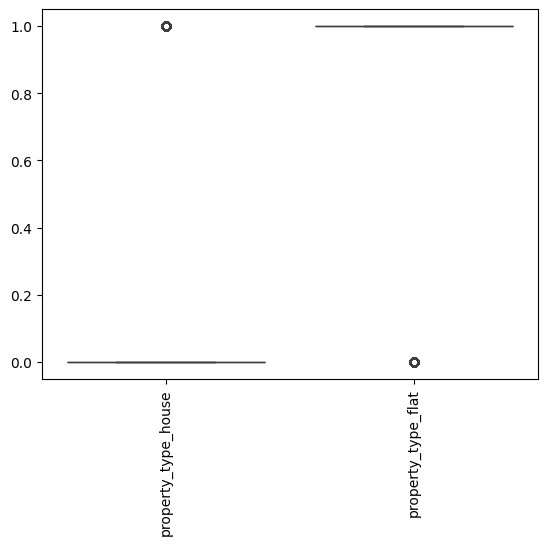

In [ ]:
sns.boxplot(df[select_columns], color='pink')
plt.xticks(rotation=90)
plt.show()

In [ ]:
def handle_outliers(df, cols):
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[col] = np.where((df[col] < lower_bound) | (df[col] > upper_bound), df[col].median(), df[col])
    return df

In [ ]:
df= handle_outliers(df, [select_columns])

In [ ]:
Q1 = df[select_columns].quantile(0.25)
Q3 = df[select_columns].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


outliers = df[(df[select_columns] < lower_bound) | (df[select_columns] > upper_bound)]


num_outlier = outliers.shape[0]
outliers_price = outliers[select_columns].describe()

num_outlier,outliers_price


(3803,
        property_type_house  property_type_flat
 count                  0.0                 0.0
 mean                   NaN                 NaN
 std                    NaN                 NaN
 min                    NaN                 NaN
 25%                    NaN                 NaN
 50%                    NaN                 NaN
 75%                    NaN                 NaN
 max                    NaN                 NaN)

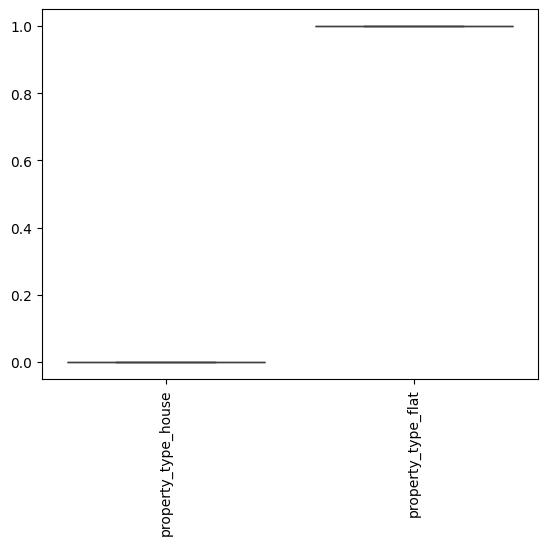

In [ ]:
sns.boxplot(df[select_columns], color='pink')
plt.xticks(rotation=90)
plt.show()

**In case of outlier handling if outliers were still observed on the box plots after handling them we observed that those outliers were usually individual houses or villas**

# **MODEL**

**We tested each model using mean square error,mean absolute error and R square error to test the models.**

In [ ]:
X= df.drop('price',axis=1)

In [ ]:
X

price_per_sqft    area  bedRoom  bathroom  floorNum  built_up_area  \
0             7585.0  1081.0      3.0       2.0       2.0          850.0   
1             8600.0  1105.0      2.0       2.0       4.0         1226.0   
2               79.0  1724.0      2.0       2.0       0.0         1578.0   
3             5470.0   585.0      2.0       2.0      17.0         1000.0   
4             8020.0  1995.0      3.0       4.0      10.0         1615.0   
...              ...     ...      ...       ...       ...            ...   
3798          6346.0   583.0      2.0       2.0       5.0          532.0   
3799          9634.0  1724.0      5.0       5.0       2.0         1578.0   
3800          8163.0   735.0      1.0       1.0       5.0          665.0   
3801          9011.0  1724.0      5.0       6.0       3.0         1578.0   
3802          9128.0  1950.0      3.0       3.0       5.0         1845.0   

      study room  servant room  store room  pooja room  ...  balcony_1  \
0            0.0             0         0.0         0.0  ...        0.0   
1            0.0             1         0.0         0.0  ...        0.0   
2            0.0             0         0.0         0.0  ...        0.0   
3            0.0             0         0.0         0.0  ...        0.0   
4            0.0             1         0.0         0.0  ...        0.0   
...          ...           ...         ...         ...  ...        ...   
3798         0.0             0         0.0         0.0  ...        0.0   
3799         0.0             1         0.0         0.0  ...        0.0   
3800         0.0             0         0.0         0.0  ...        0.0   
3801         0.0             1         0.0         0.0  ...        0.0   
3802         0.0             0         0.0         0.0  ...        0.0   

      balcony_2  balcony_3  balcony_3+  agePossession_Moderately Old  \
0           0.0        0.0         0.0                           0.0   
1           0.0        0.0         0.0                           0.0   
2           0.0        0.0         0.0                           0.0   
3           0.0        0.0         0.0                           0.0   
4           0.0        0.0         1.0                           0.0   
...         ...        ...         ...                           ...   
3798        0.0        0.0         0.0                           0.0   
3799        0.0        0.0         1.0                           0.0   
3800        0.0        0.0         0.0                           0.0   
3801        0.0        1.0         0.0                           0.0   
3802        0.0        0.0         1.0                           0.0   

      agePossession_New Property  agePossession_Old Property  \
0                            0.0                         0.0   
1                            0.0                         0.0   
2                            0.0                         0.0   
3                            0.0                         0.0   
4                            0.0                         0.0   
...                          ...                         ...   
3798                         0.0                         0.0   
3799                         0.0                         0.0   
3800                         0.0                         0.0   
3801                         0.0                         0.0   
3802                         0.0                         0.0   

      agePossession_Relatively New  agePossession_Undefined  \
0                              0.0                      0.0   
1                              0.0                      0.0   
2                              0.0                      0.0   
3                              0.0                      0.0   
4                              1.0                      0.0   
...                            ...                      ...   
3798                           1.0                      0.0   
3799                           1.0                      0.0   
380

In [ ]:
y=df['price']

In [ ]:
y

0       0.82
1       0.95
2       0.46
3       0.32
4       1.60
        ... 
3798    0.37
3799    1.50
3800    0.60
3801    1.50
3802    1.78
Name: price, Length: 3803, dtype: float64

In [ ]:
print(type(X))
print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [ ]:
y.value_counts()

price
1.500    501
1.250     83
0.900     68
1.100     66
1.200     66
        ... 
2.970      1
0.338      1
2.380      1
4.160      1
0.570      1
Name: count, Length: 347, dtype: int64

<Axes: xlabel='price'>

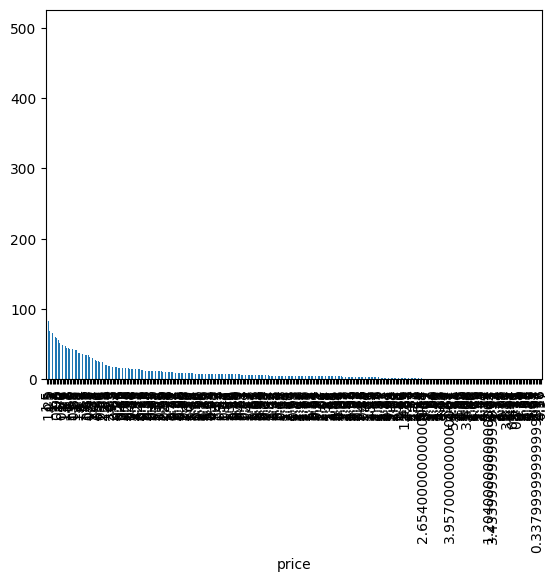

In [ ]:
y.value_counts().plot(kind='bar')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=2)

In [ ]:
X_train.shape,X_test.shape,X.shape

((3042, 809), (761, 809), (3803, 809))

In [ ]:
y_train.shape, y_test.shape, y.shape

((3042,), (761,), (3803,))

## **using decison tree**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()

In [ ]:
model=[dt]

In [ ]:
model

[DecisionTreeRegressor()]

In [ ]:
 X_train.columns

Index(['price_per_sqft', 'area', 'bedRoom', 'bathroom', 'floorNum',
       'built_up_area', 'study room', 'servant room', 'store room',
       'pooja room',
       ...
       'balcony_1', 'balcony_2', 'balcony_3', 'balcony_3+',
       'agePossession_Moderately Old', 'agePossession_New Property',
       'agePossession_Old Property', 'agePossession_Relatively New',
       'agePossession_Undefined', 'agePossession_Under Construction'],
      dtype='object', length=809)

In [ ]:
# Fit the model
dt.fit(X_train, y_train)

# Evaluate the model
y_pred = dt.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Absolute Error: 0.14434296977660974
Mean Squared Error: 0.27702522864651774
R-squared: 0.7141494249125364


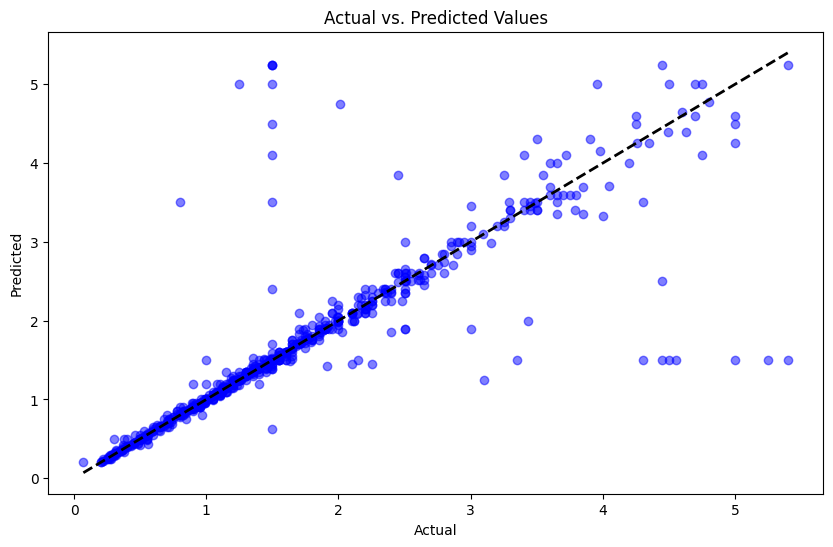

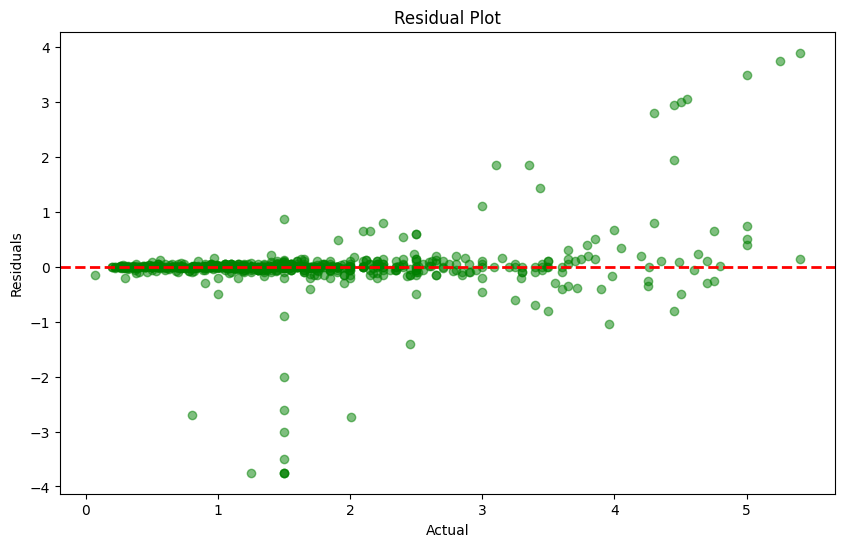

In [ ]:
# Scatter plot of actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values')
plt.show()

# Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals, color='green', alpha=0.5)
plt.xlabel('Actual')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='red', linestyle='--', lw=2)
plt.show()


In these plots:

In the scatter plot,the points cluster closely around the diagonal line. In the residual plot,the residuals evenly scattered around the horizontal line at y=0, indicating that the model's errors are random and not biased. These visualizations helped us quickly assess the model's performance and identify any patterns or issues it may have. Hence this model is performing well.







## using random forest

In [ ]:
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
rf_regressor.fit(X_train, y_train)

# Evaluate the model
y_pred = rf_regressor.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Optionally, you can print or visualize the model's predictions
# and compare them with the actual values


Mean Absolute Error: 0.1347947043363995
Mean Squared Error: 0.16357760864901452
R-squared: 0.8312112086967476


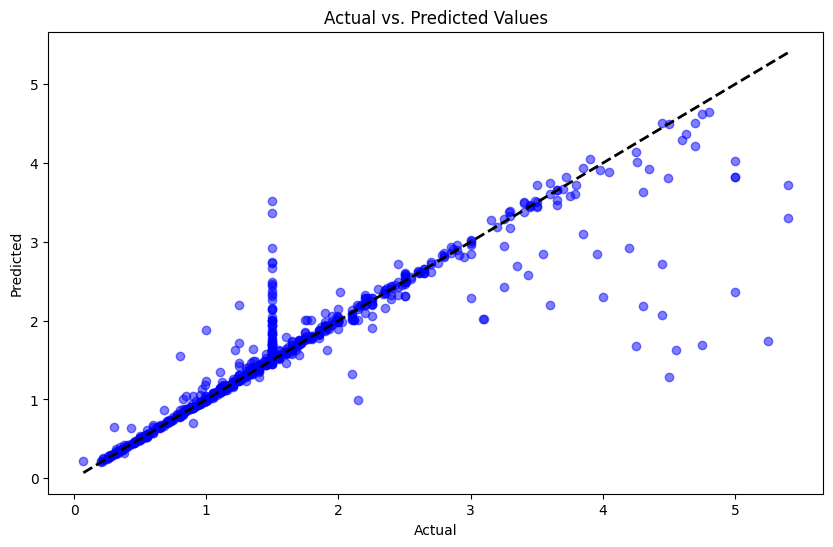

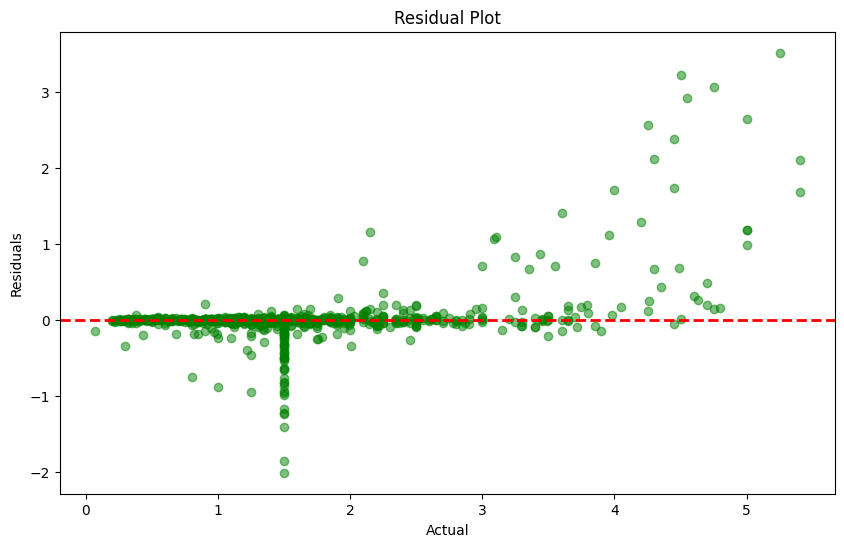

In [ ]:
# Scatter plot of actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values')
plt.show()

# Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals, color='green', alpha=0.5)
plt.xlabel('Actual')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='red', linestyle='--', lw=2)
plt.show()


In these plots:

In the scatter plot,the points cluster closely around the diagonal line. In the residual plot,the residuals evenly scattered around the horizontal line at y=0, indicating that the model's errors are random and not biased. These visualizations helped us quickly assess the model's performance and identify any patterns or issues it may have. Hence this model is performing well.

## **using SVM**

In [ ]:

# Assuming you have X_train, X_test, y_train, y_test prepared

# Instantiate the Support Vector Machine Regressor
svm_regressor = SVR()

# Fit the model
svm_regressor.fit(X_train, y_train)

# Evaluate the model
y_pred = svm_regressor.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Optionally, you can print or visualize the model's predictions
# and compare them with the actual values


Mean Absolute Error: 0.28747750343327827
Mean Squared Error: 0.45665914388542467
R-squared: 0.5287928123500953


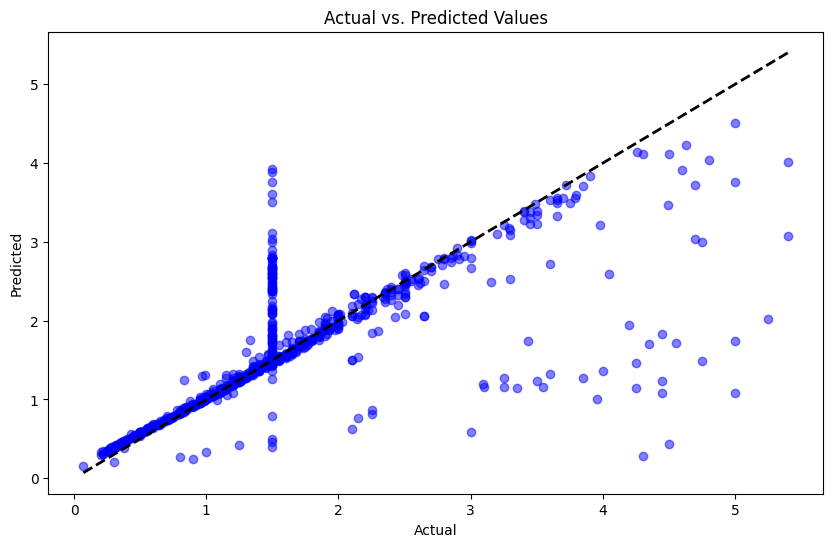

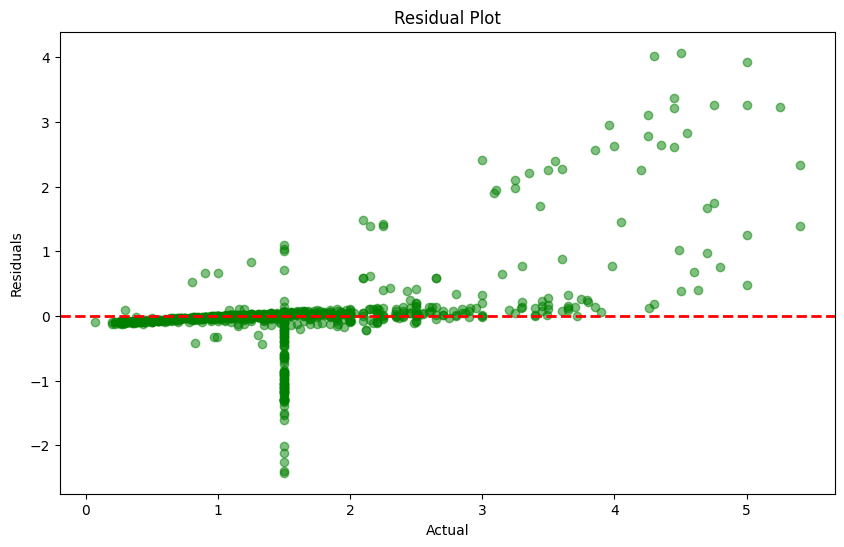

In [ ]:
# Scatter plot of actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values')
plt.show()

# Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals, color='green', alpha=0.5)
plt.xlabel('Actual')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='red', linestyle='--', lw=2)
plt.show()


**In SVM, on observing the scatter plot the points on the right are further away from the time which makes it a bad model.**

##  using gradient boost regressor

In [ ]:
# Instantiate the Gradient Boosting Regressor
gb_regressor = GradientBoostingRegressor()

# Fit the model
gb_regressor.fit(X_train, y_train)

# Evaluate the model
y_pred = gb_regressor.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Optionally, you can visualize the model's predictions
# and compare them with the actual values


Mean Absolute Error: 0.30251217416848647
Mean Squared Error: 0.29236544180947954
R-squared: 0.6983205100659677


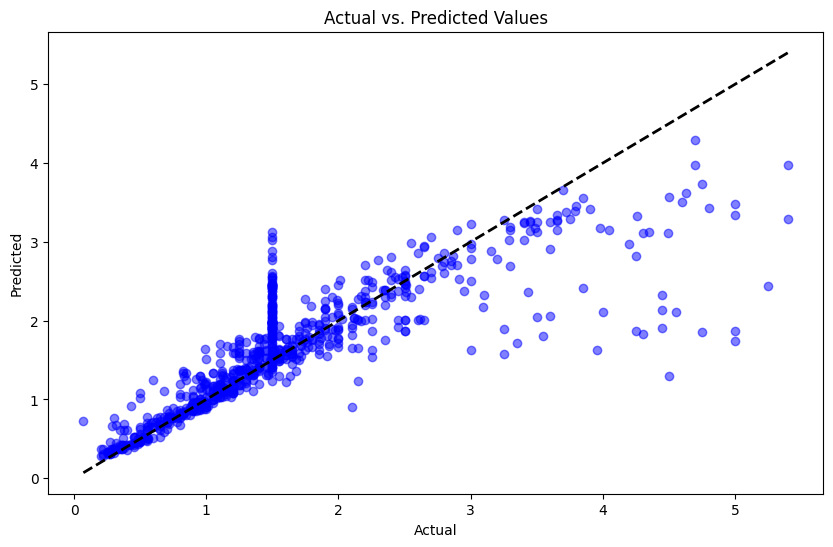

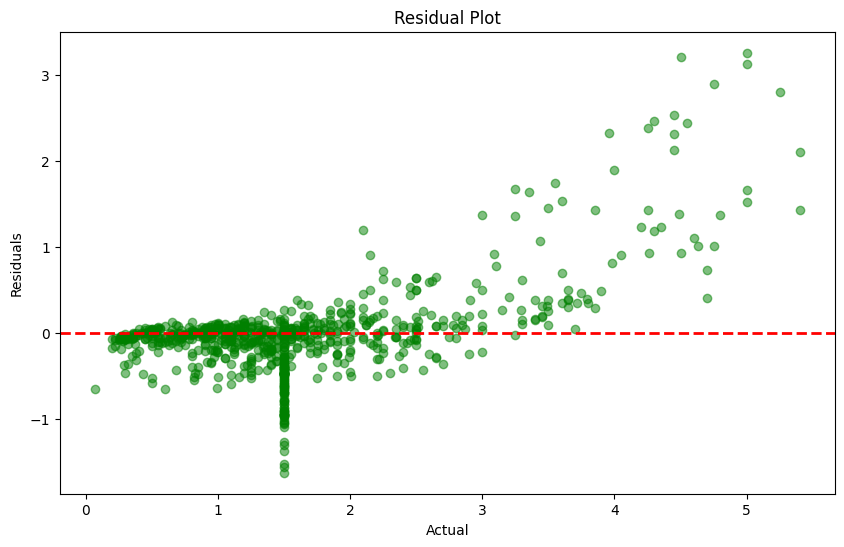

In [ ]:
# Scatter plot of actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values')
plt.show()

# Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals, color='green', alpha=0.5)
plt.xlabel('Actual')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='red', linestyle='--', lw=2)
plt.show()

**In gradient boost also the points are scattered further away from the line indicating poor model performance.**